In [80]:
from sanitize_ml_labels import is_normalized_metric, is_absolutely_normalized_metric, sanitize_ml_labels, should_be_maximized
import pandas as pd
import numpy as np
import re
from barplots import barplots

In [90]:
from grape.embedders import DeepWalkSkipGramEnsmallen, Node2VecSkipGramEnsmallen, WalkletsSkipGramEnsmallen

print(pd.DataFrame(WalkletsSkipGramEnsmallen().parameters(), index=["Value"]).T.to_latex())

\begin{tabular}{ll}
\toprule
{} &  Value \\
\midrule
random\_state                      &     42 \\
embedding\_size                    &    100 \\
epochs                            &     30 \\
clipping\_value                    &    6.0 \\
number\_of\_negative\_samples        &     10 \\
walk\_length                       &    128 \\
iterations                        &     10 \\
window\_size                       &      4 \\
return\_weight                     &    1.0 \\
explore\_weight                    &    1.0 \\
max\_neighbours                    &    100 \\
learning\_rate                     &   0.01 \\
learning\_rate\_decay               &    0.9 \\
central\_nodes\_embedding\_path      &   None \\
contextual\_nodes\_embedding\_path   &   None \\
normalize\_by\_degree               &  False \\
stochastic\_downsample\_by\_degree   &  False \\
normalize\_learning\_rate\_by\_degree &  False \\
use\_scale\_free\_distribution       &   True \\
dtype                             &    f3

In [2]:
df = pd.read_csv("../degree_normalization_experiments.csv")

In [3]:
df.graph_name = [
    " ".join(re.findall('[A-Z][^A-Z]*', graph_name)[:2])
    for graph_name in df.graph_name
]

In [4]:
df["degree_normalized"] = [
    "Degree normalization" if val else "Traditional"
    for val in df["('features_parameters', 'normalize_by_degree')"]
]

In [5]:
df["features_names"] = [
    feature.split(" ")[0]
    for feature in df["features_names"]
]

Rendering barplots:   0%|                                                                                     …

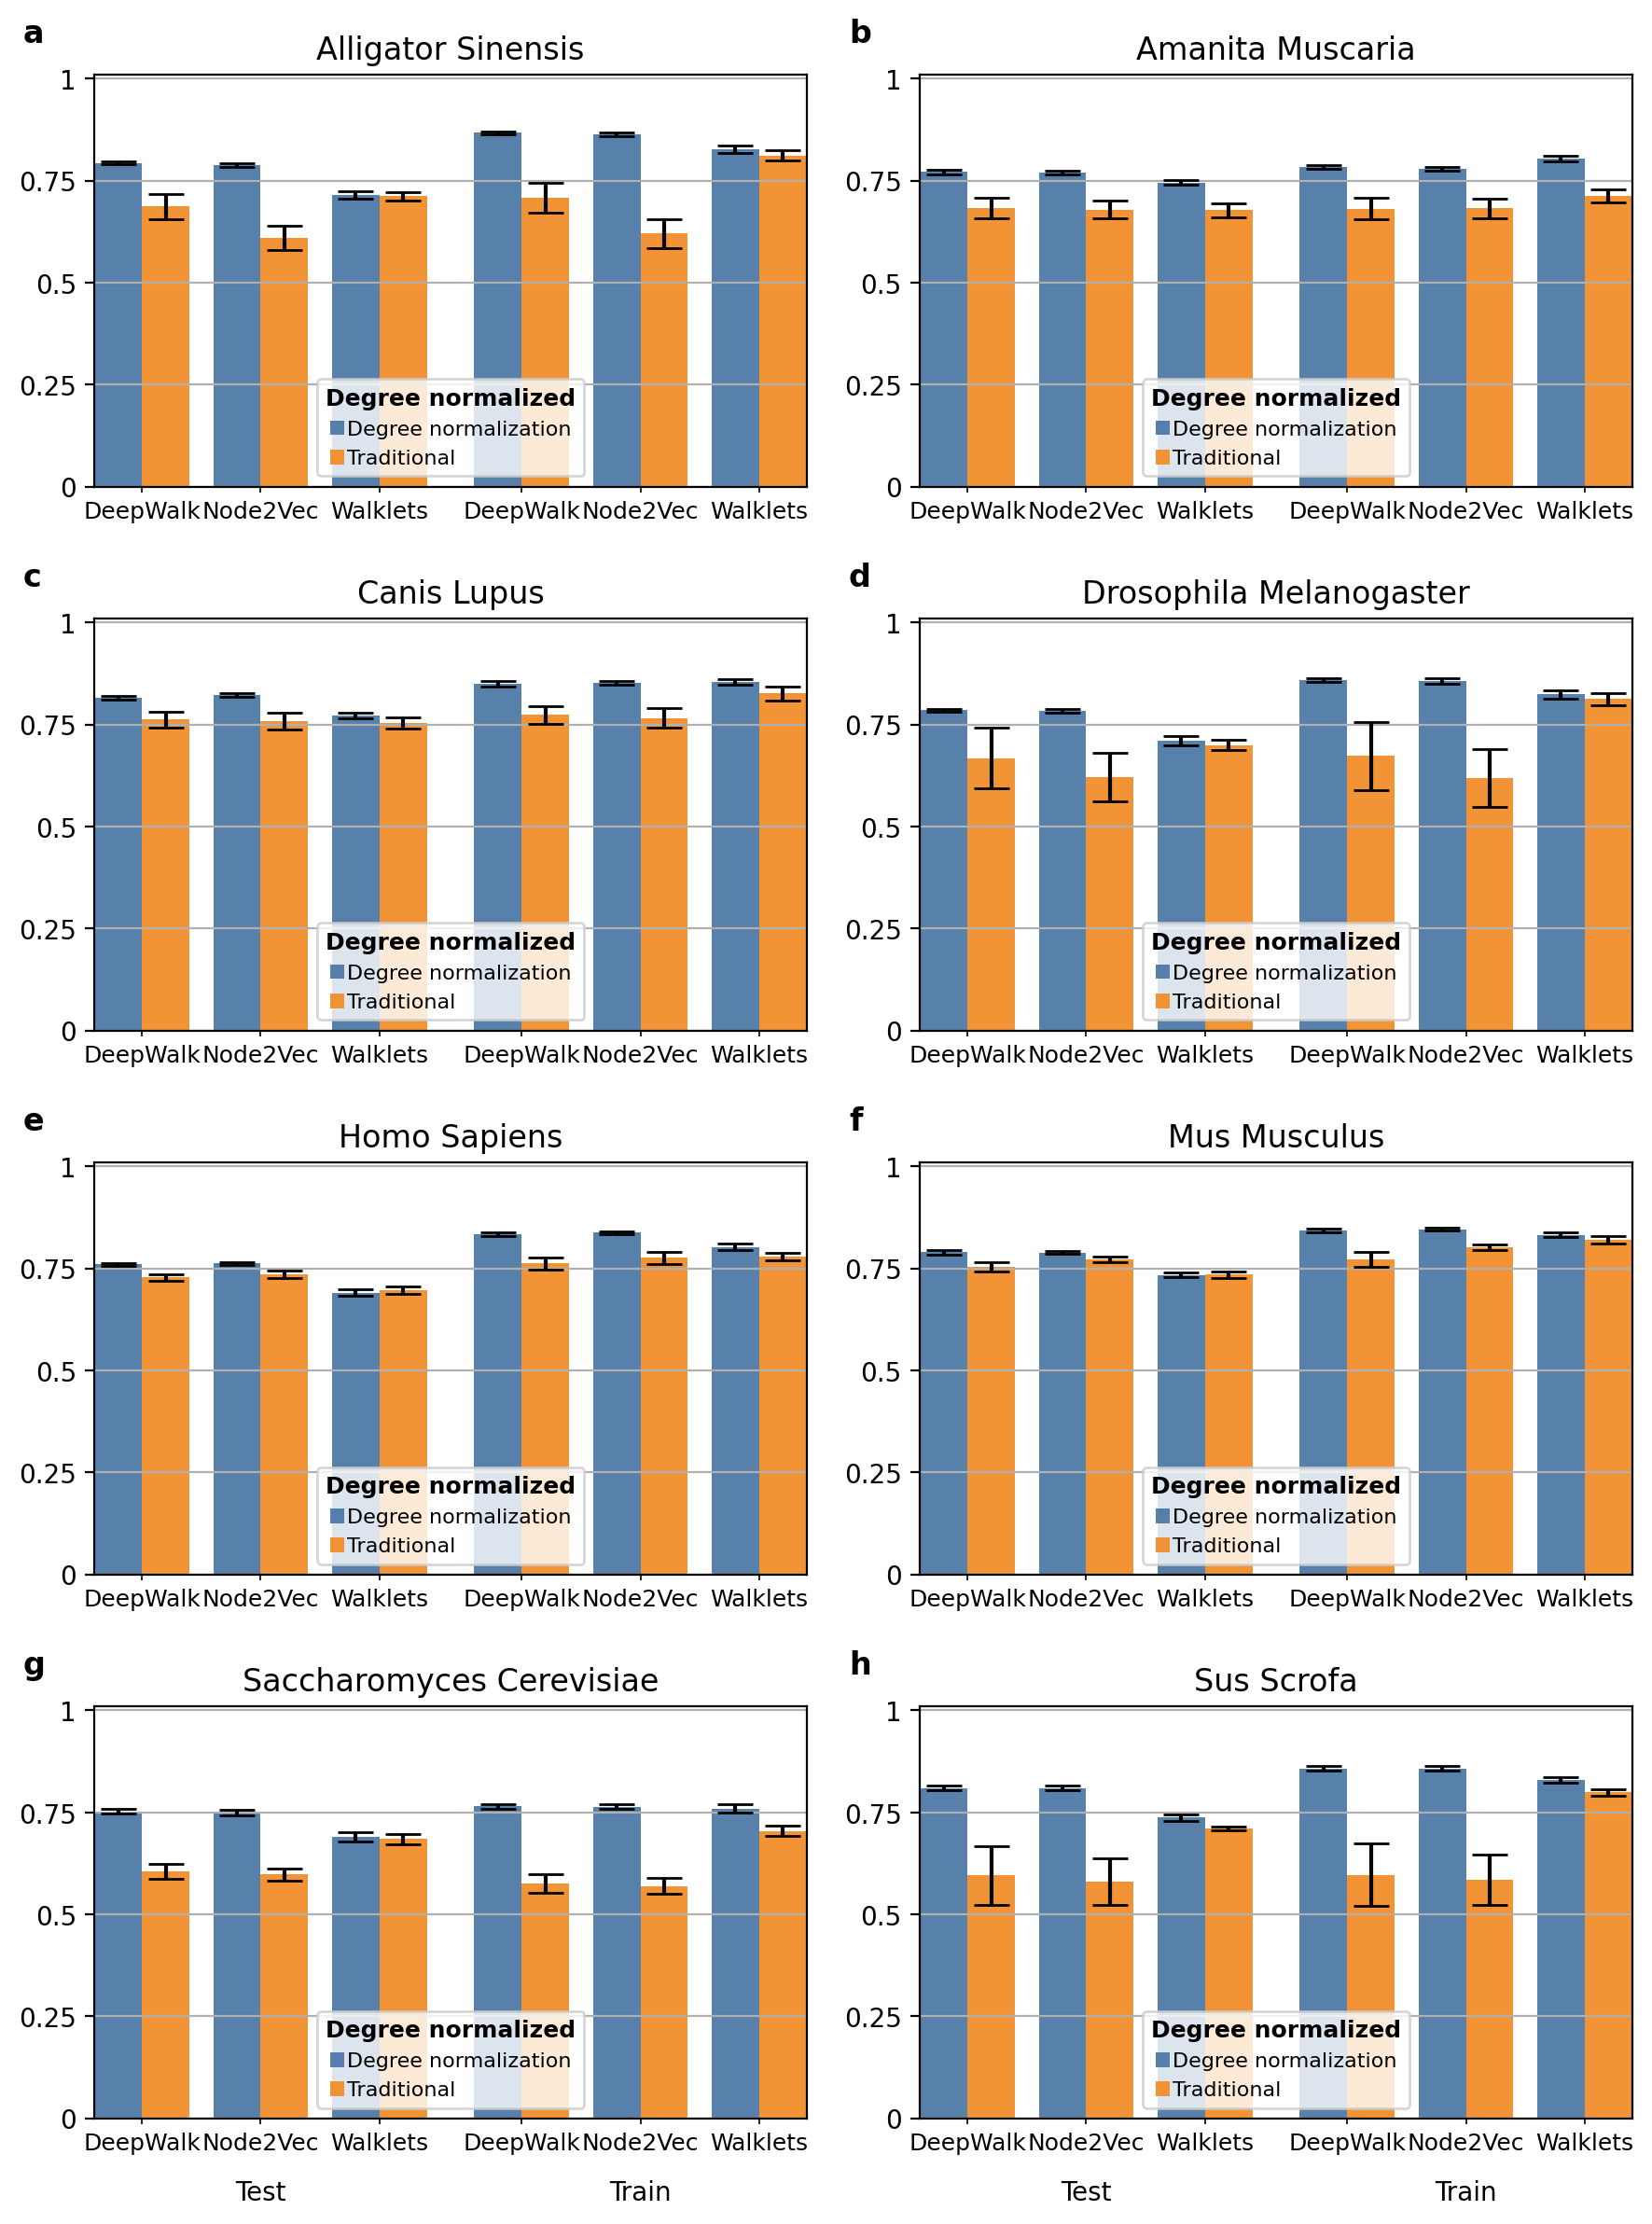

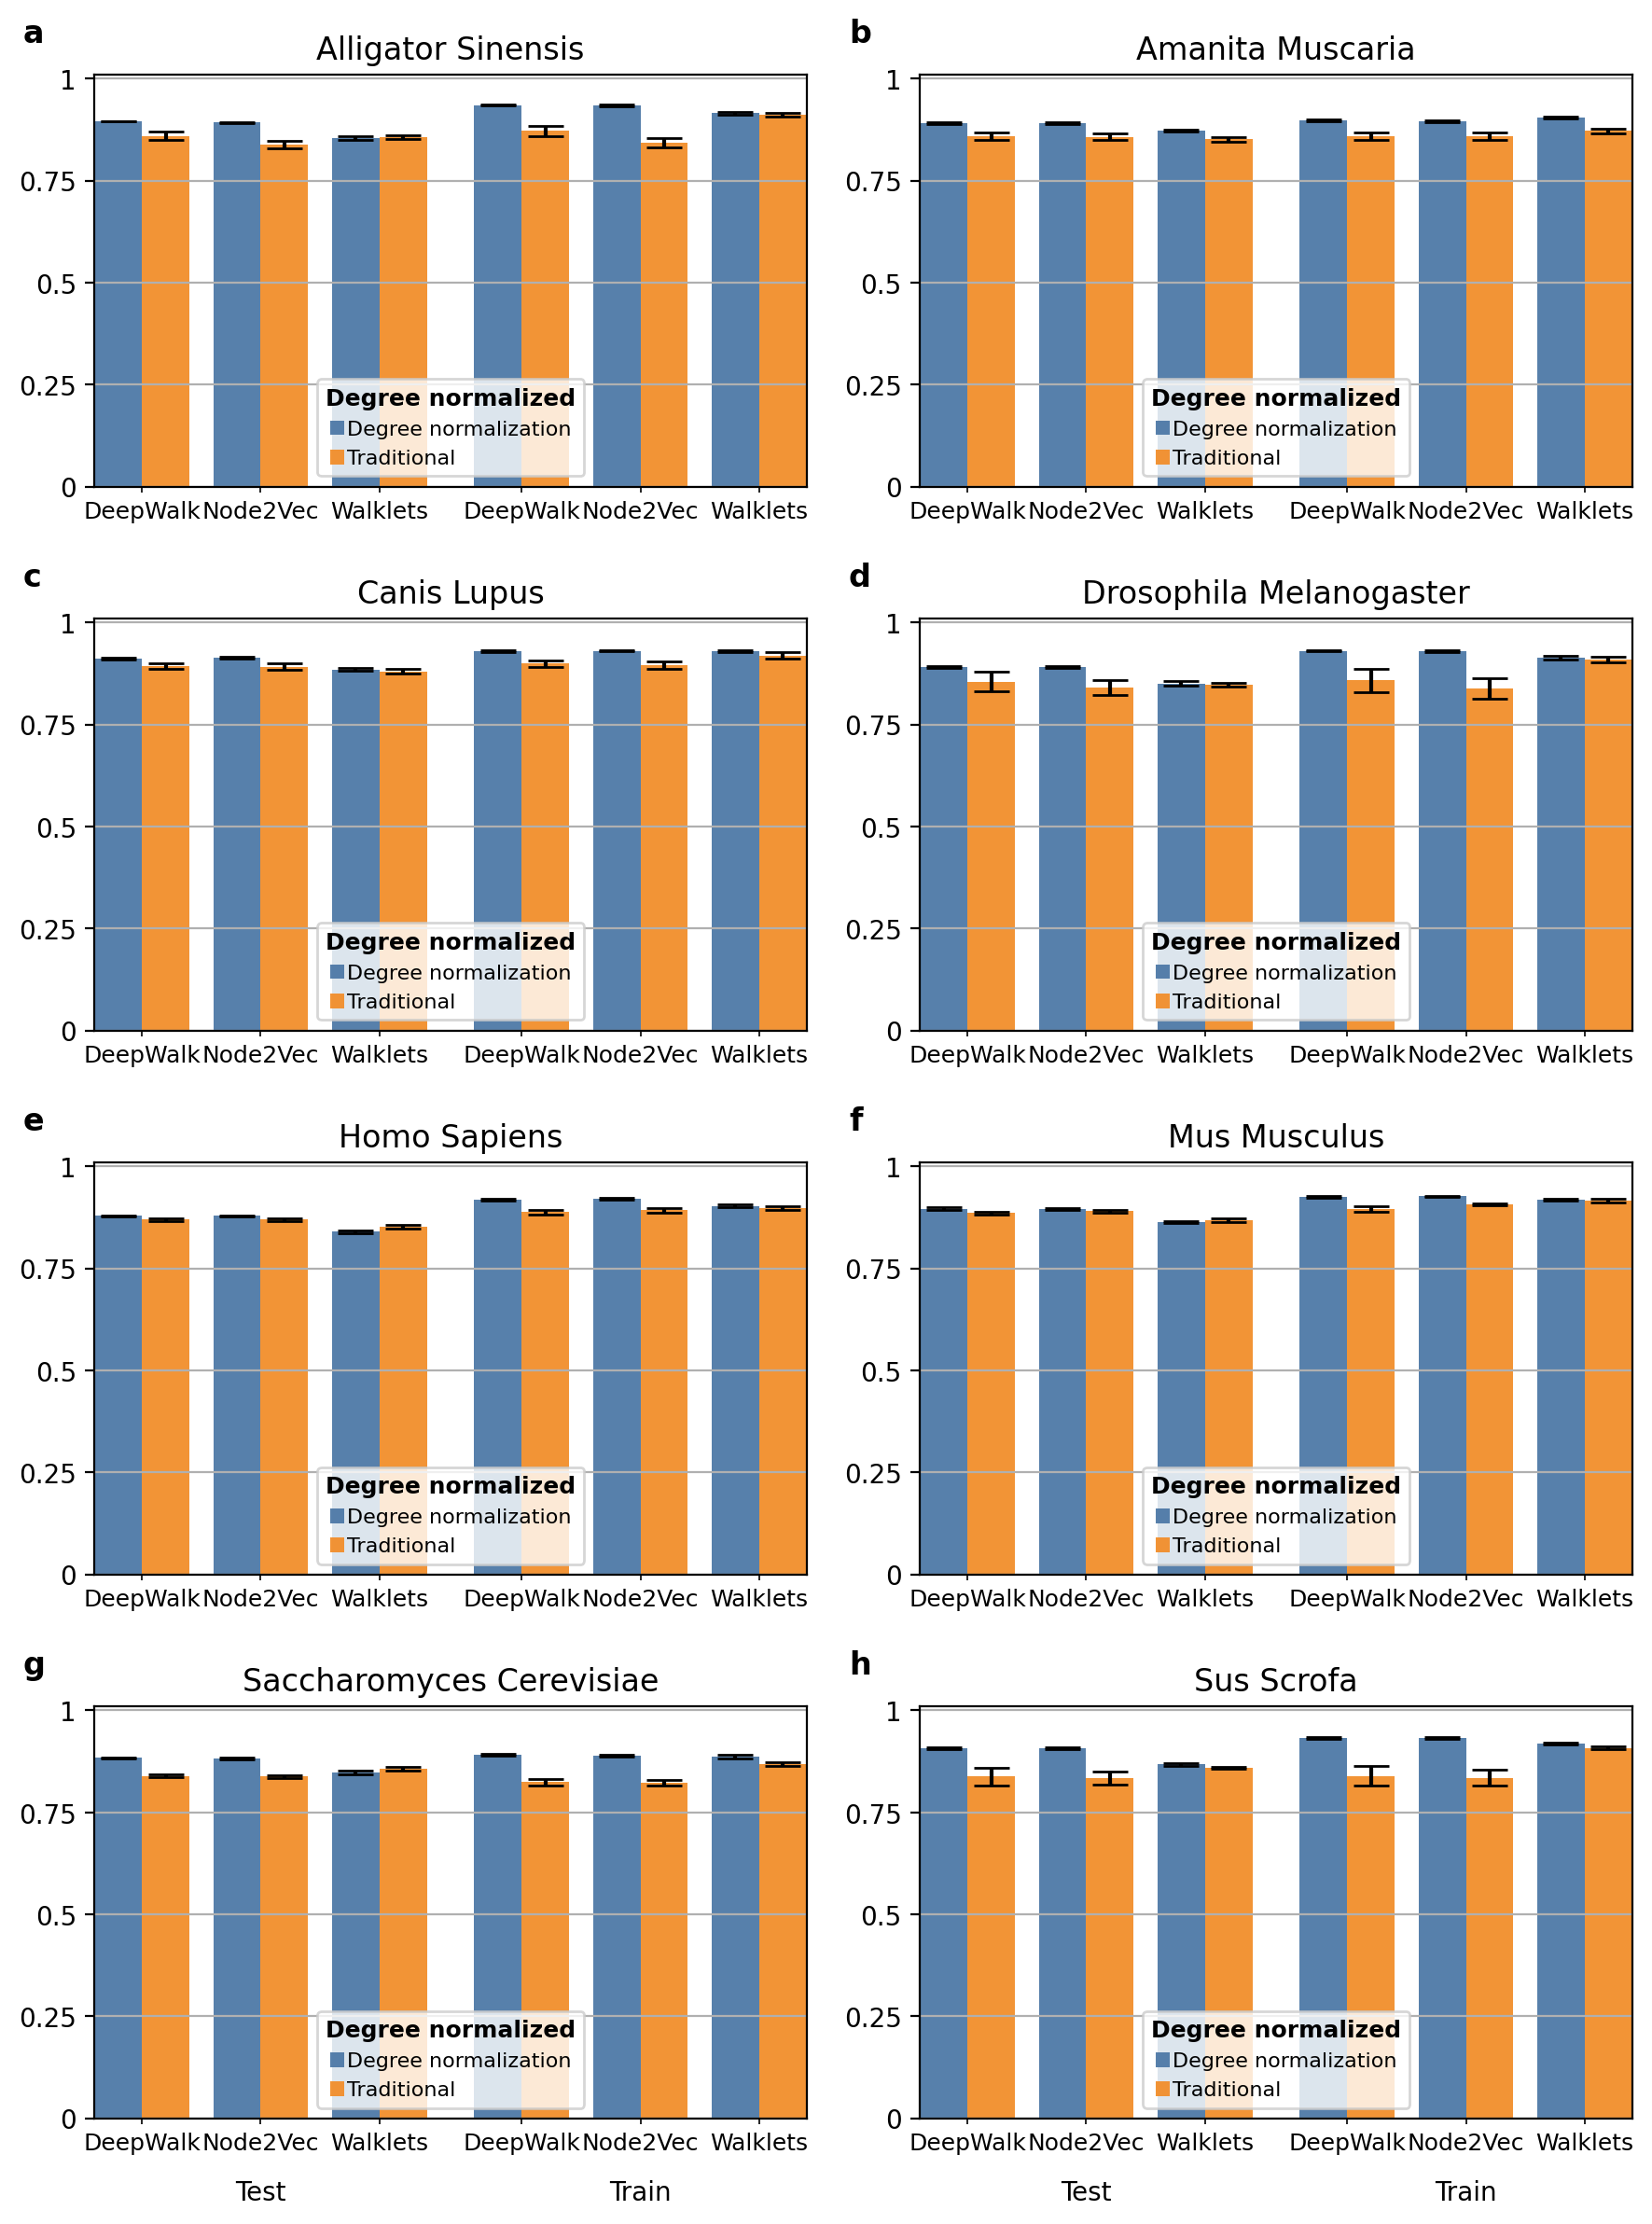

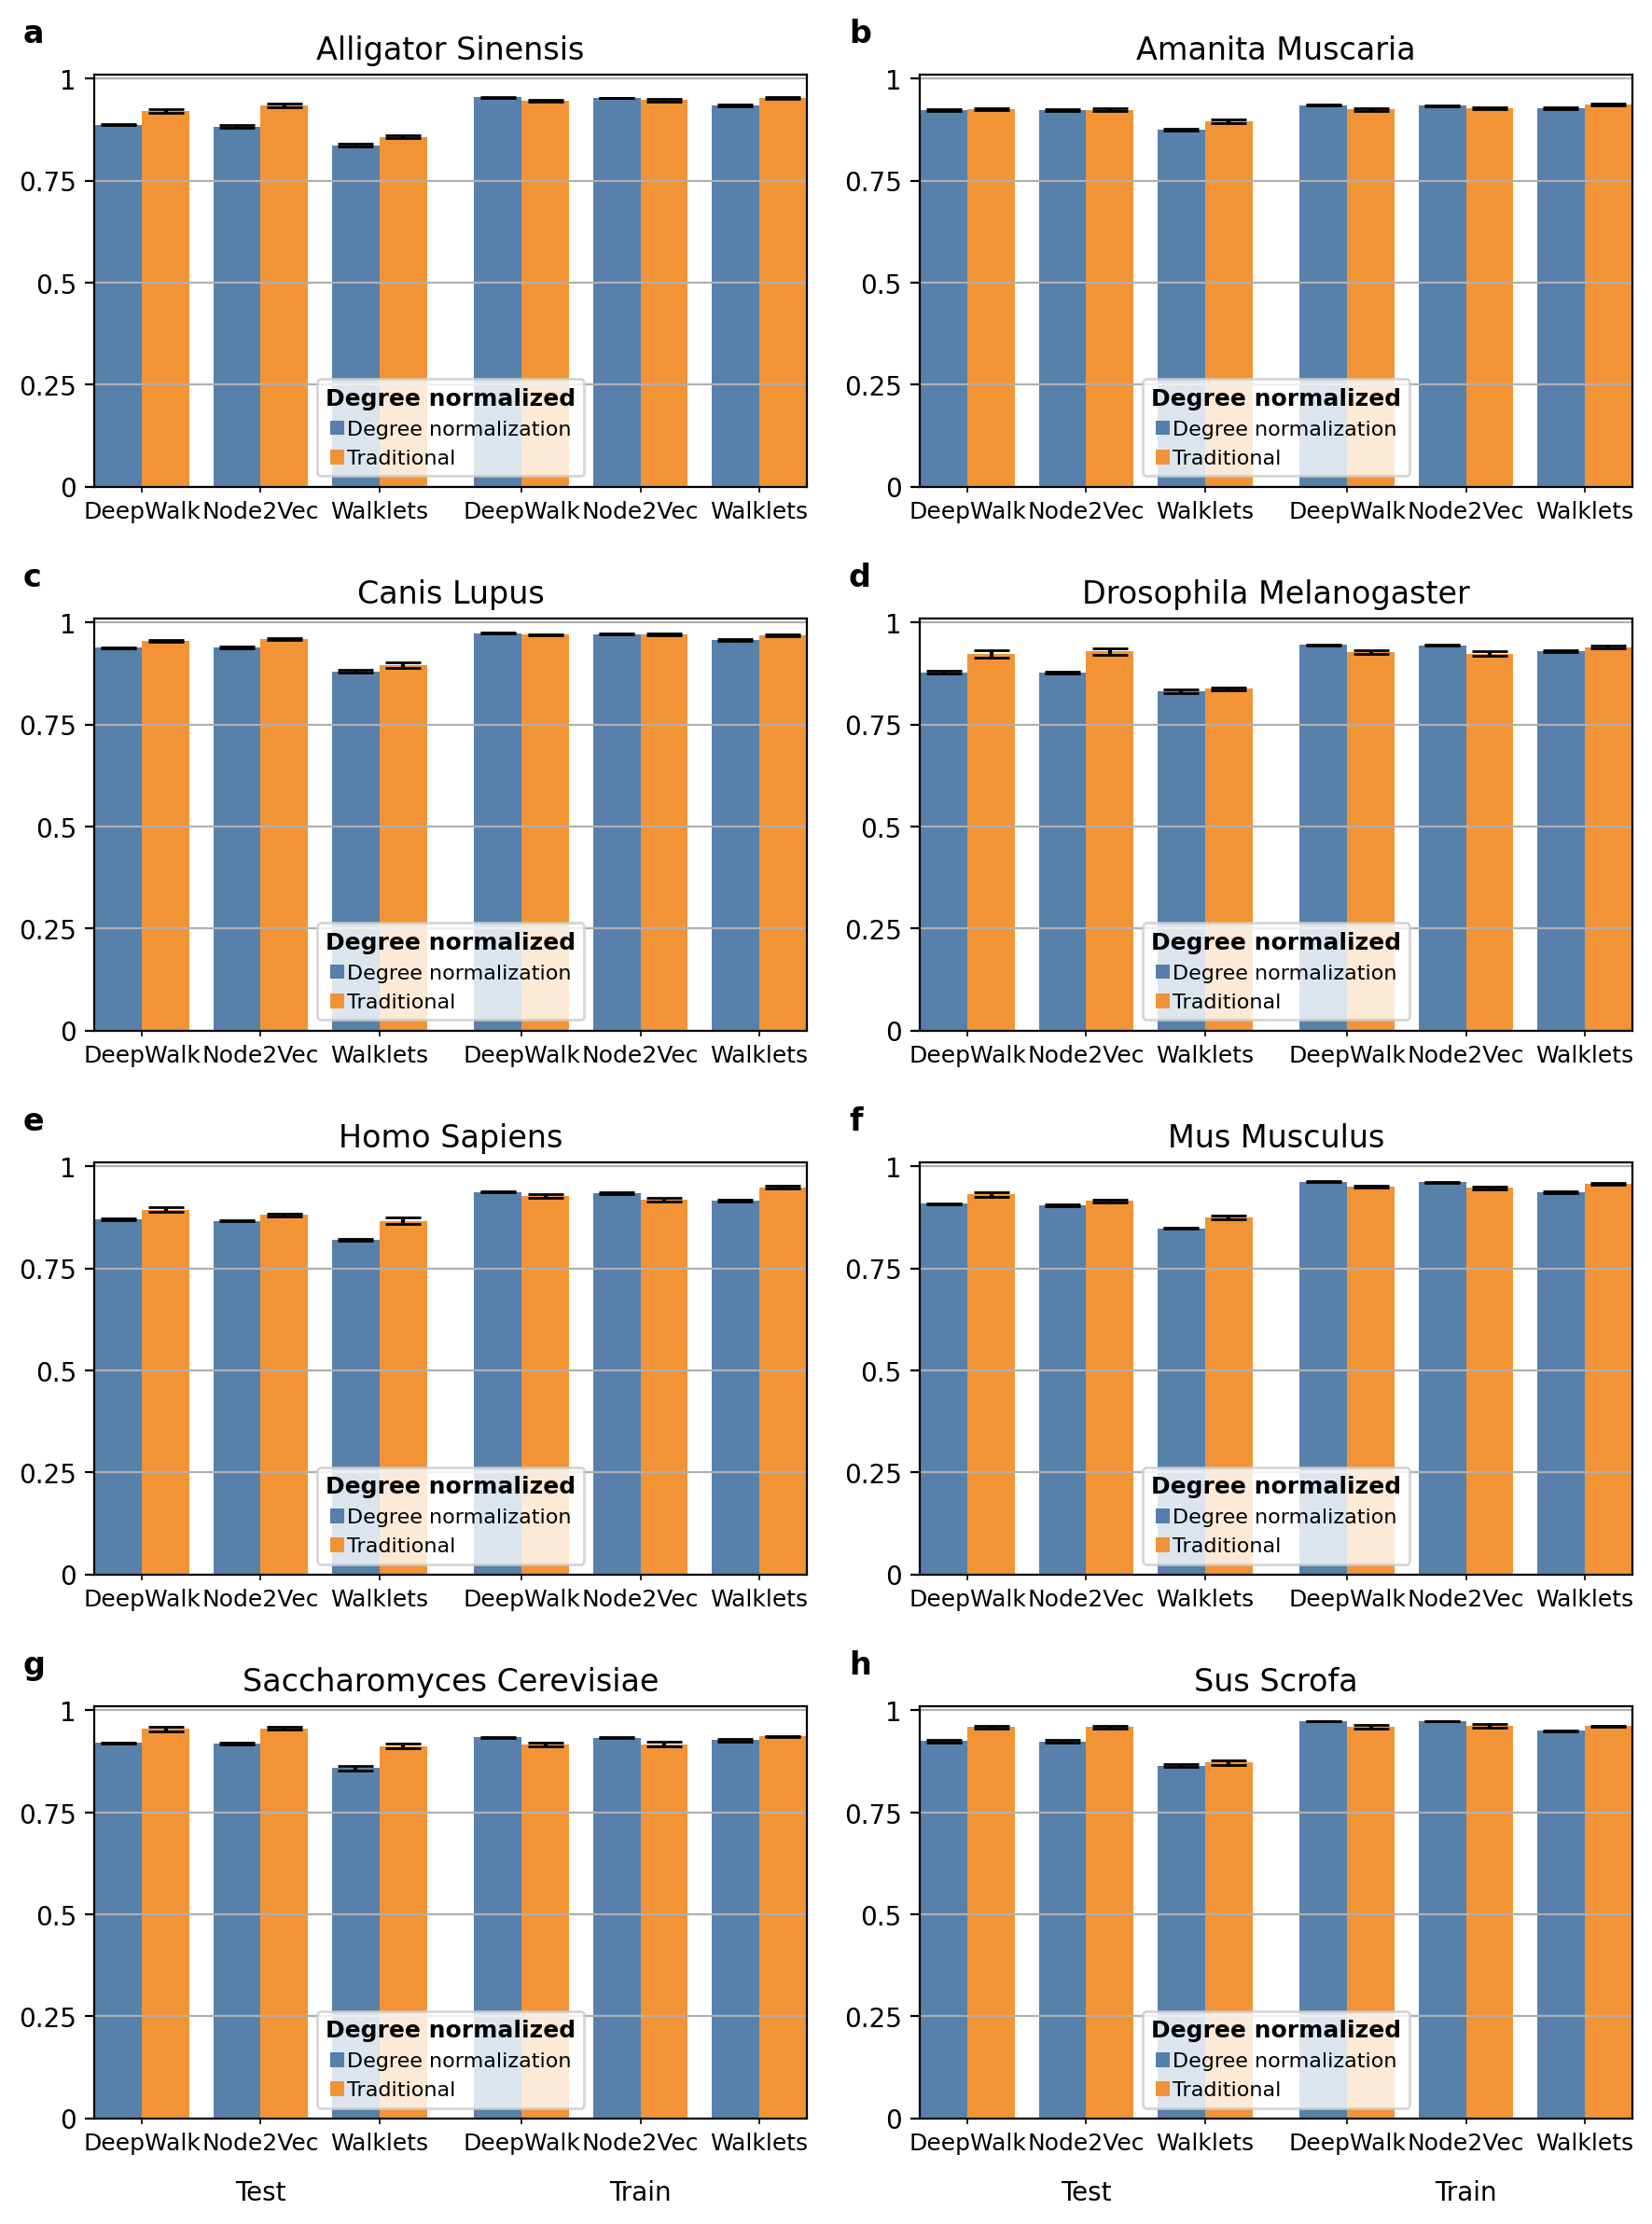

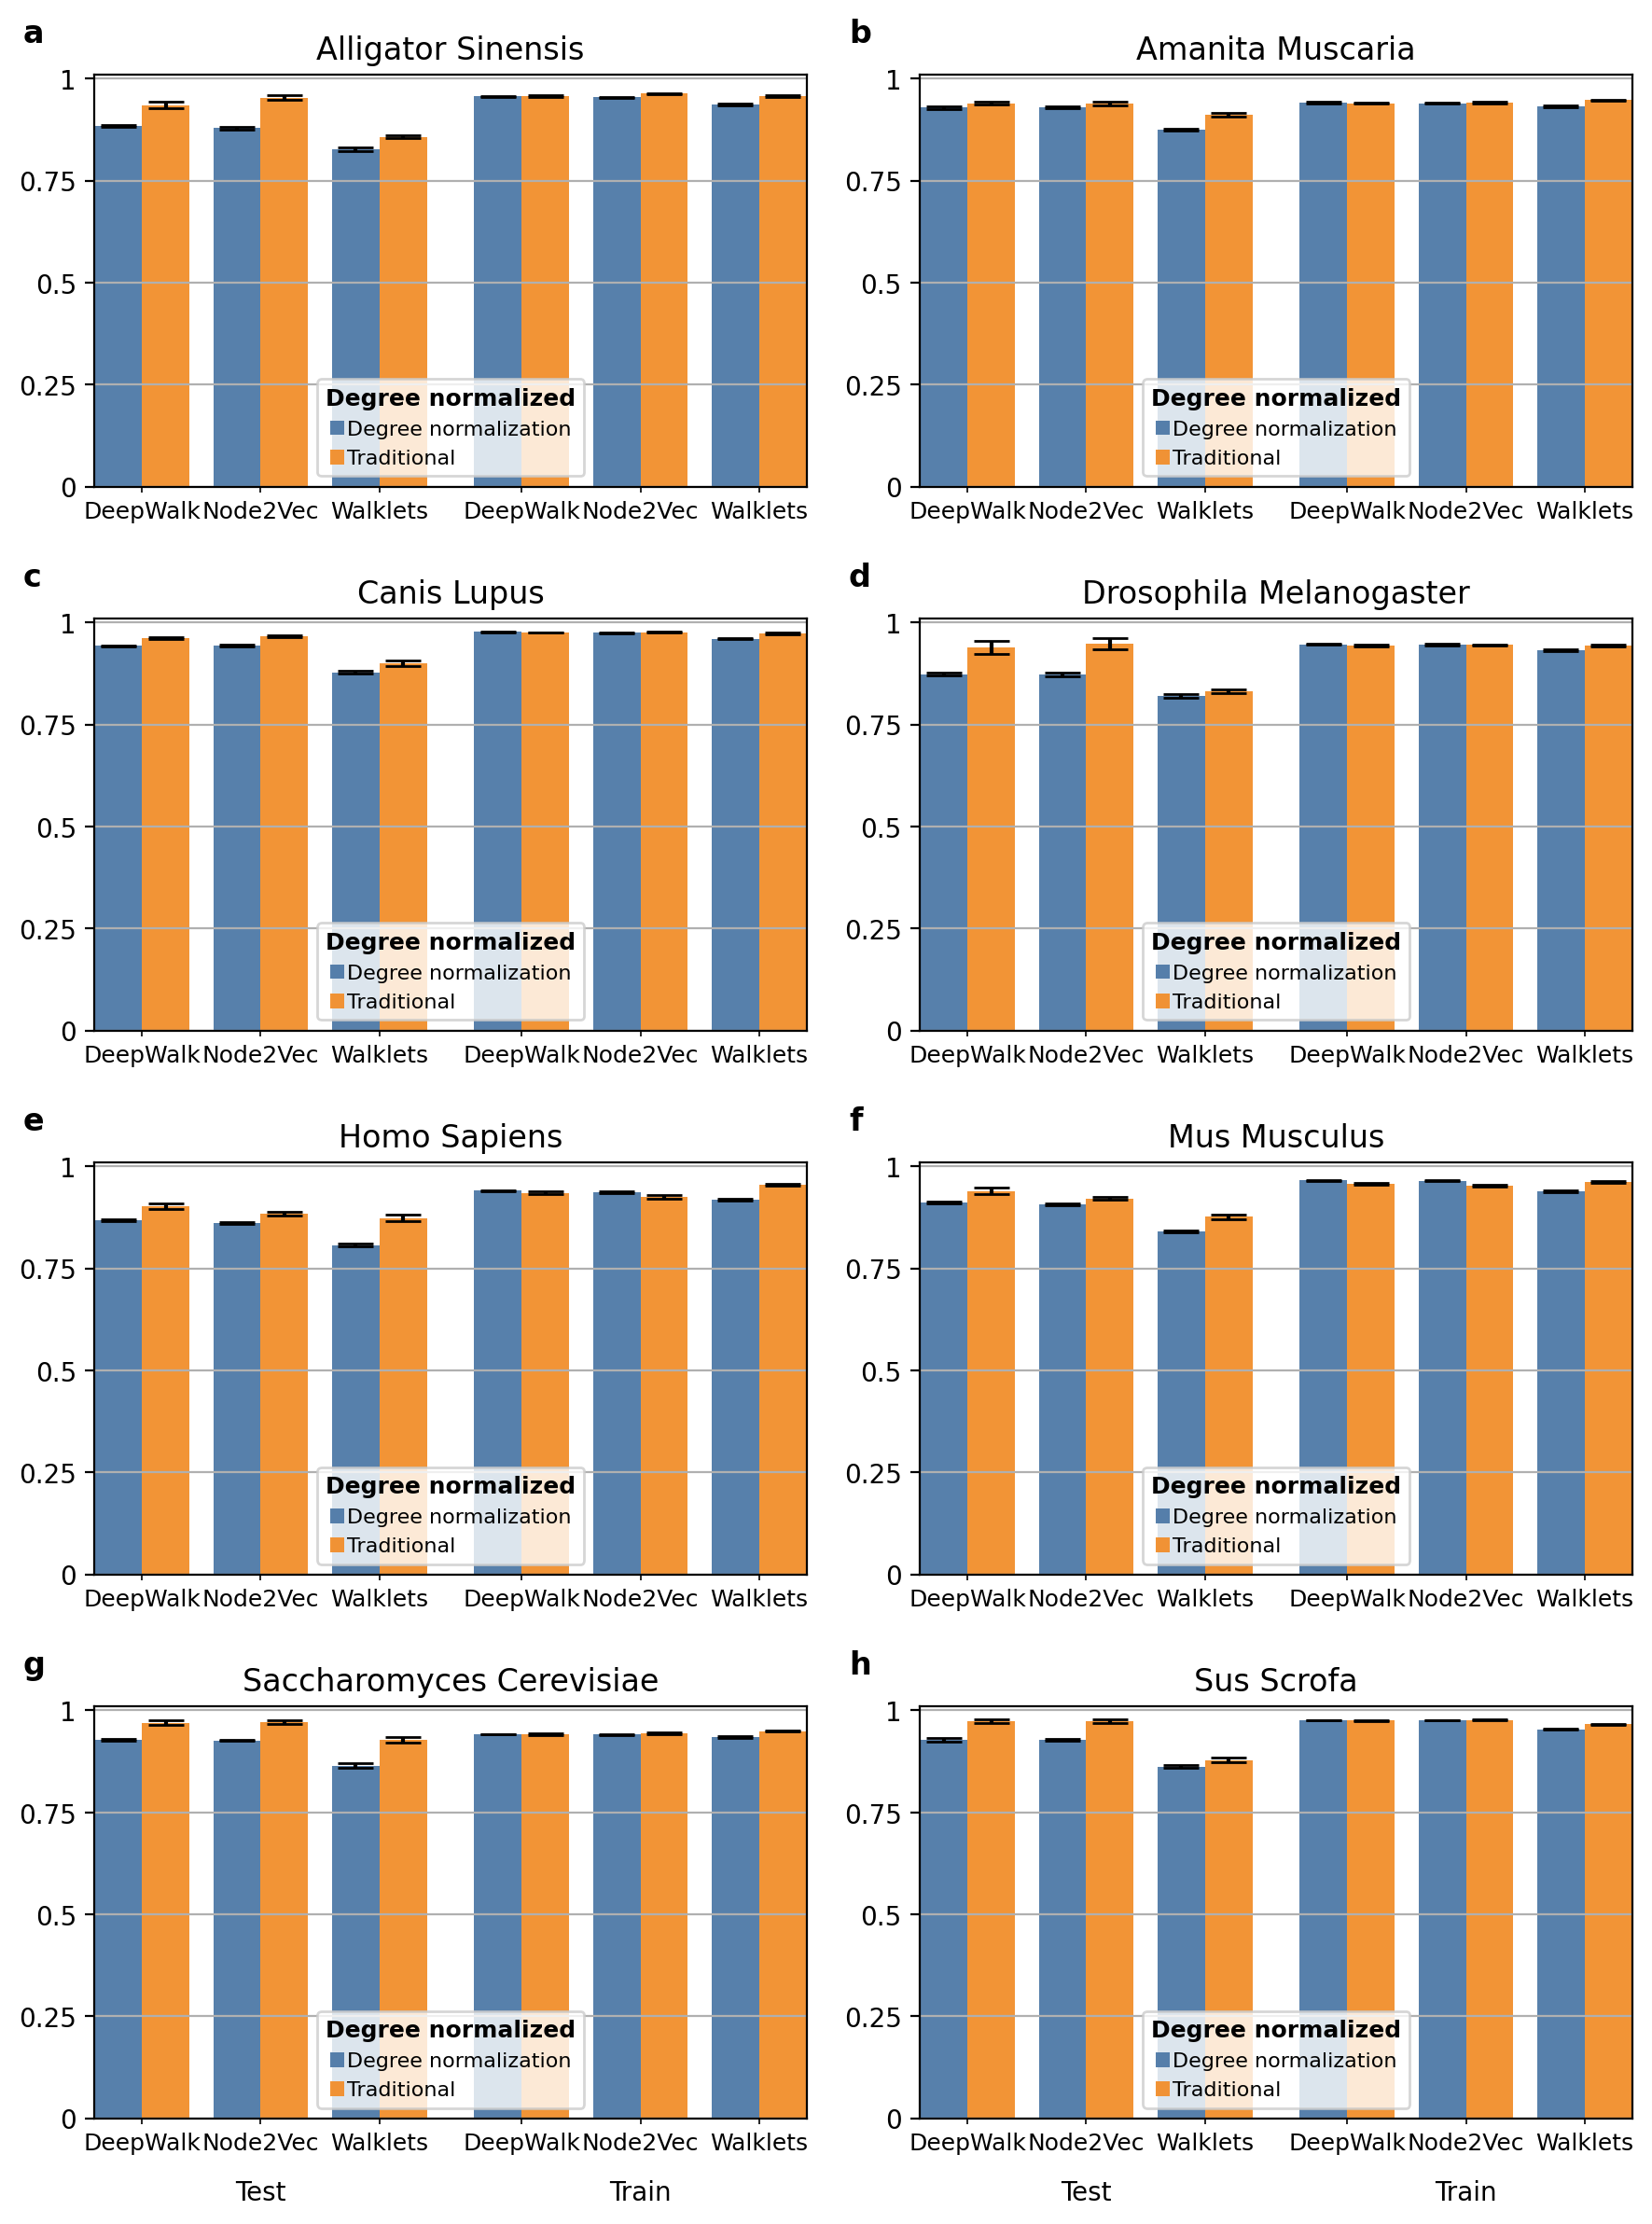

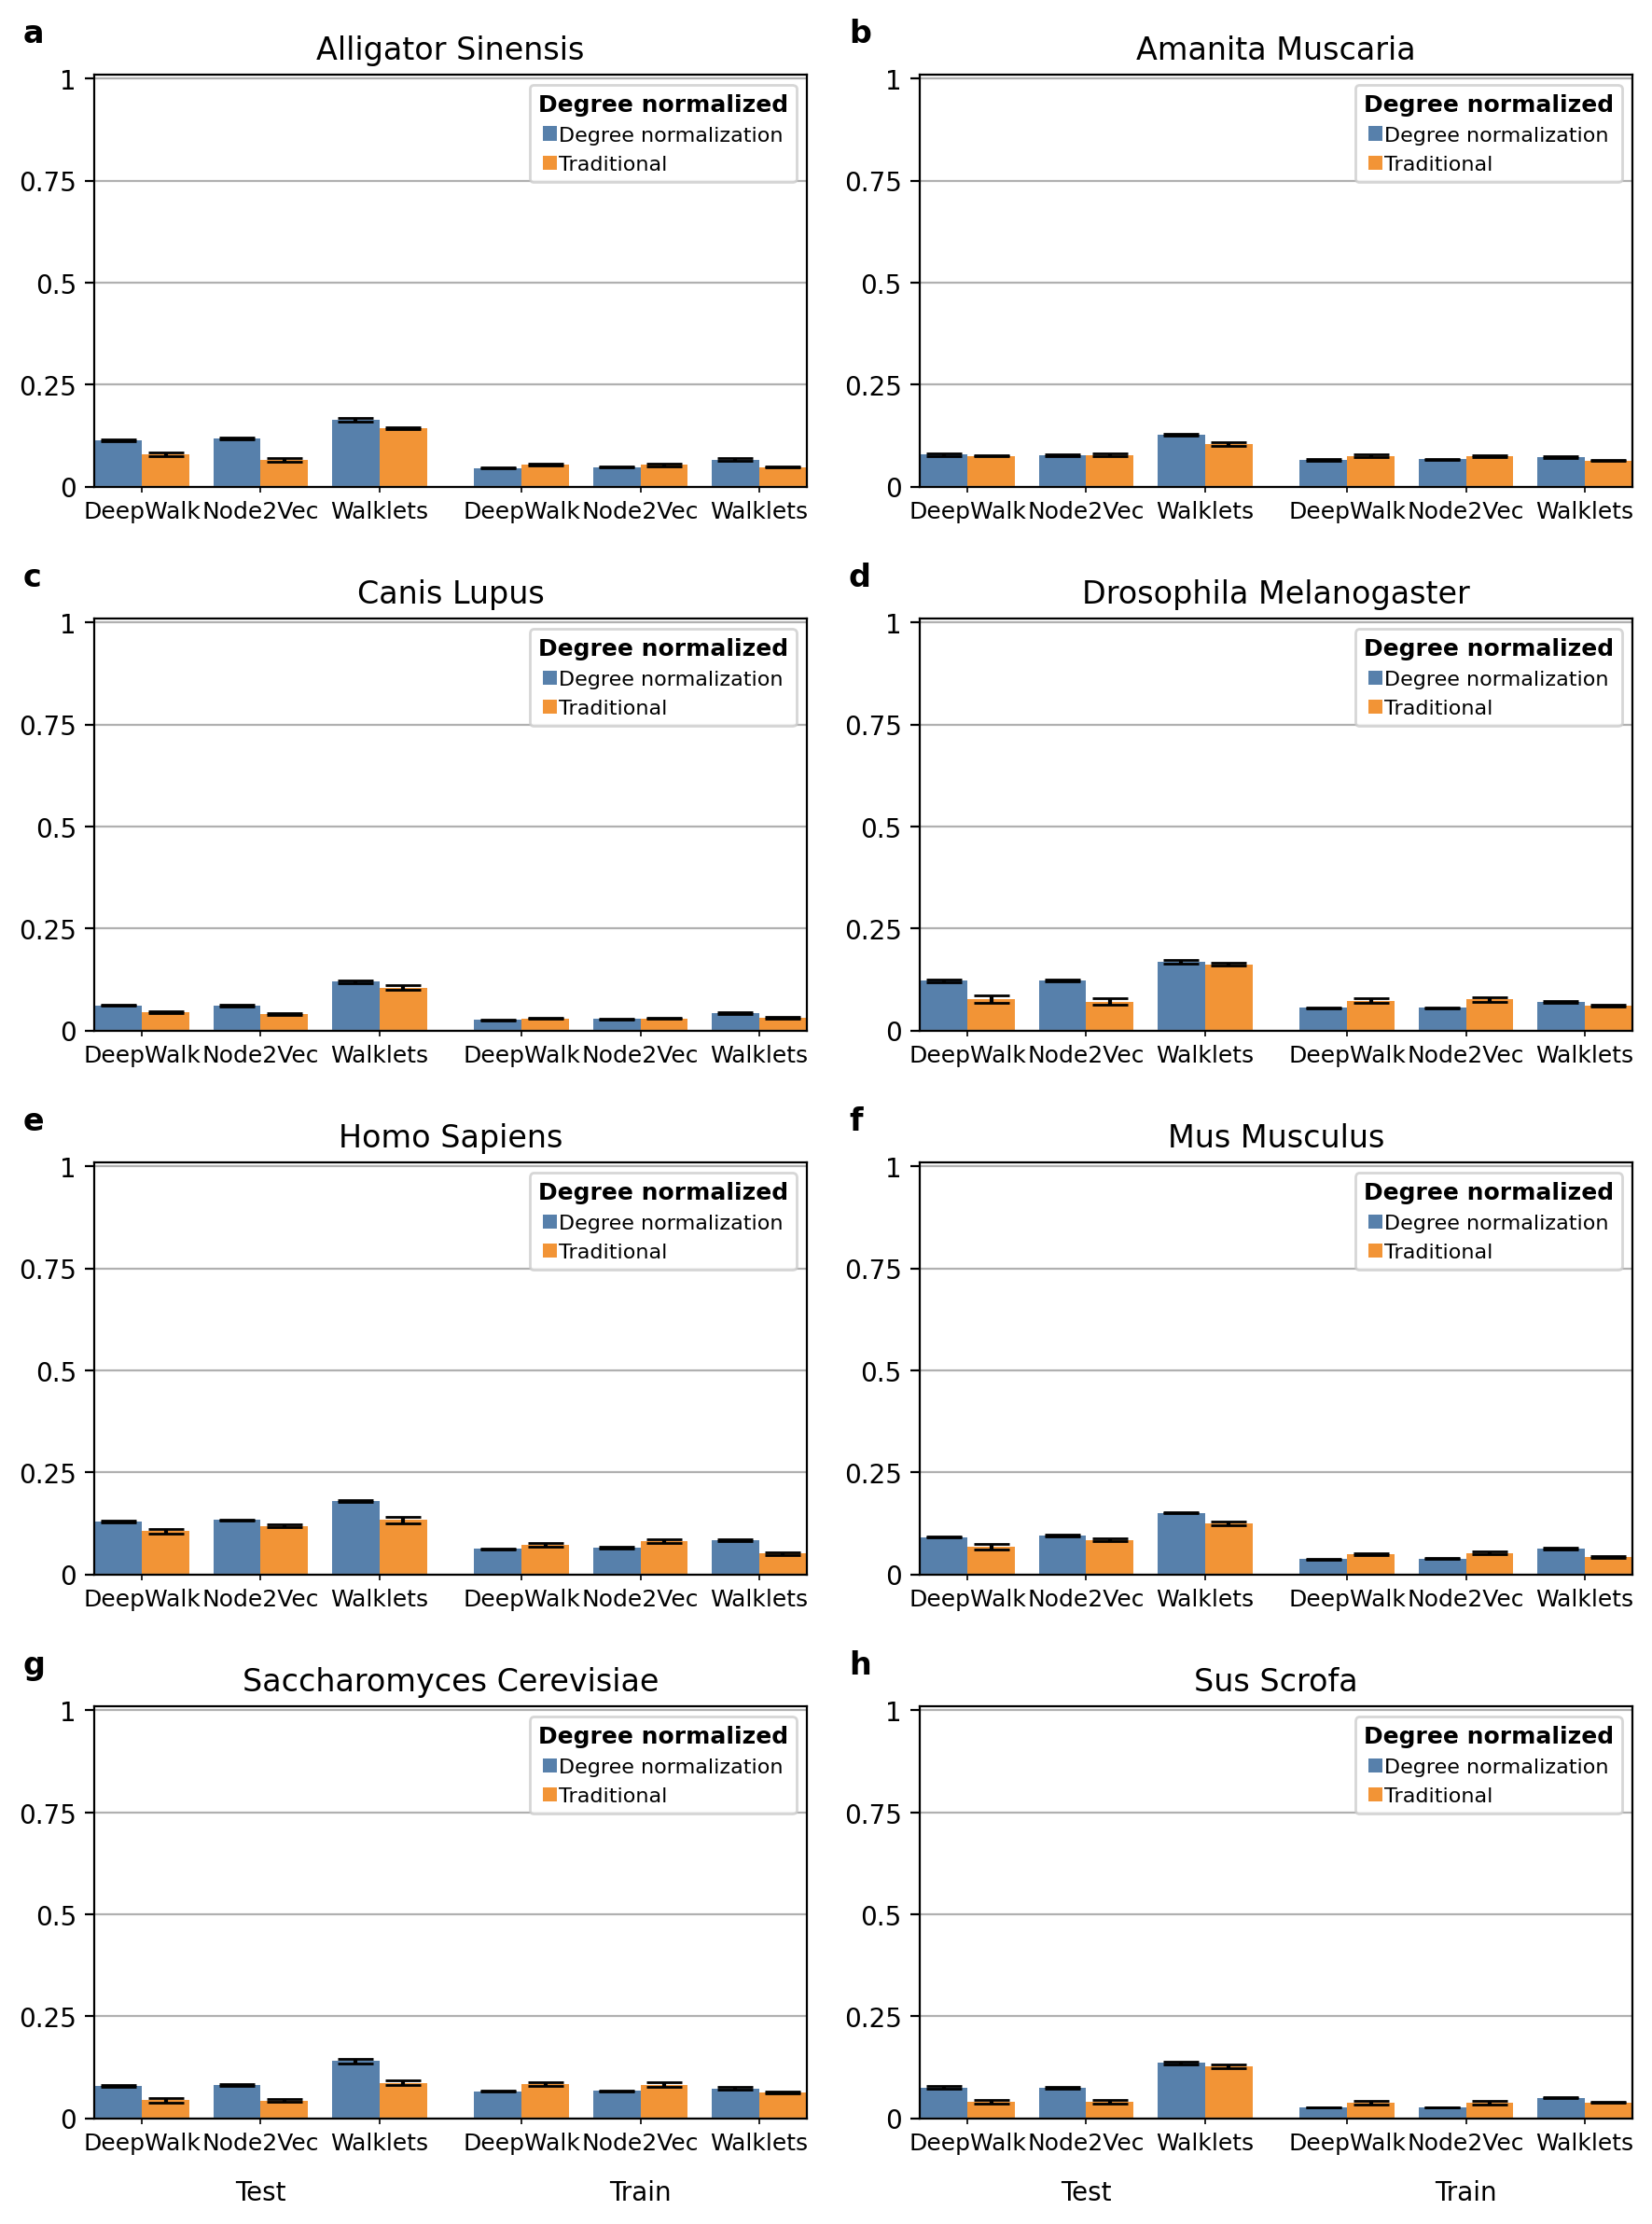

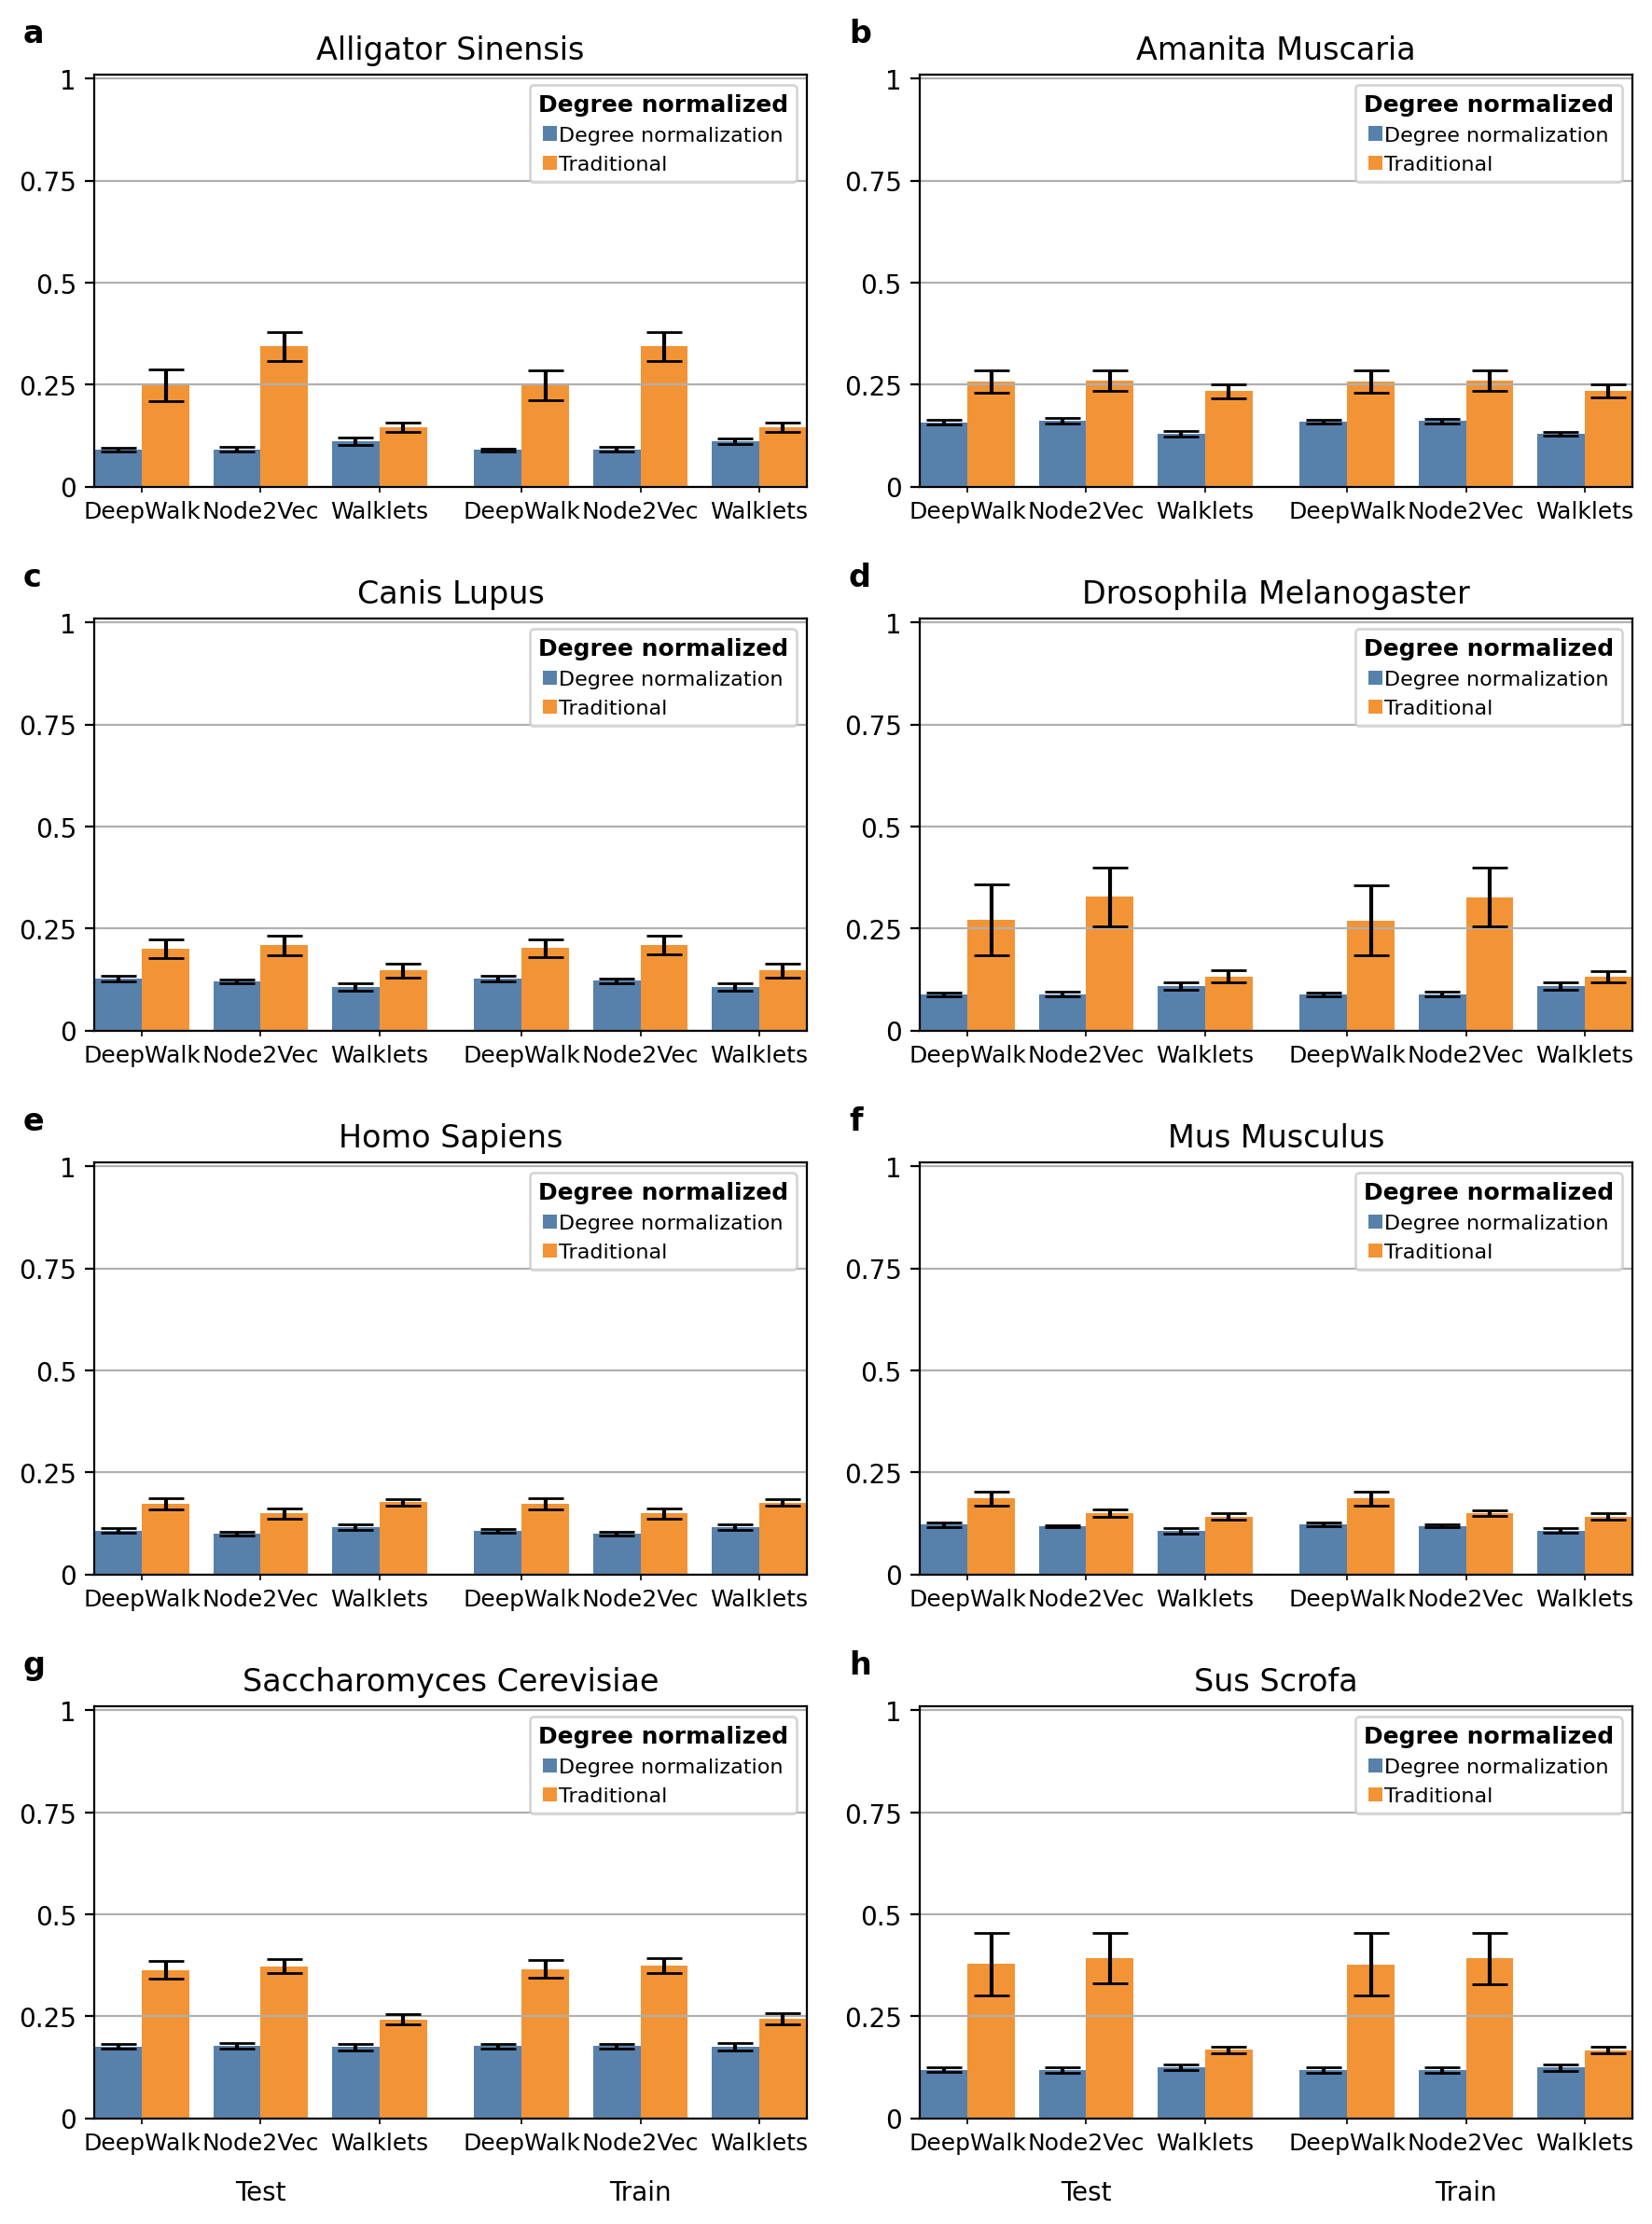

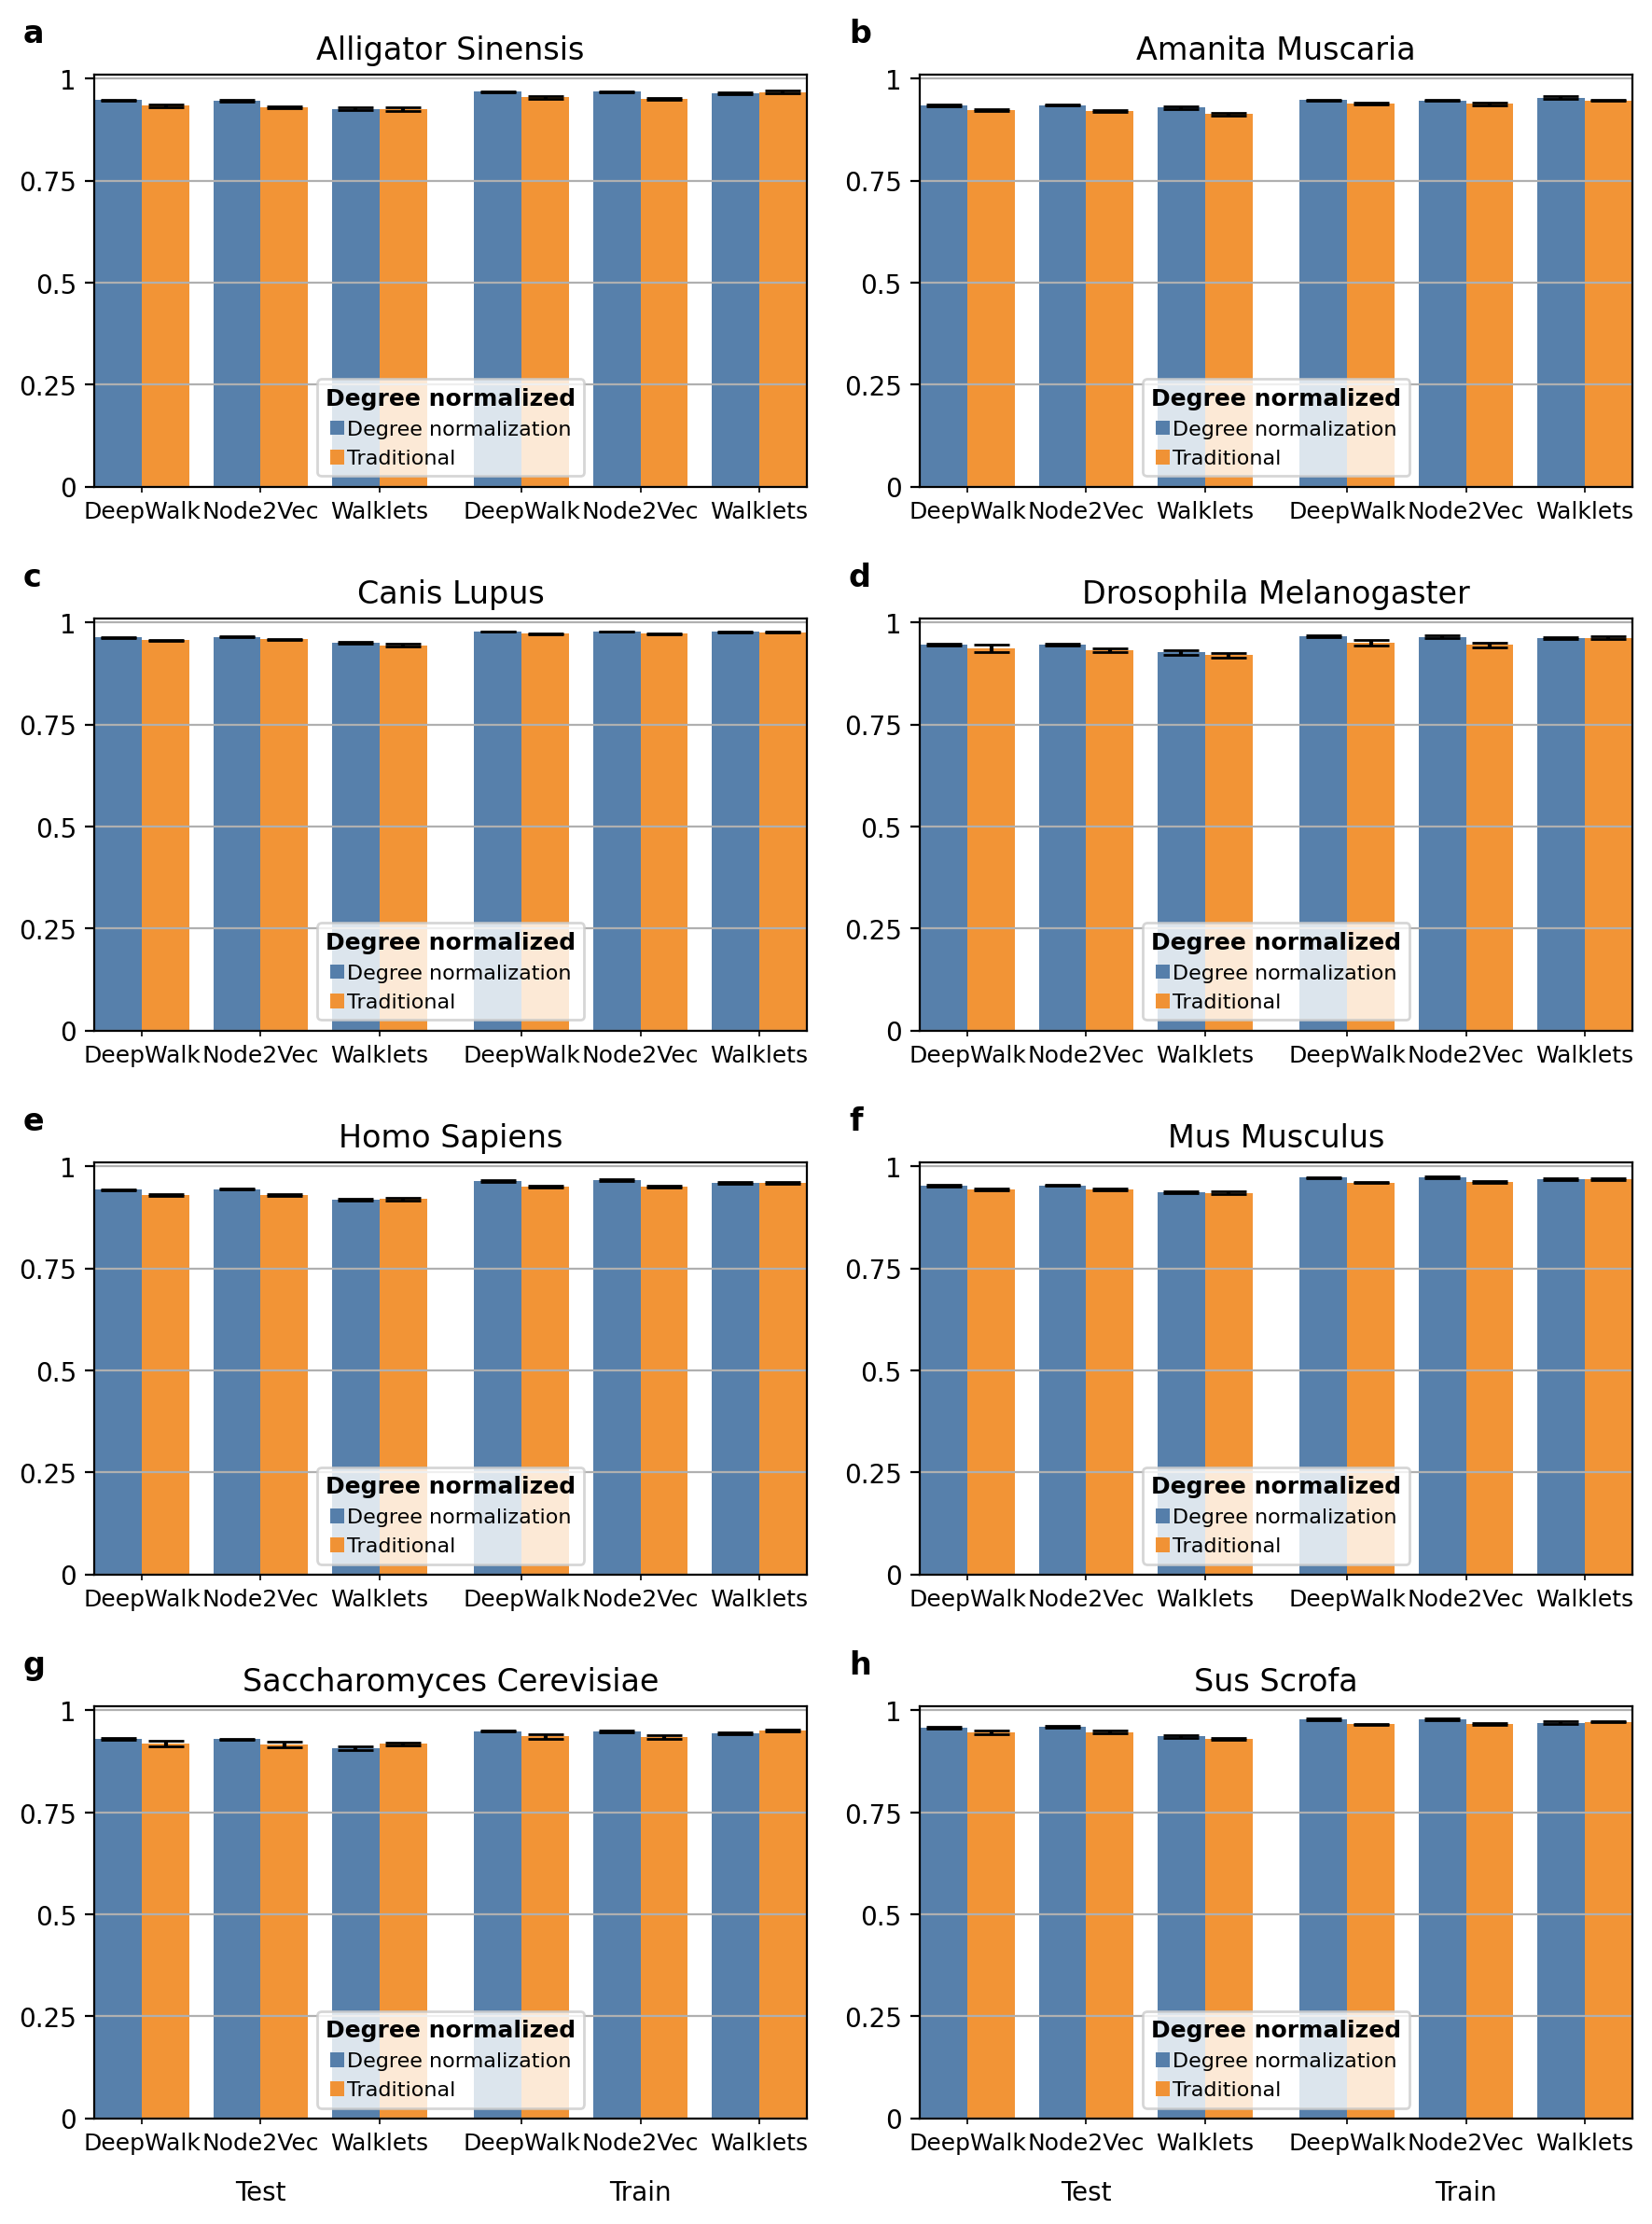

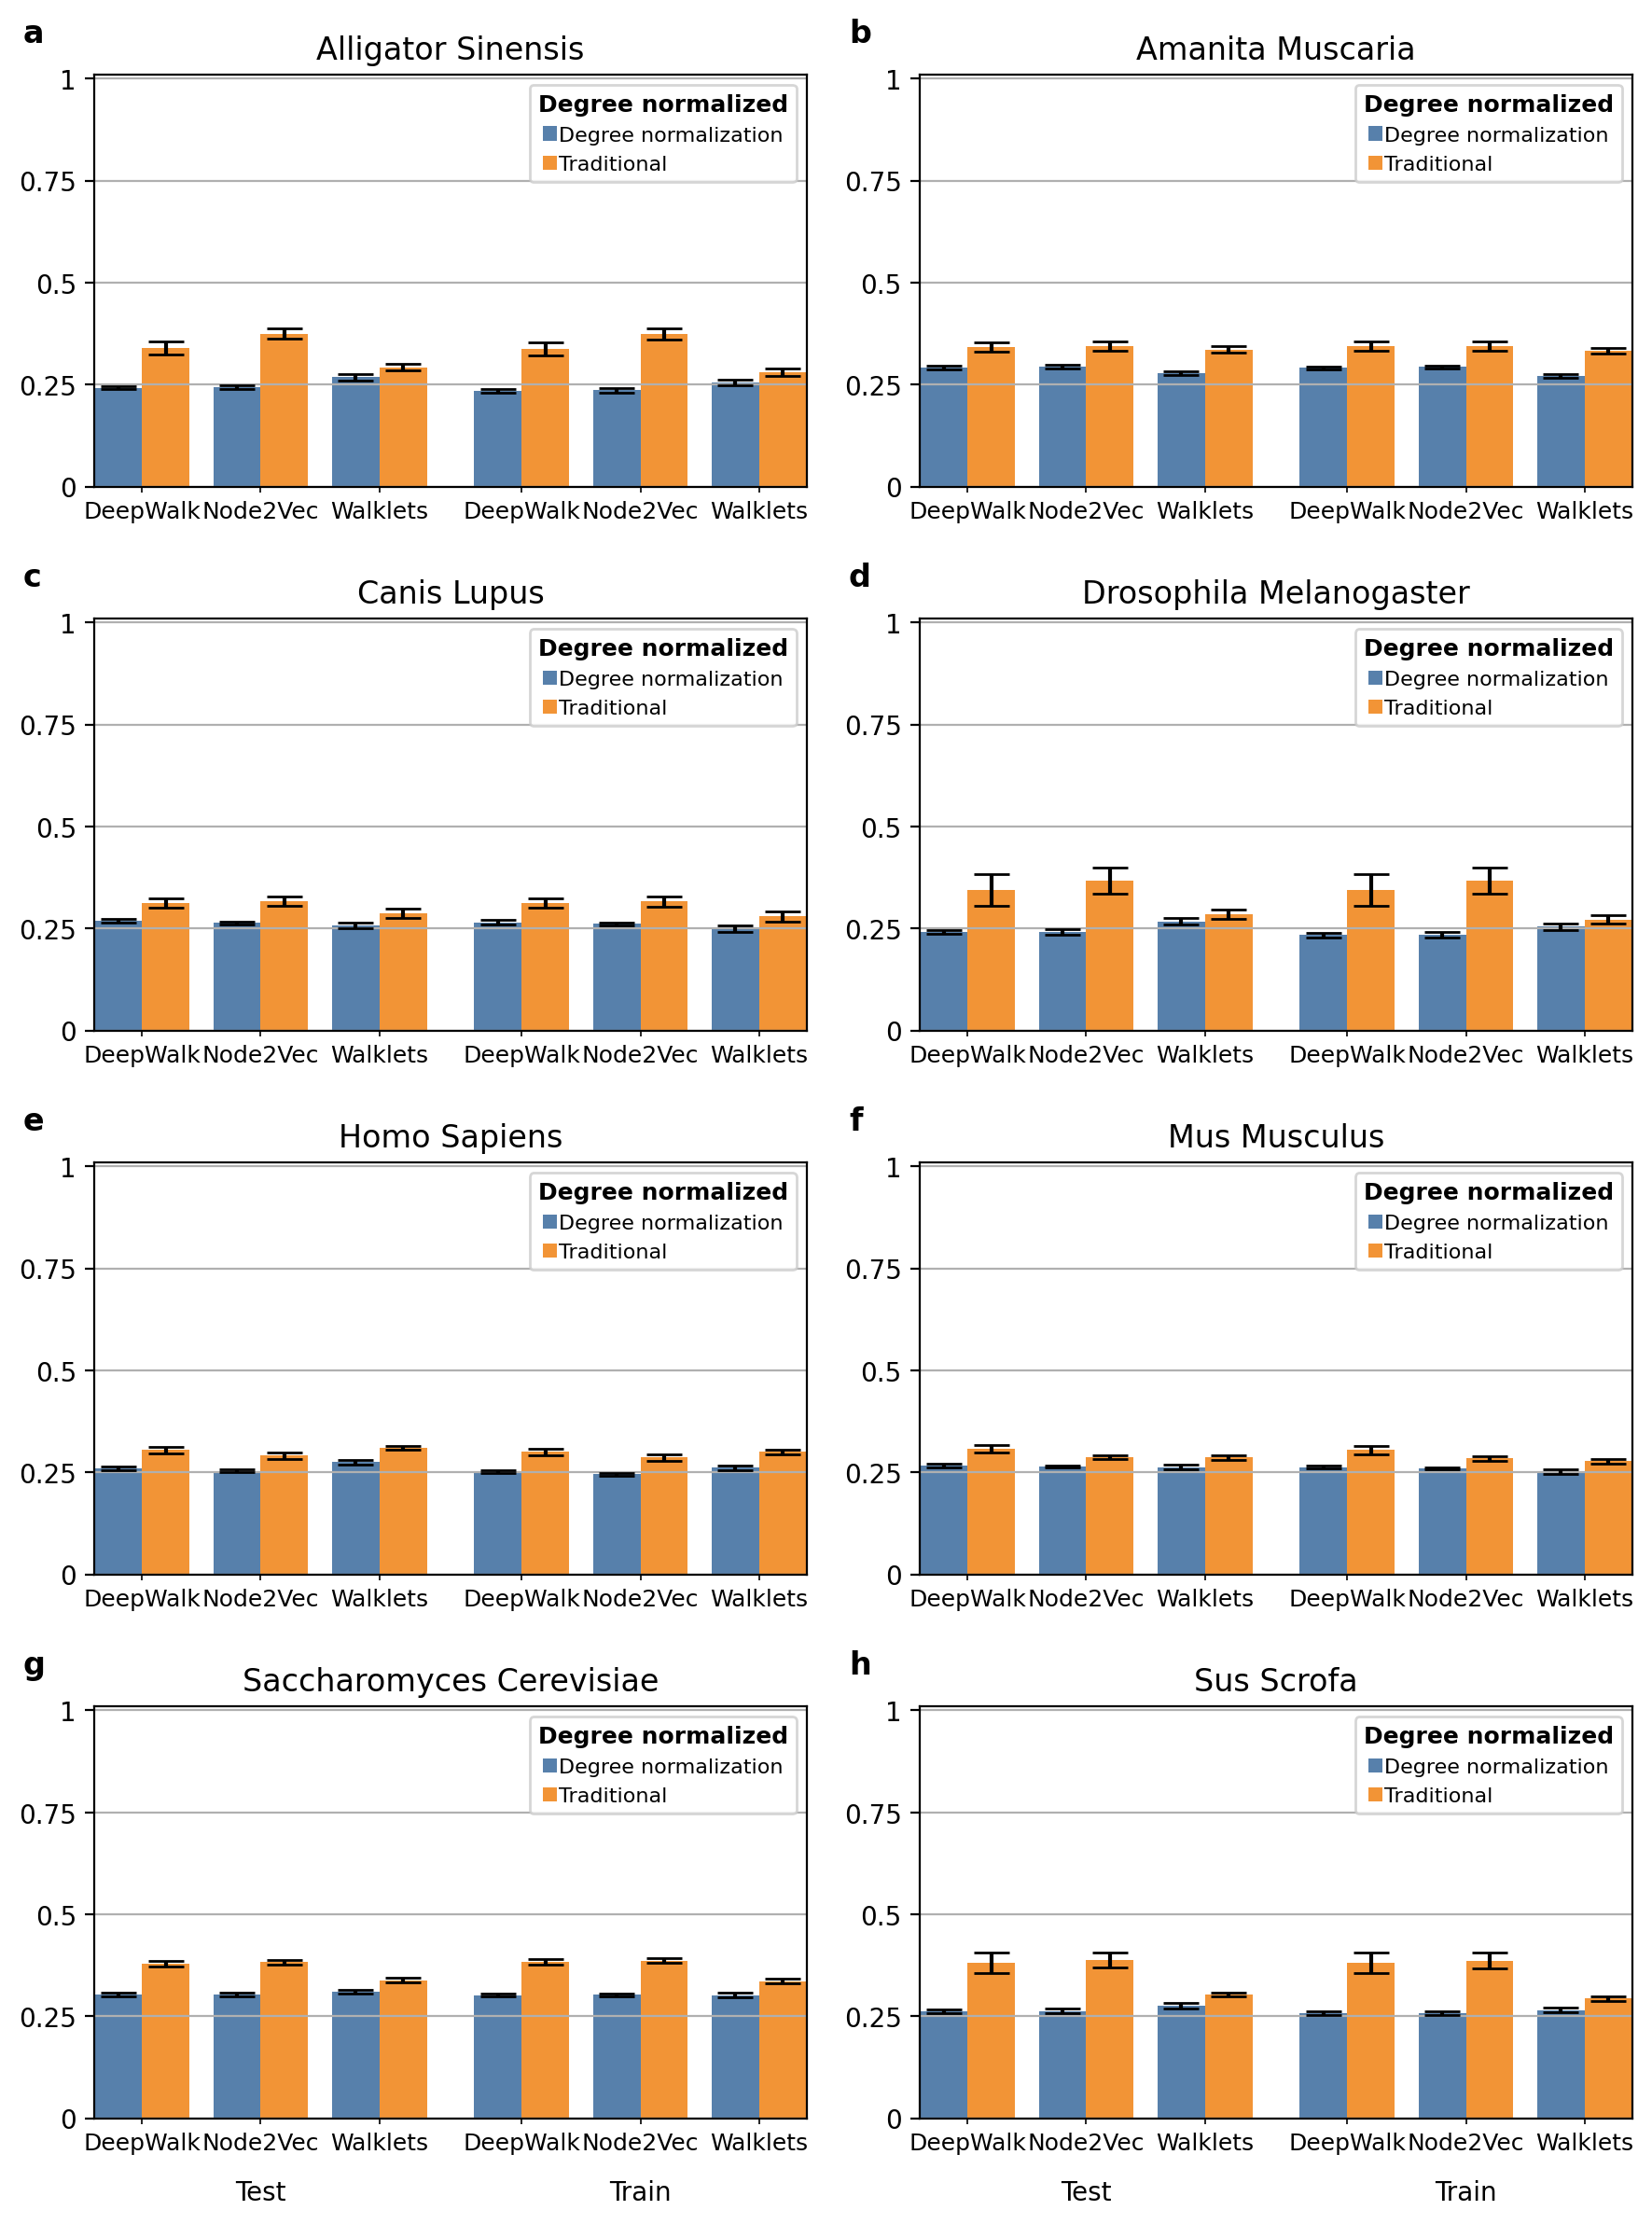

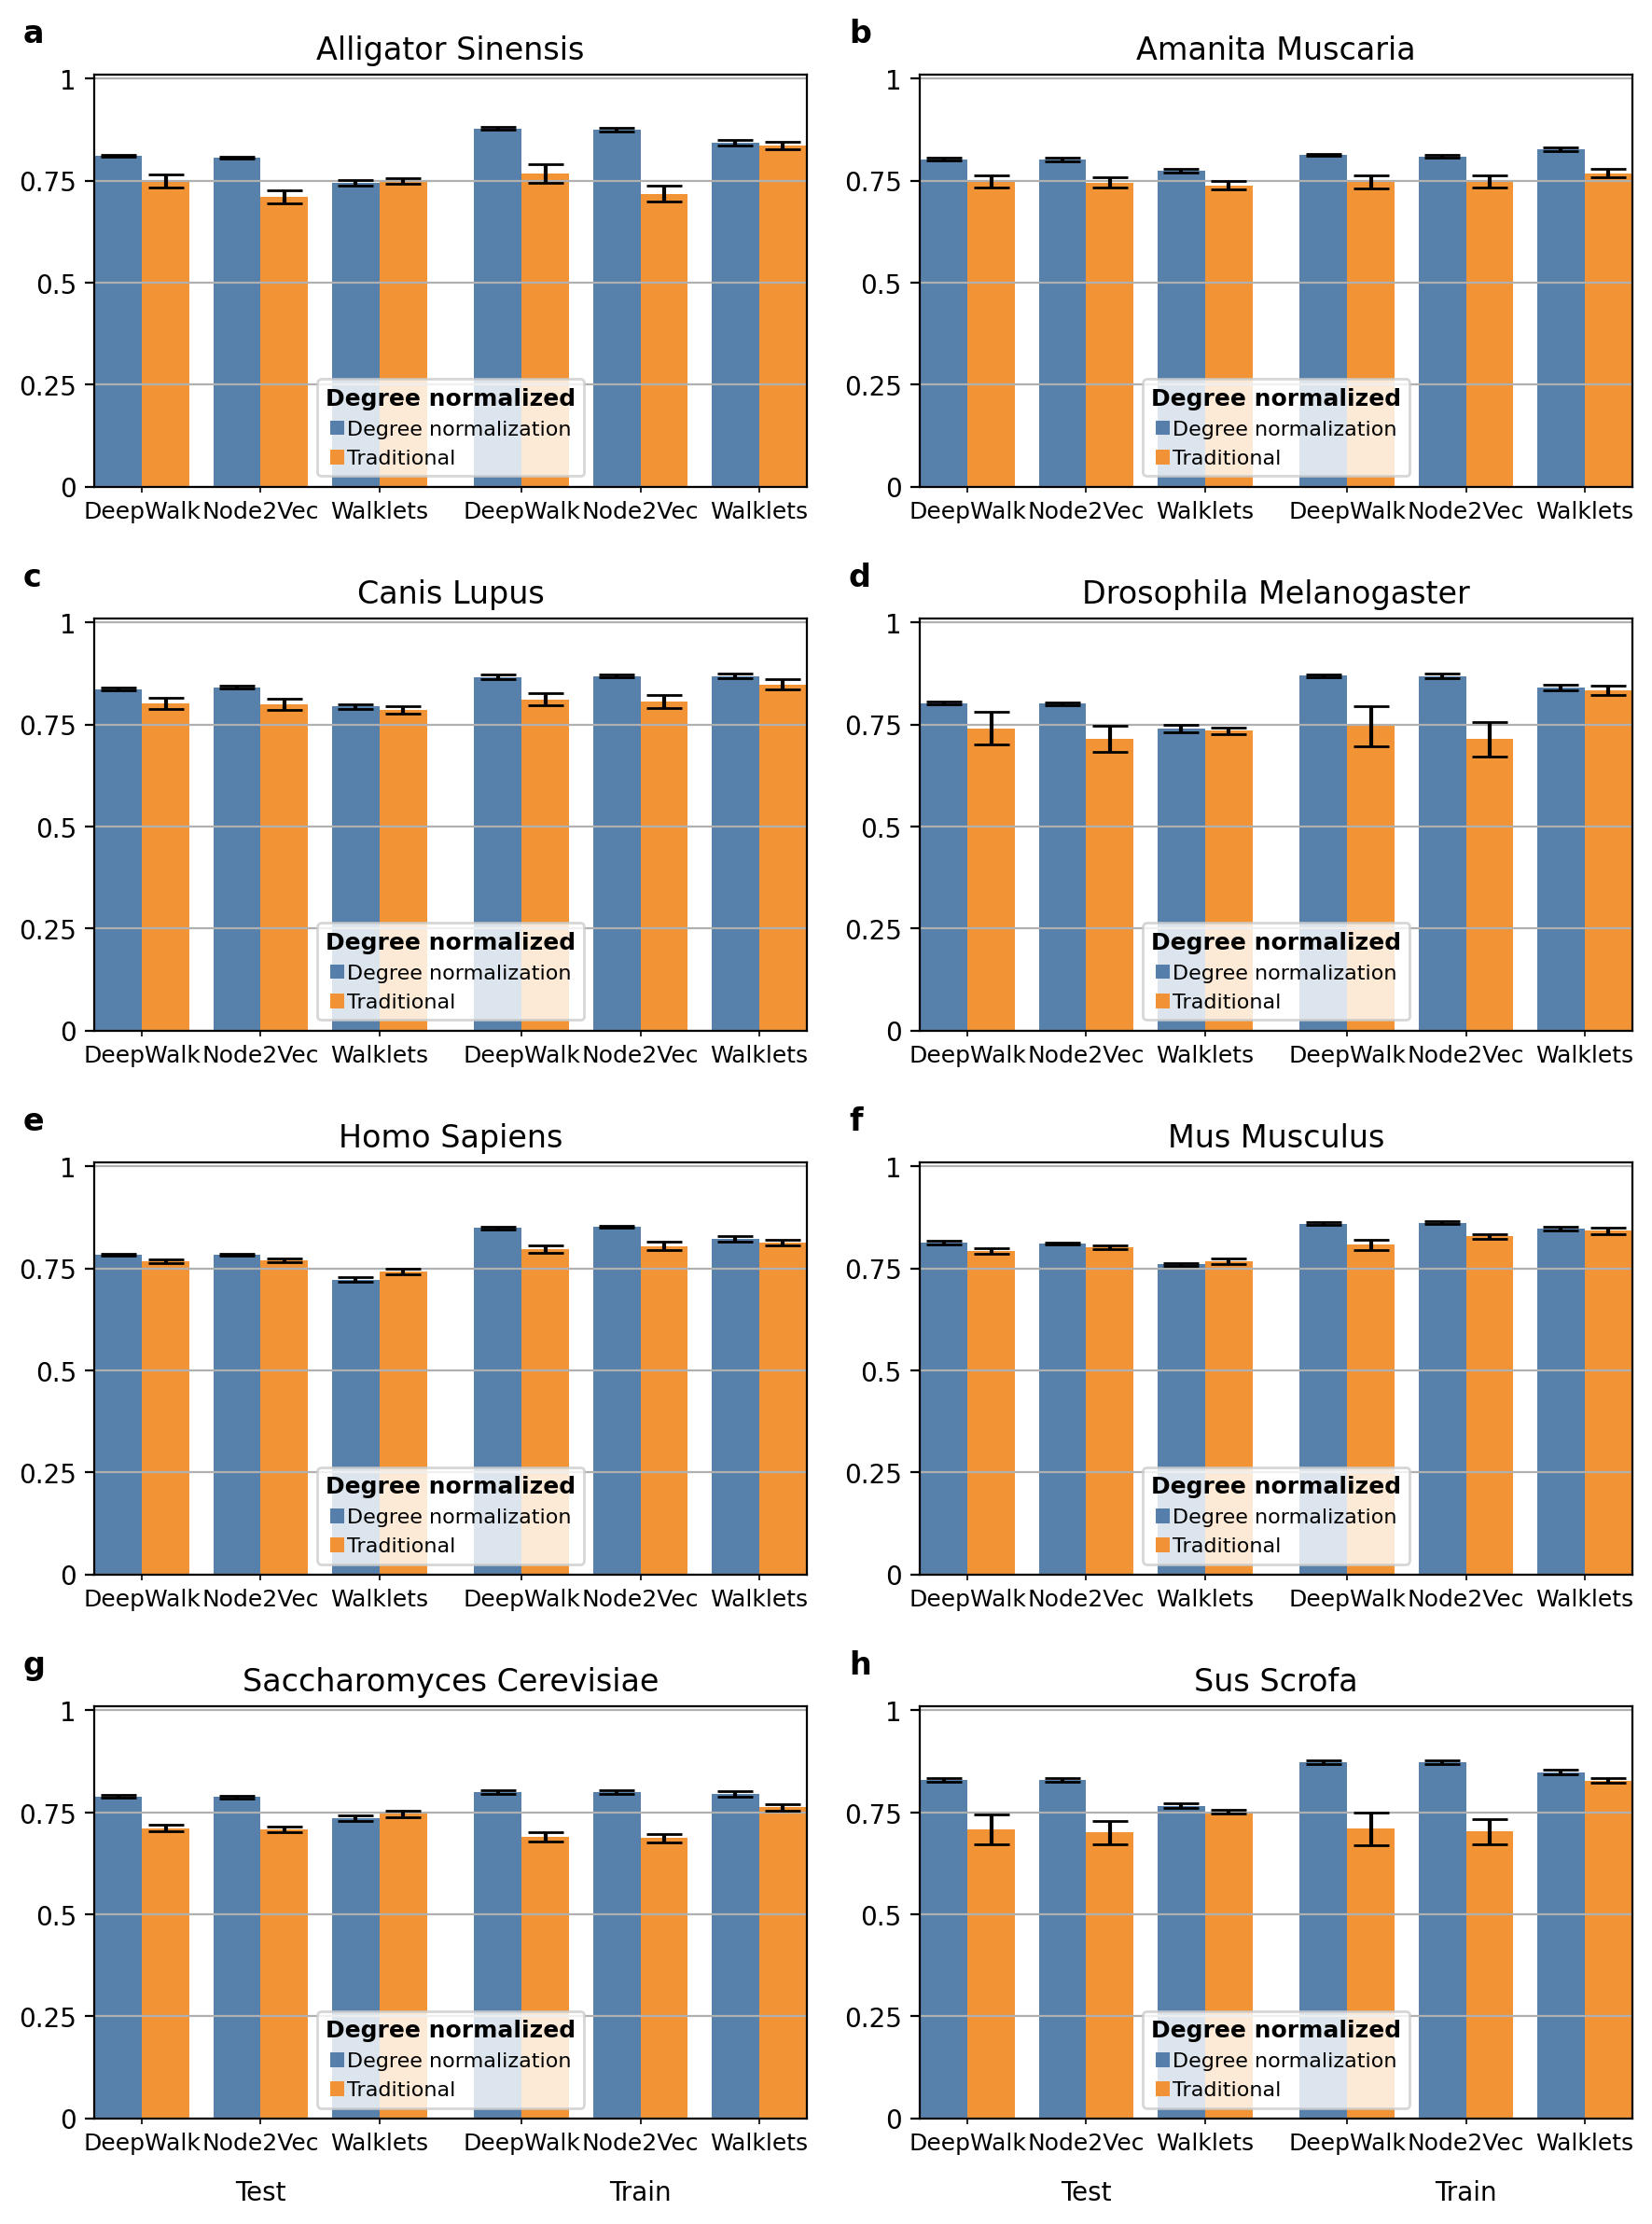

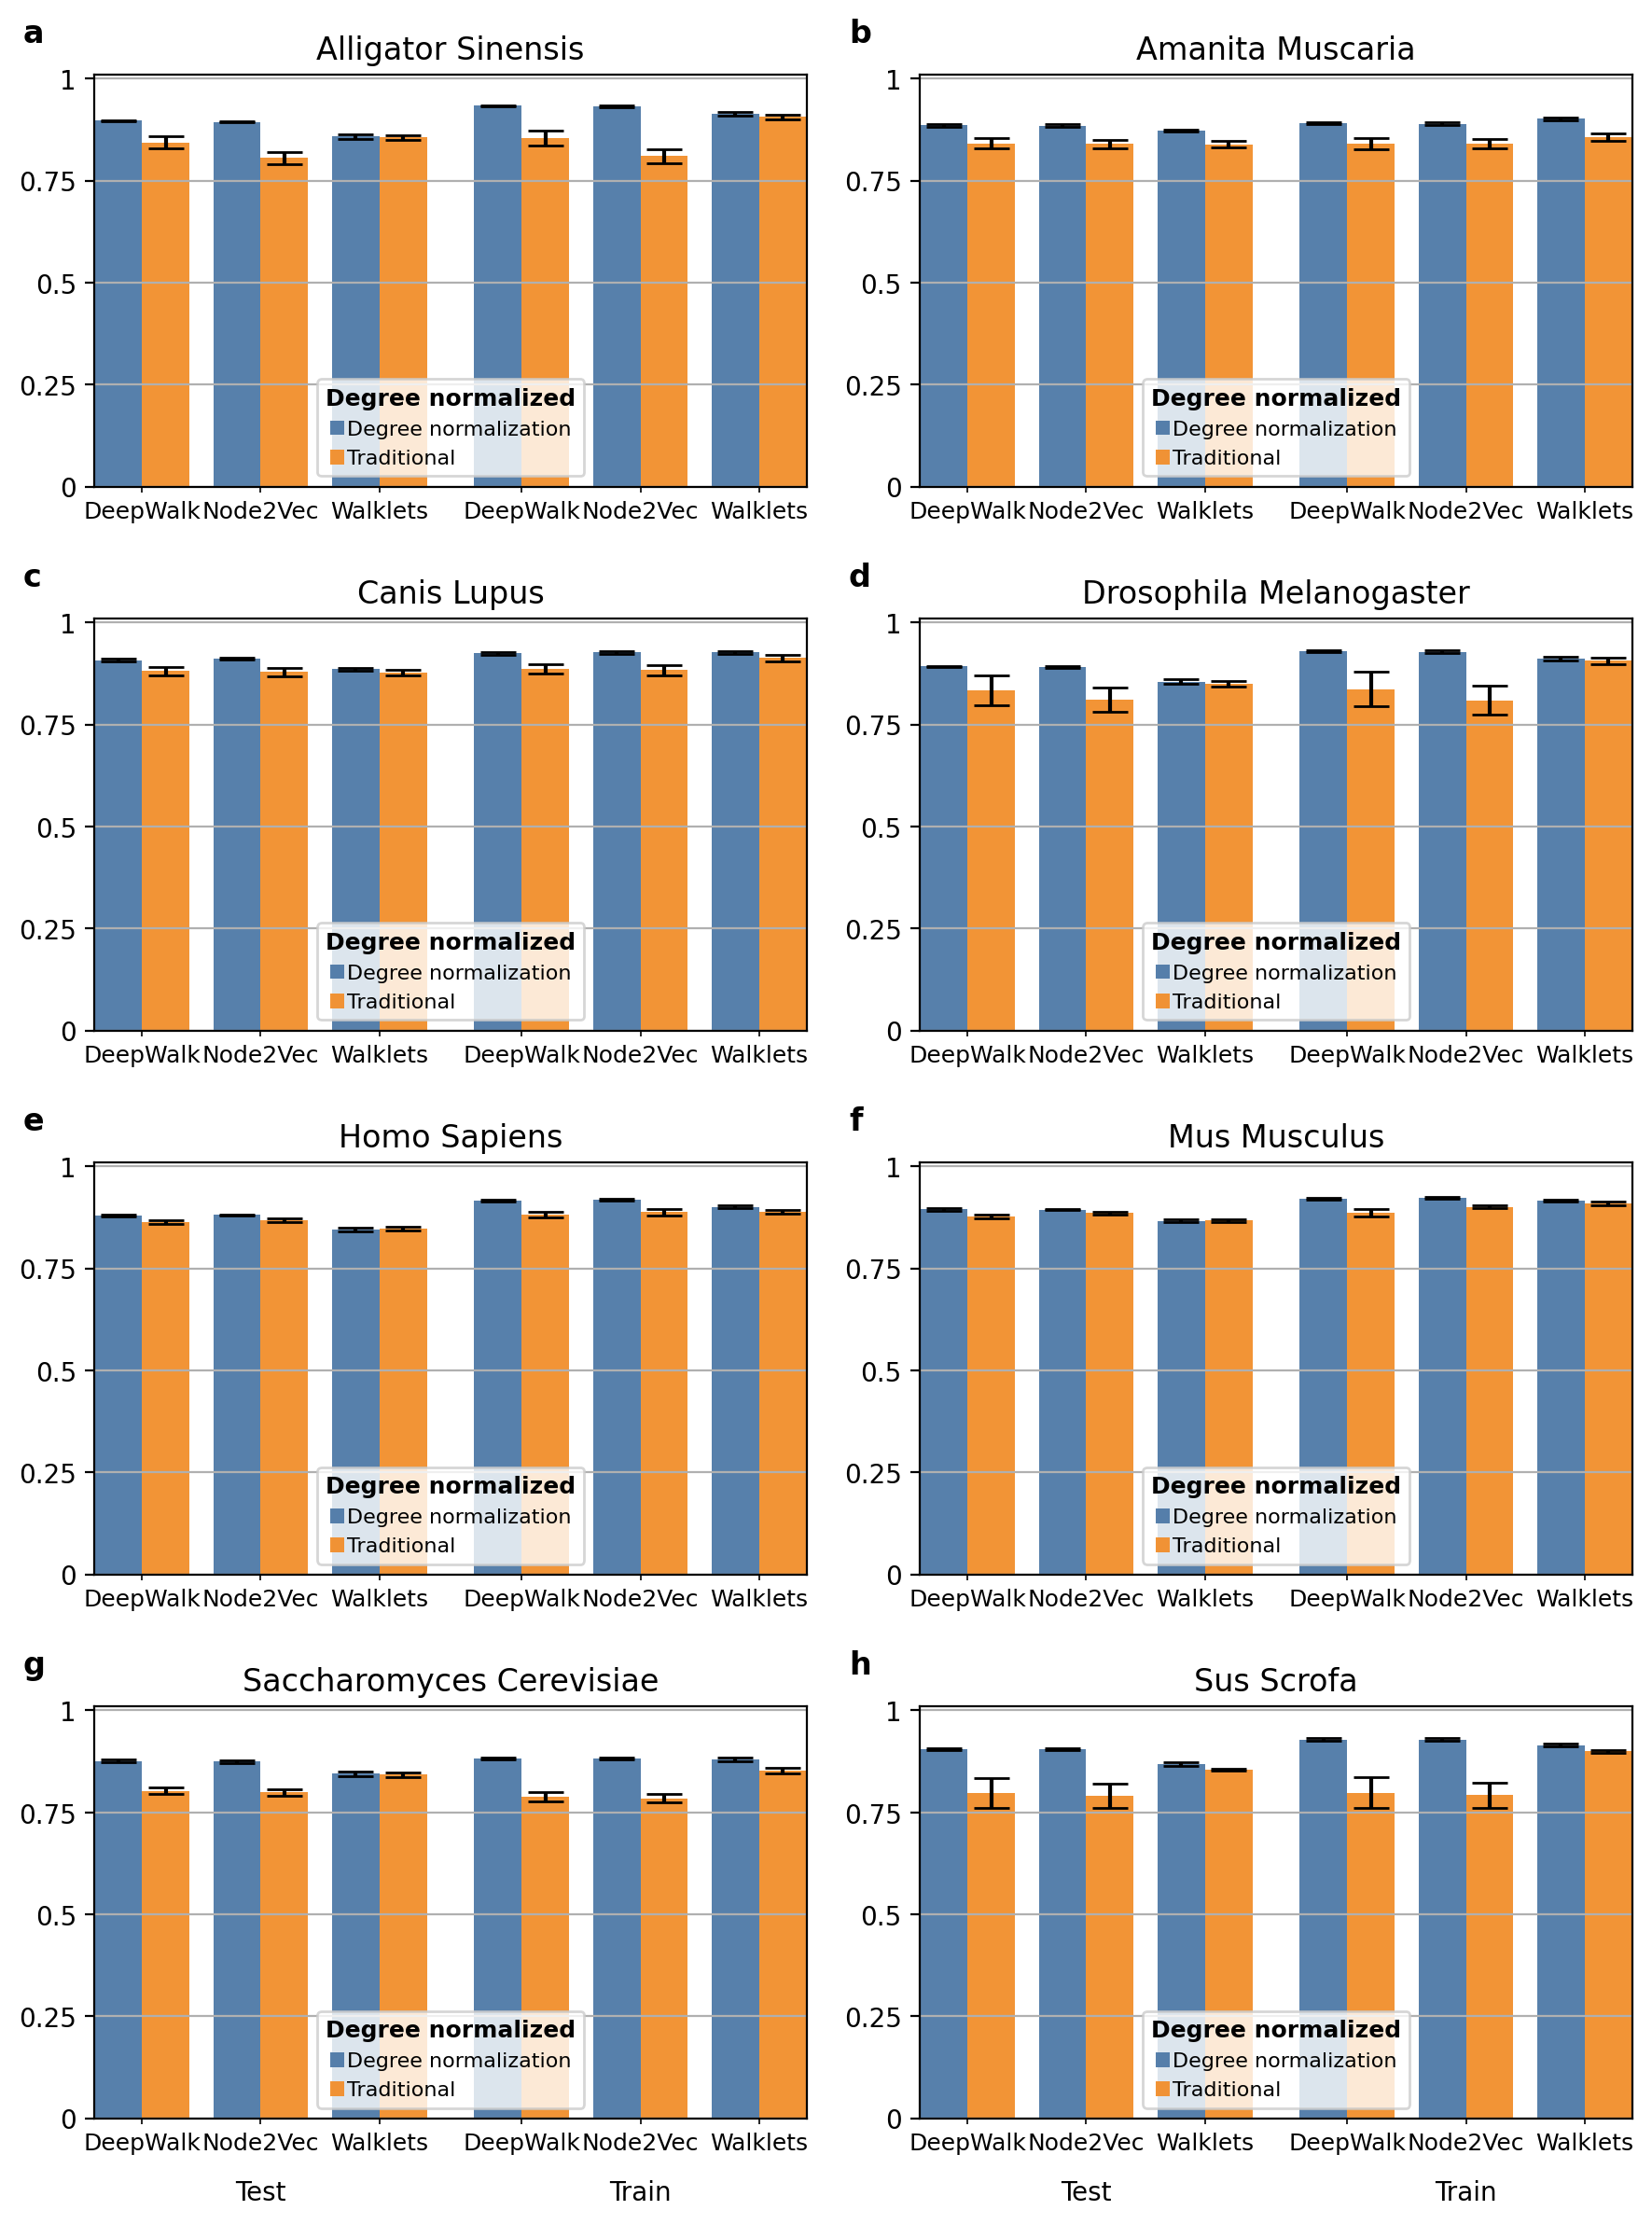

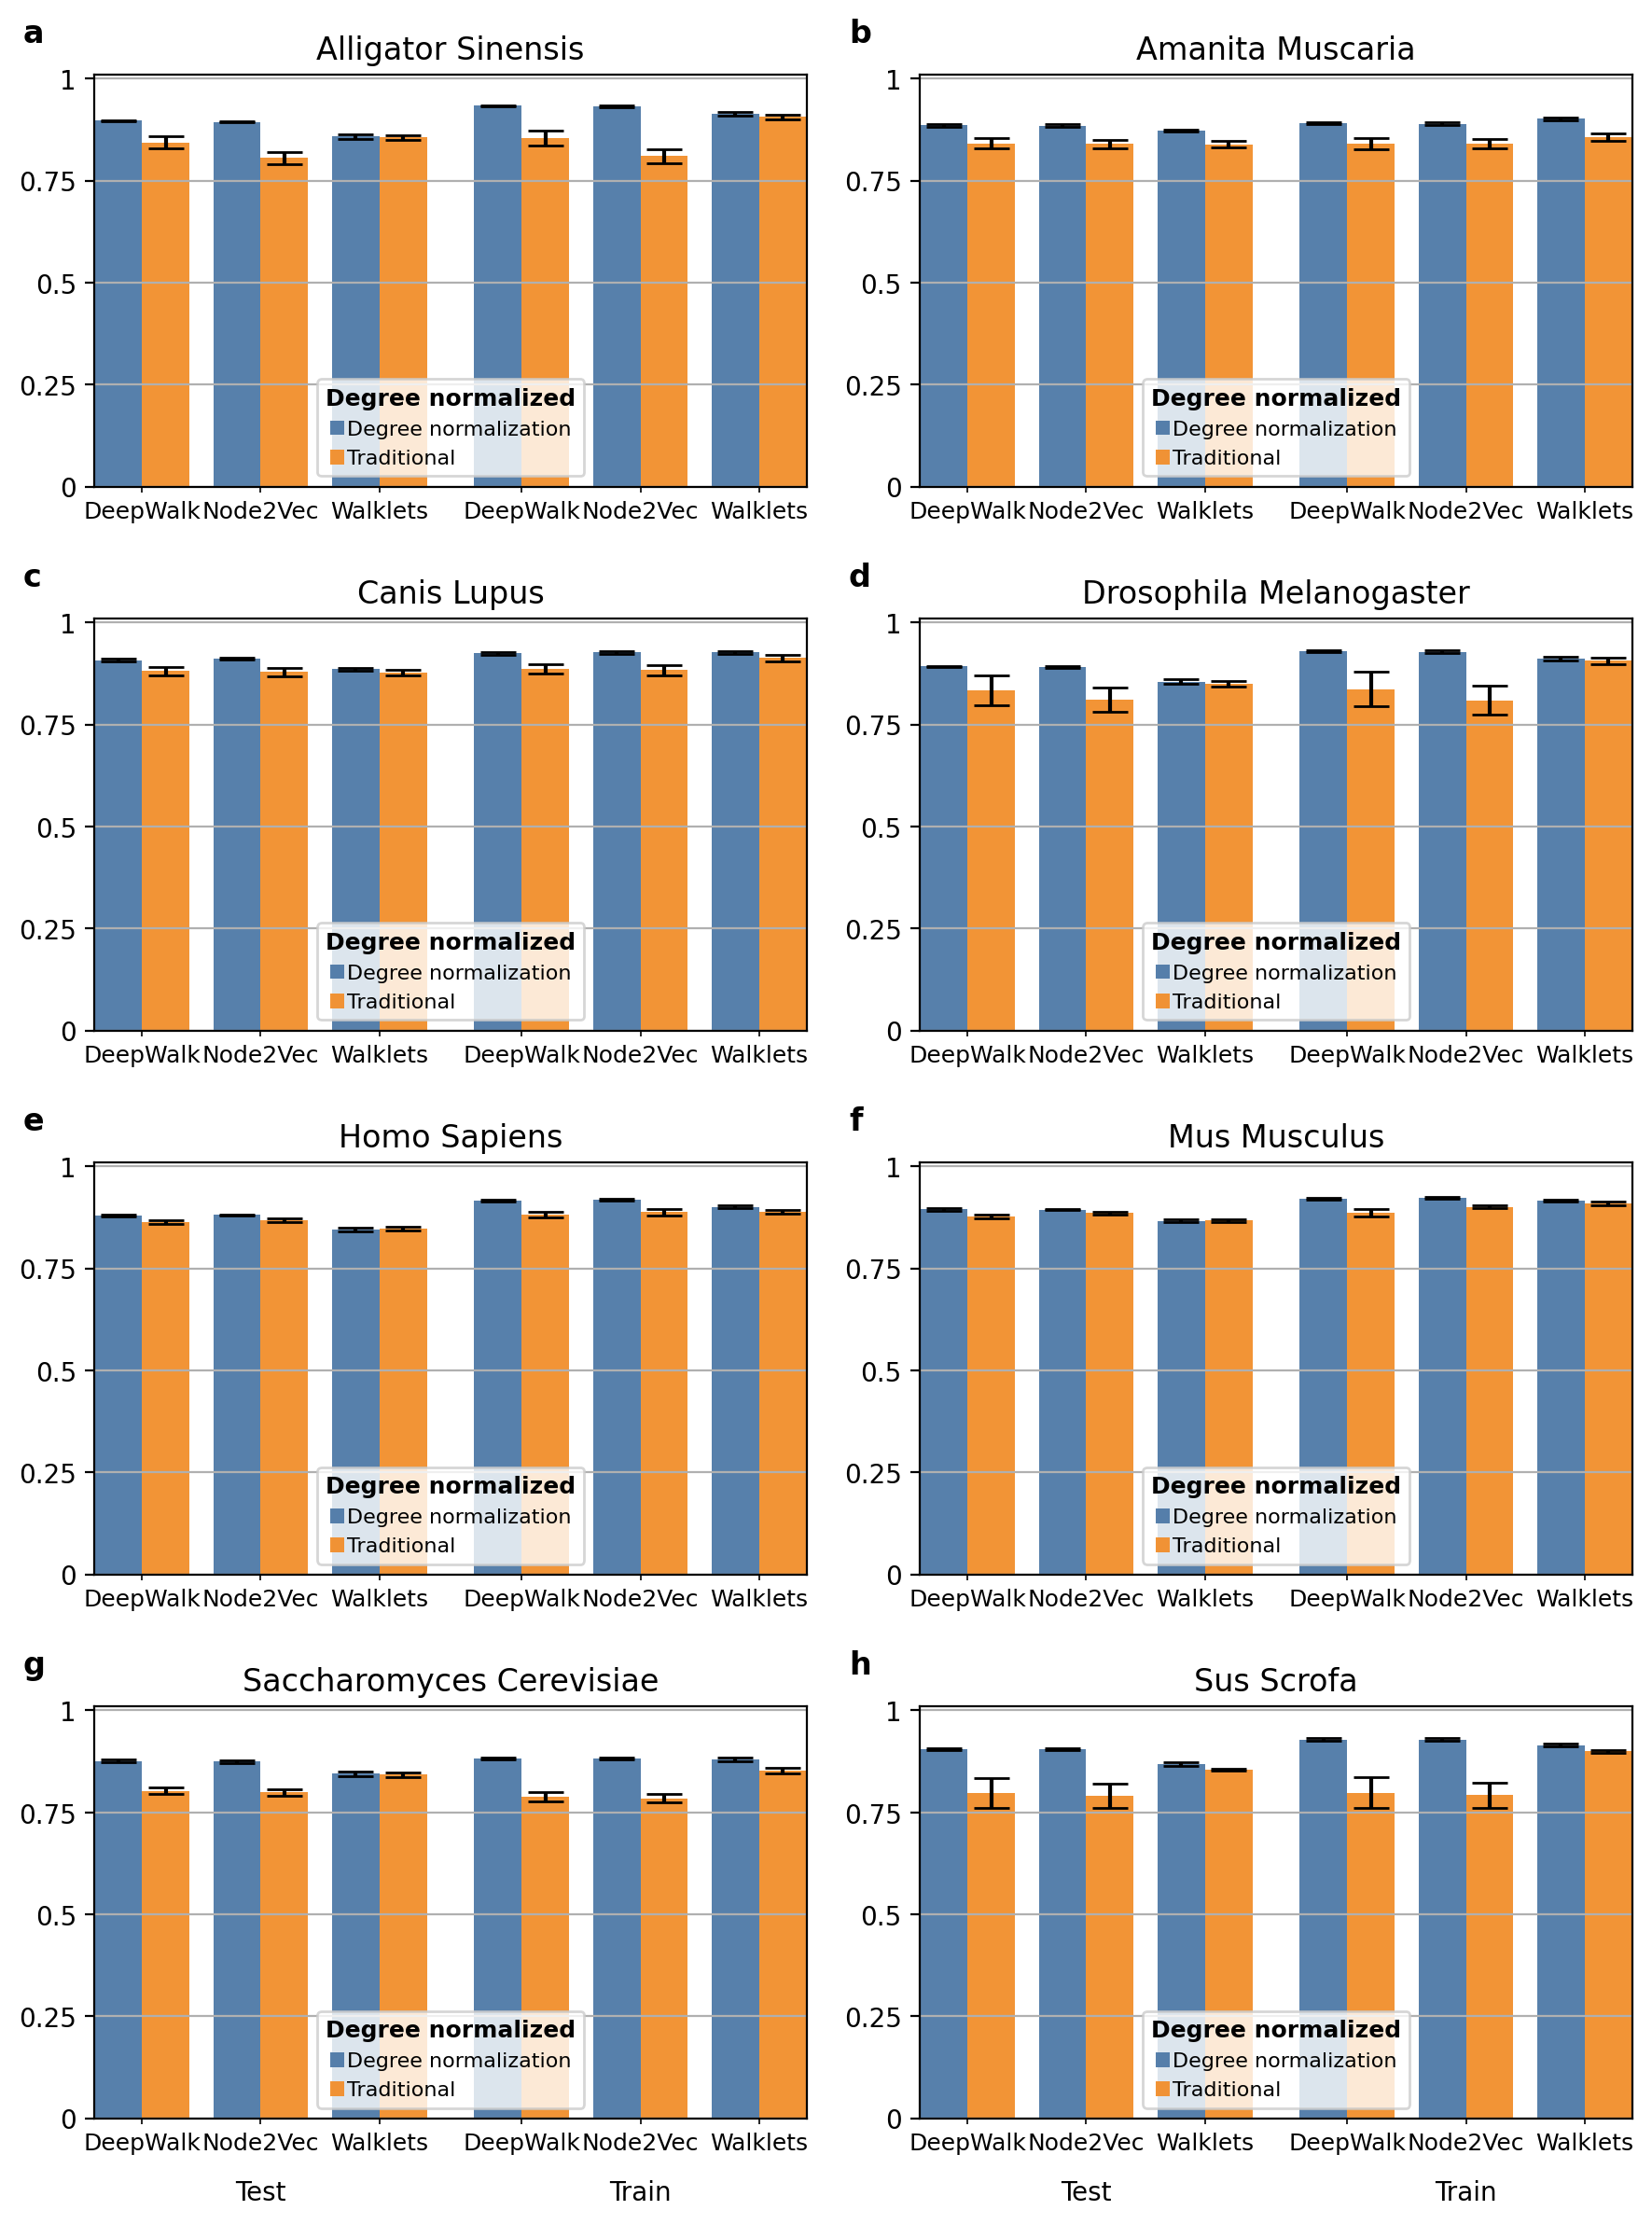

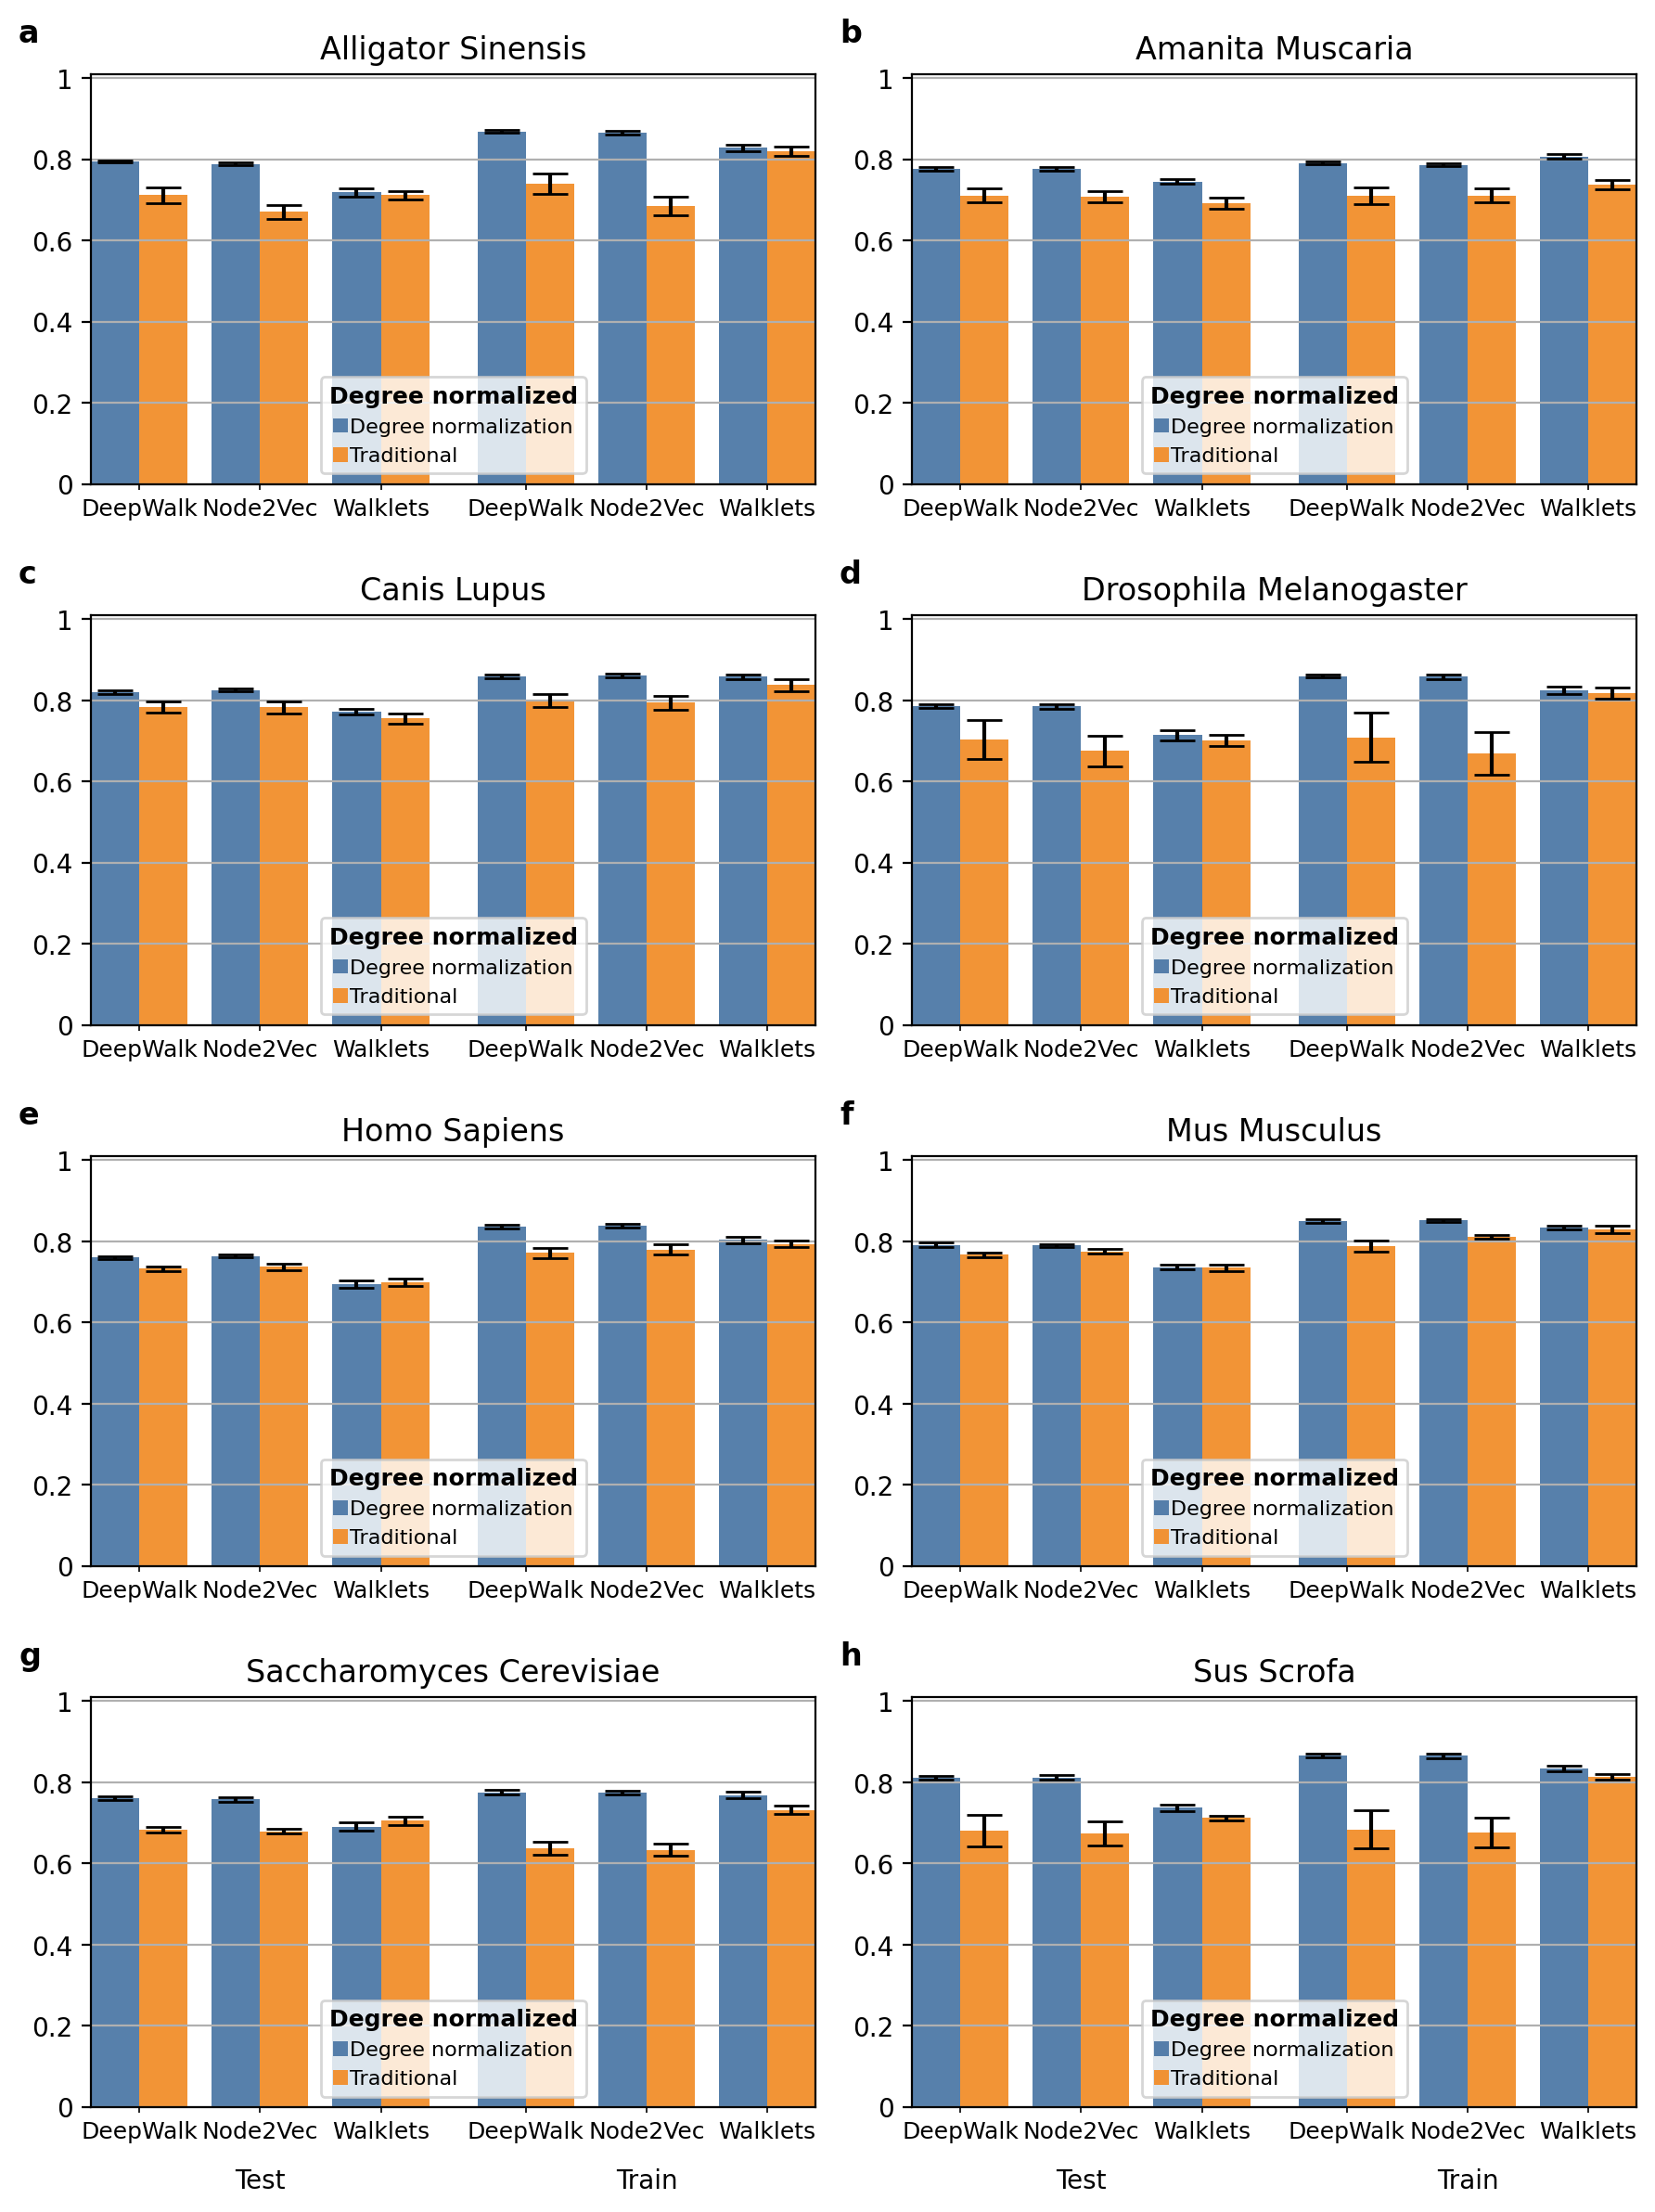

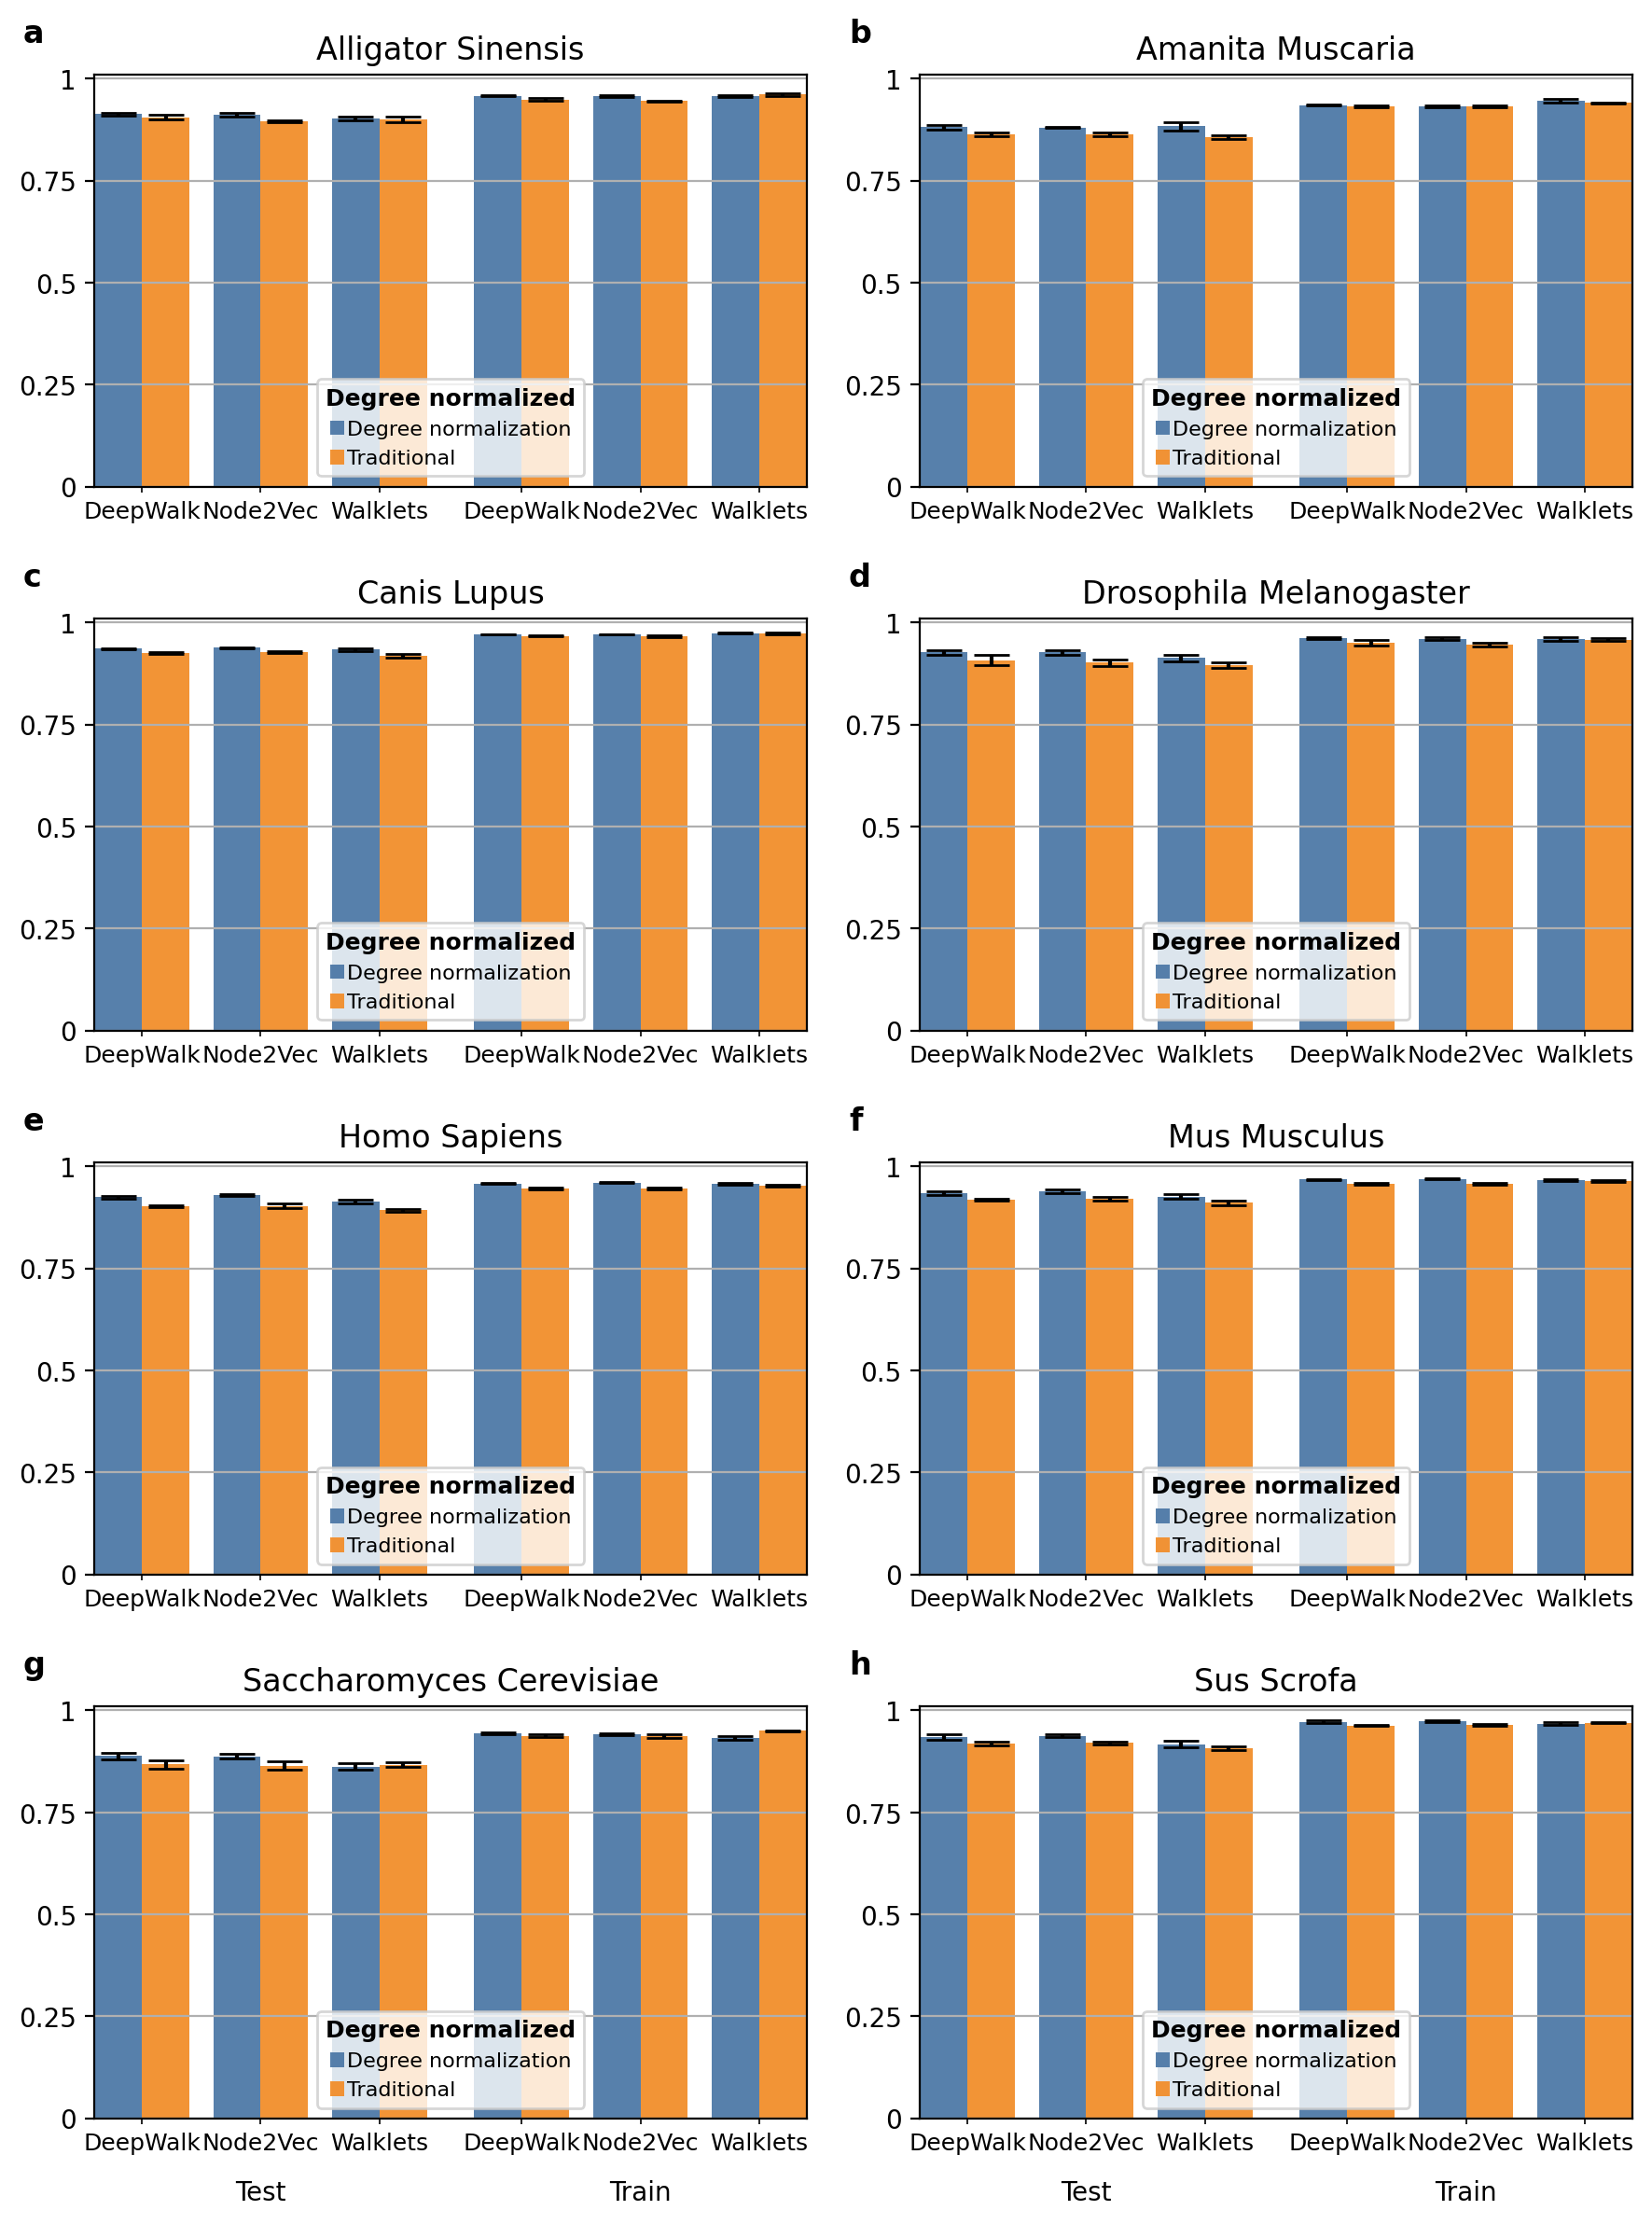

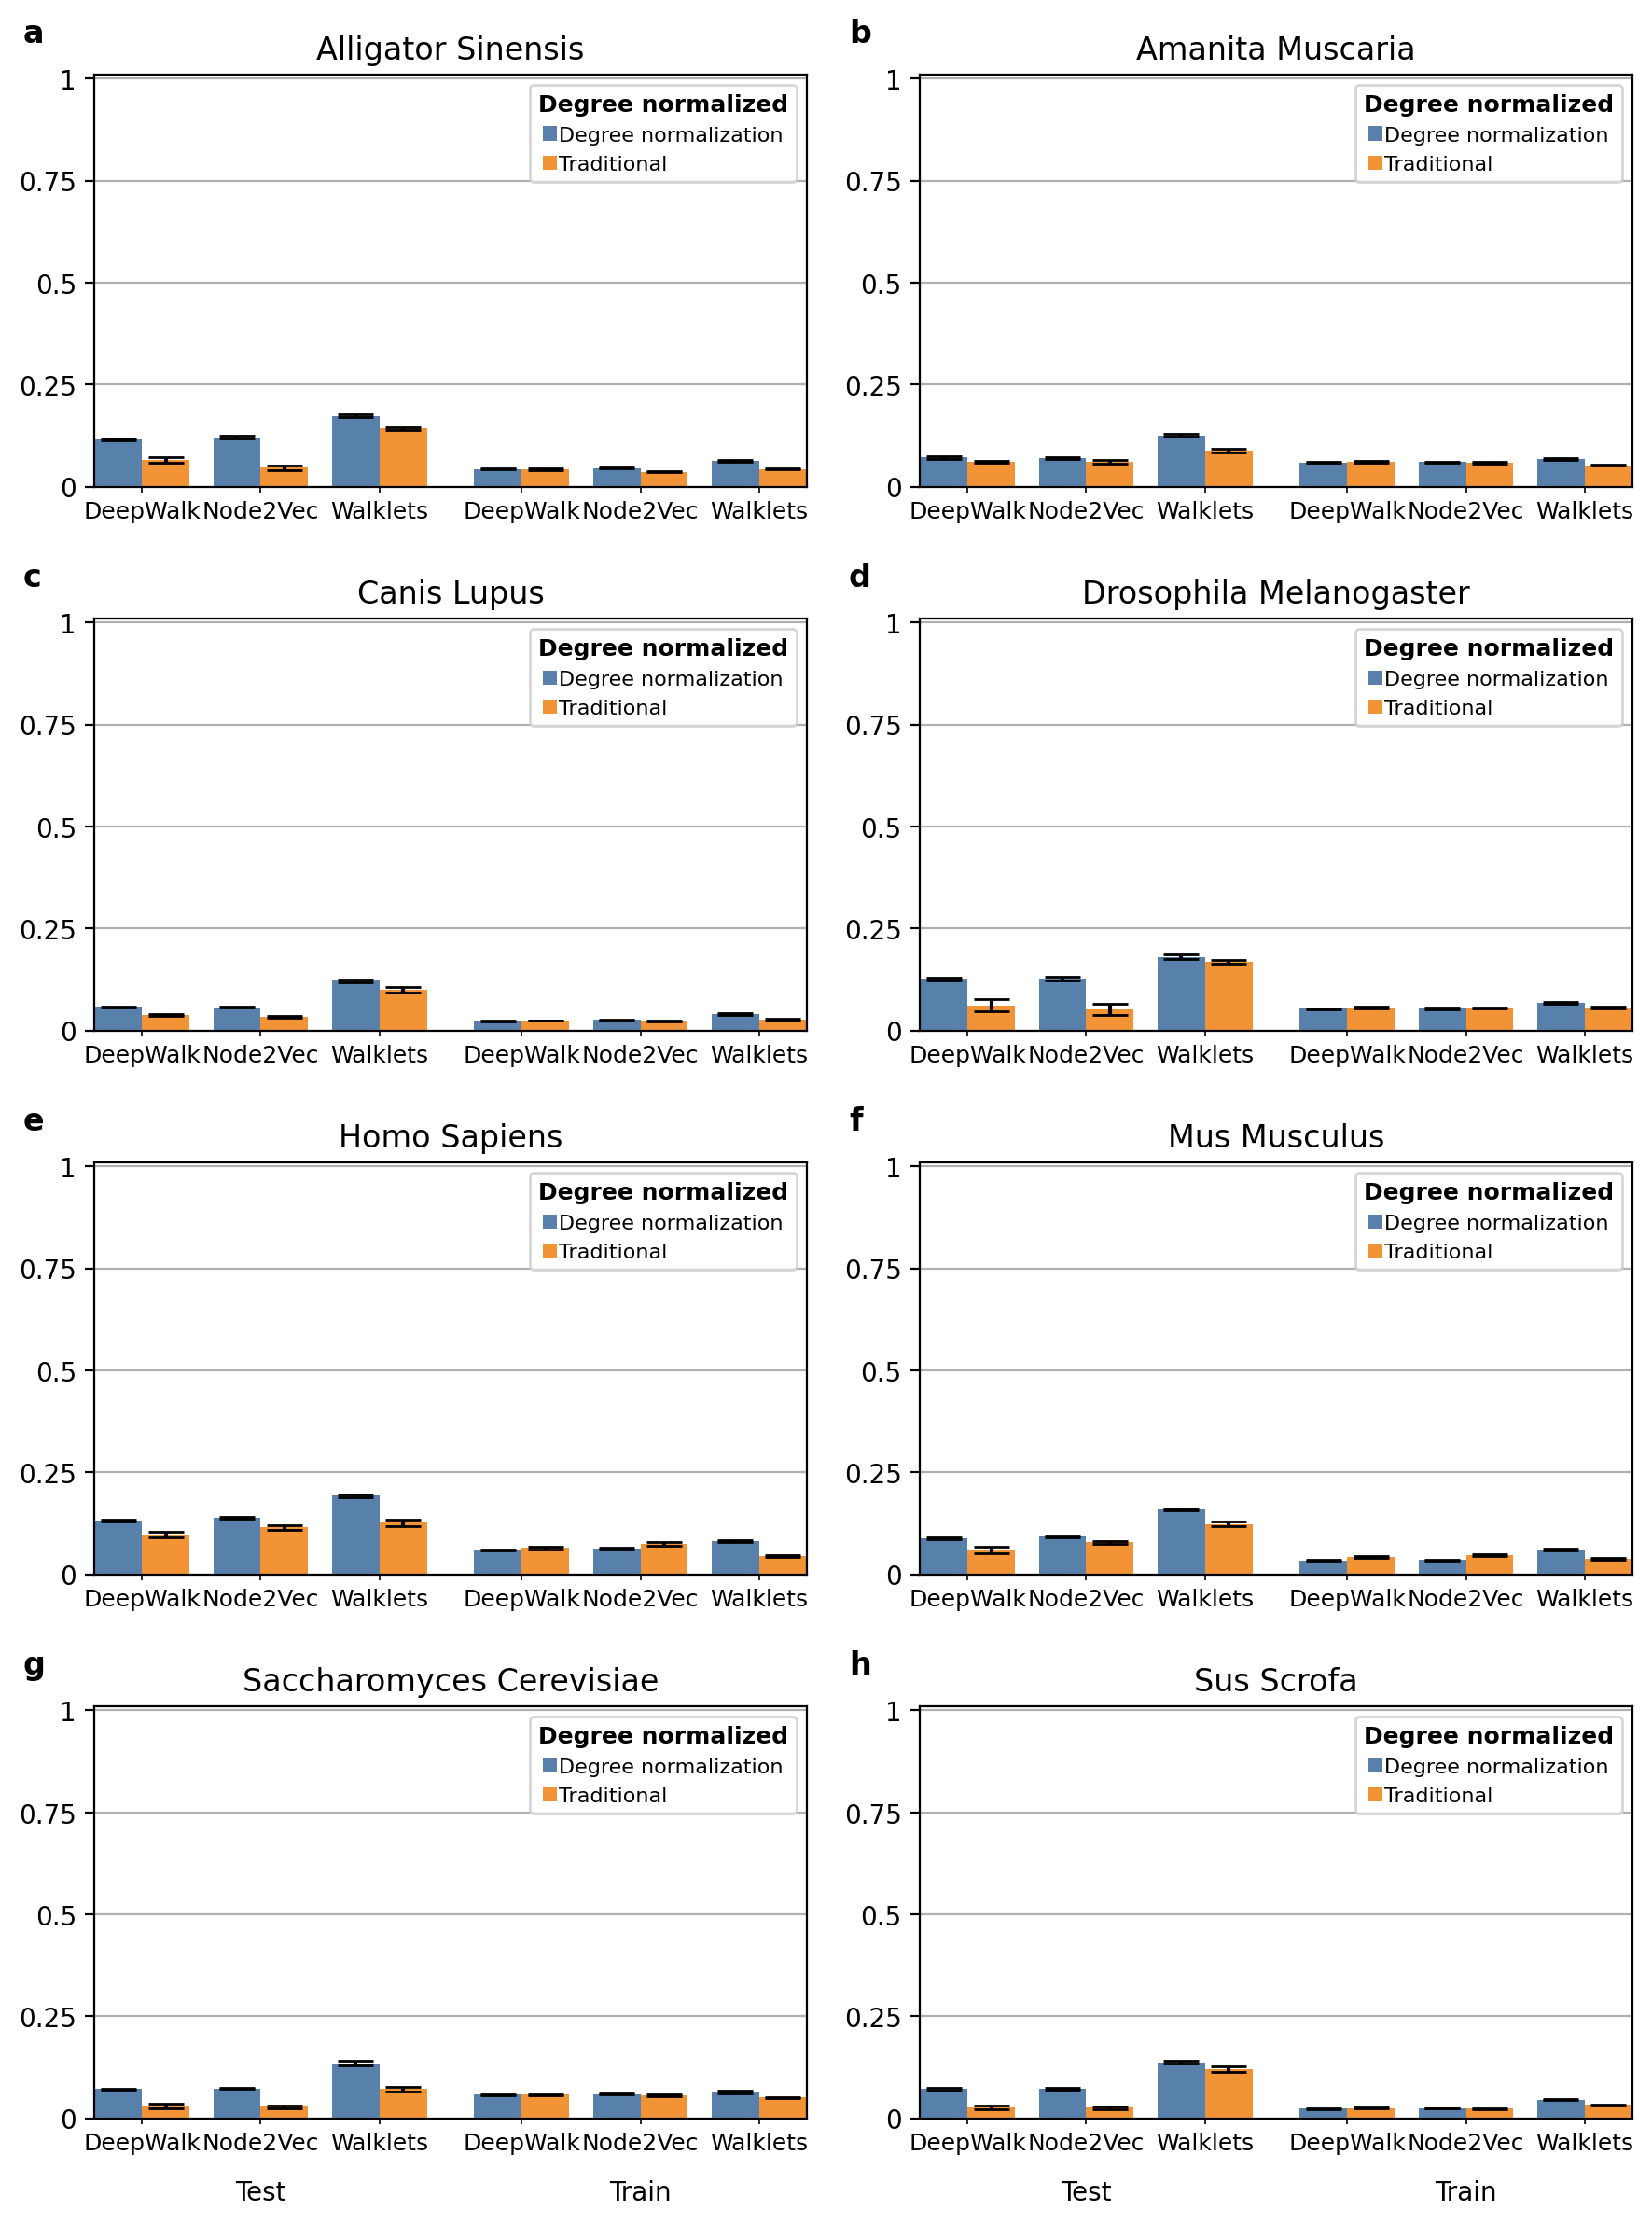

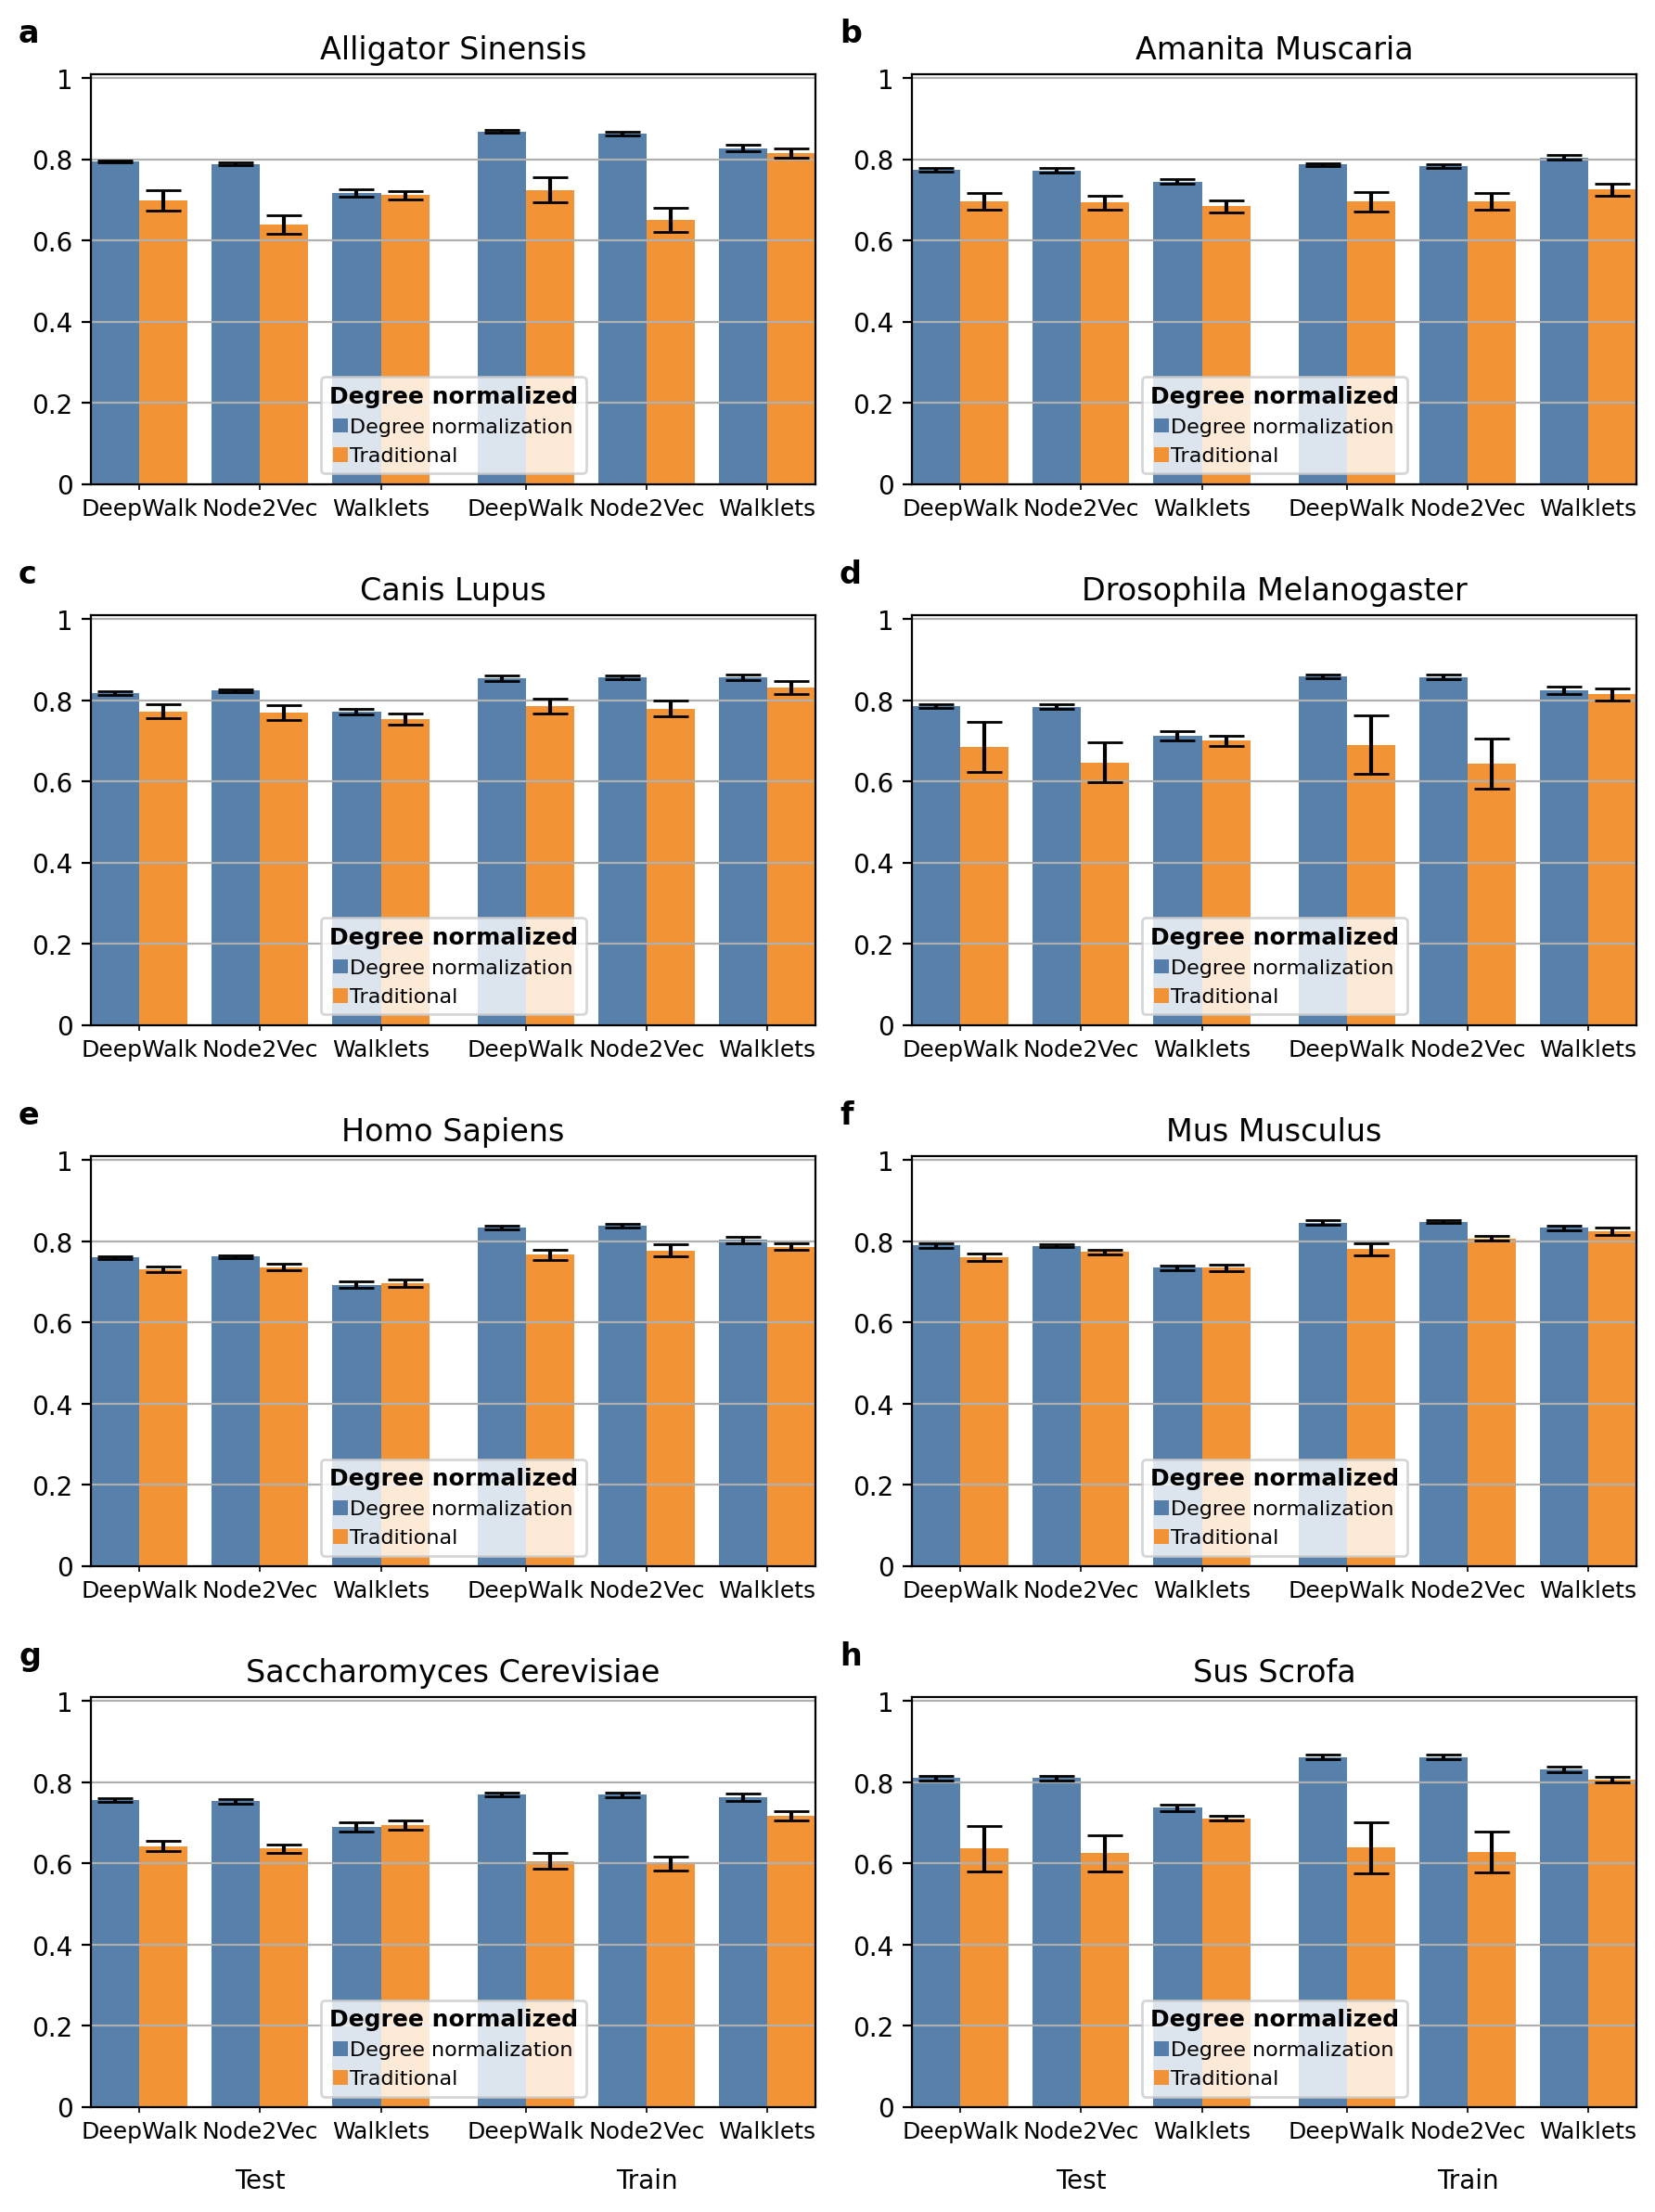

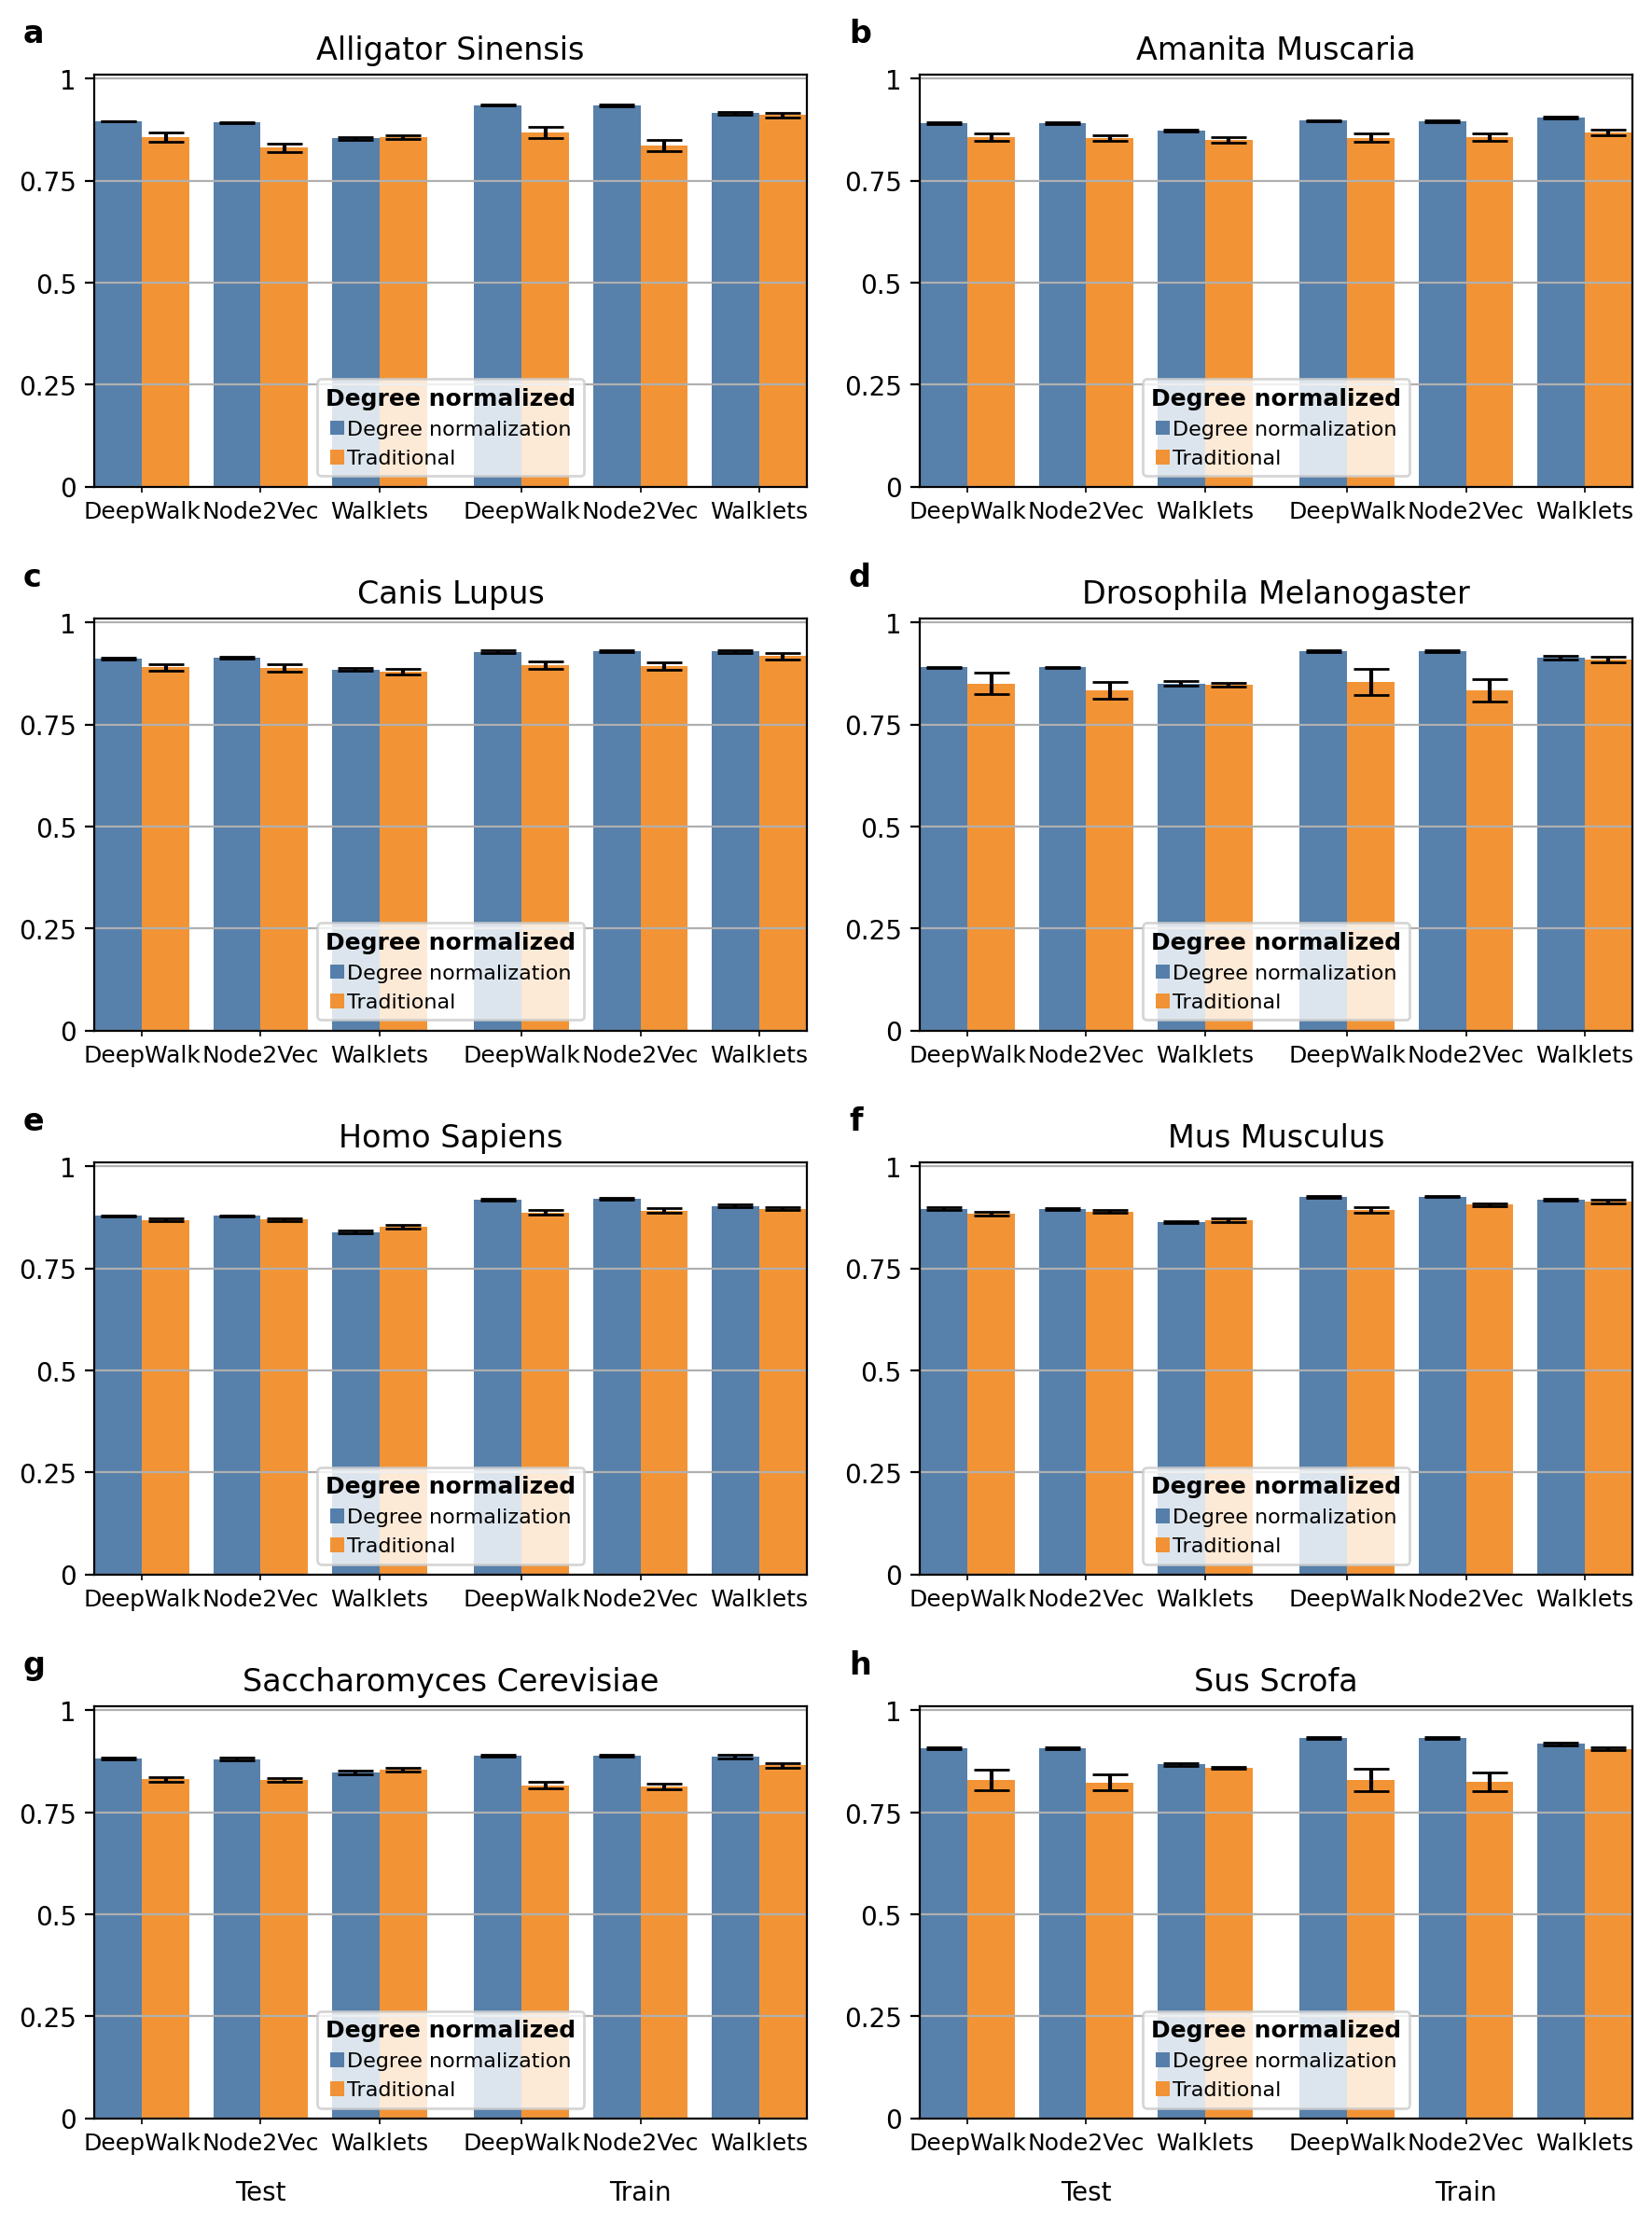

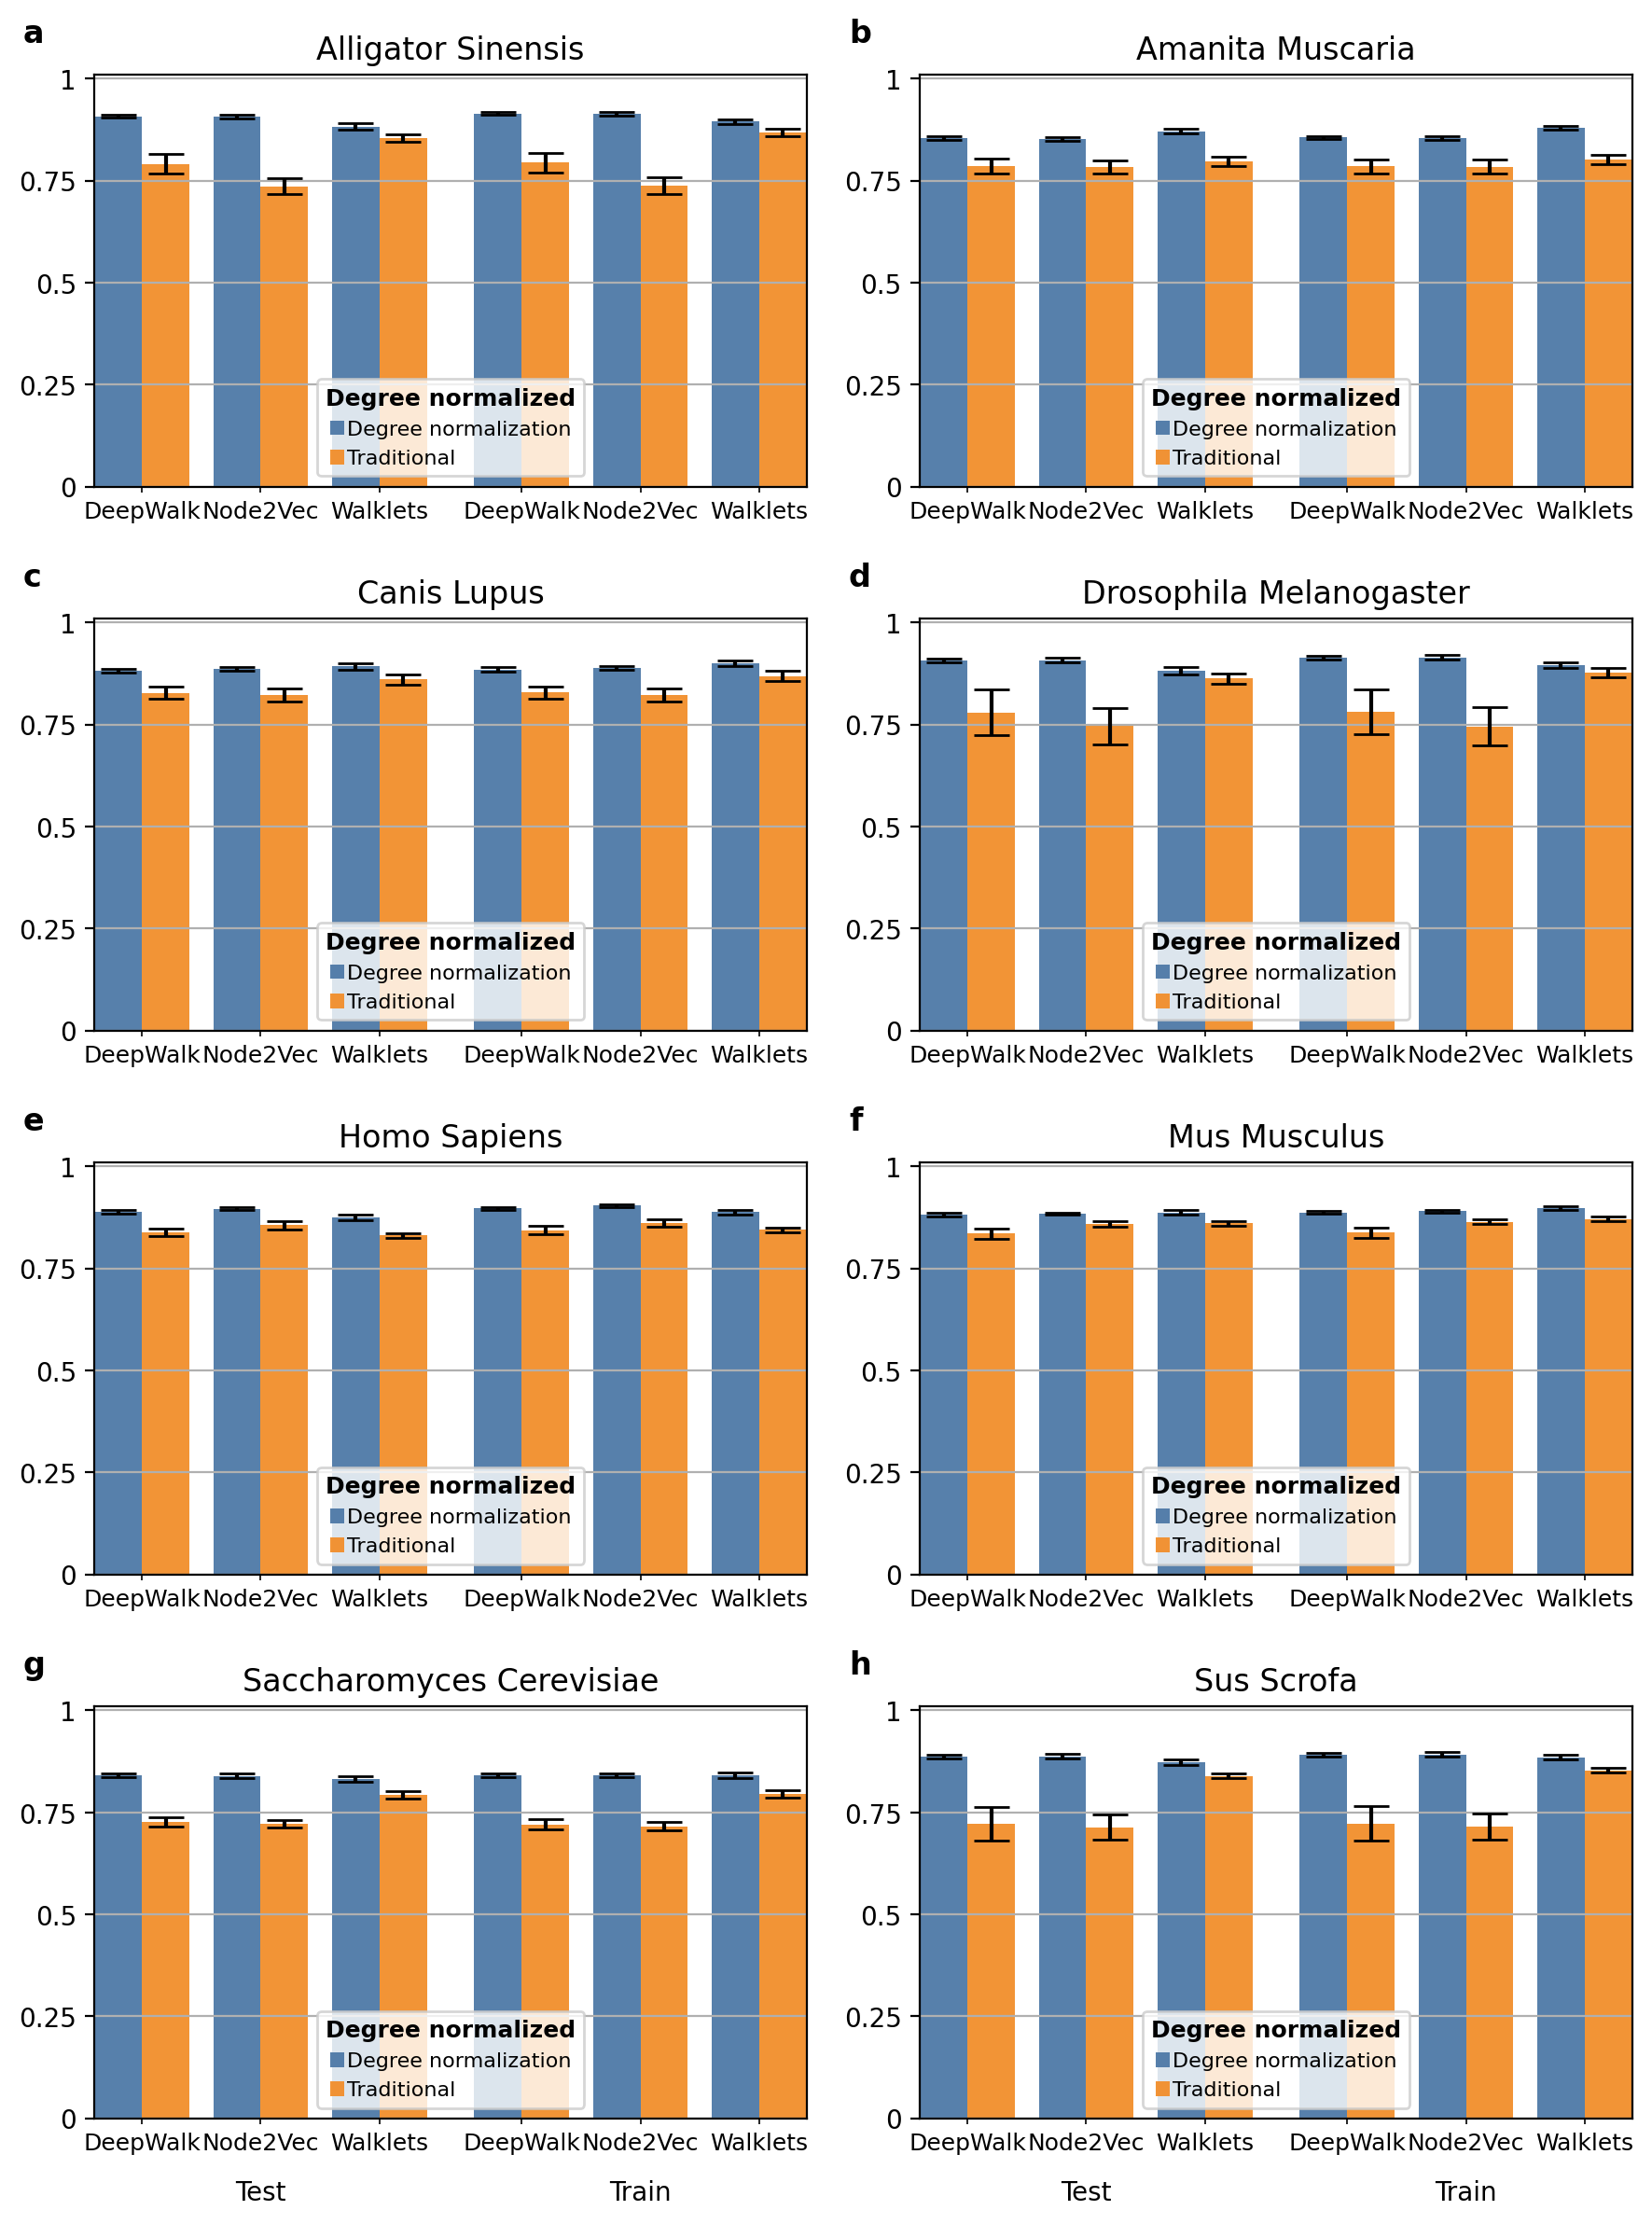

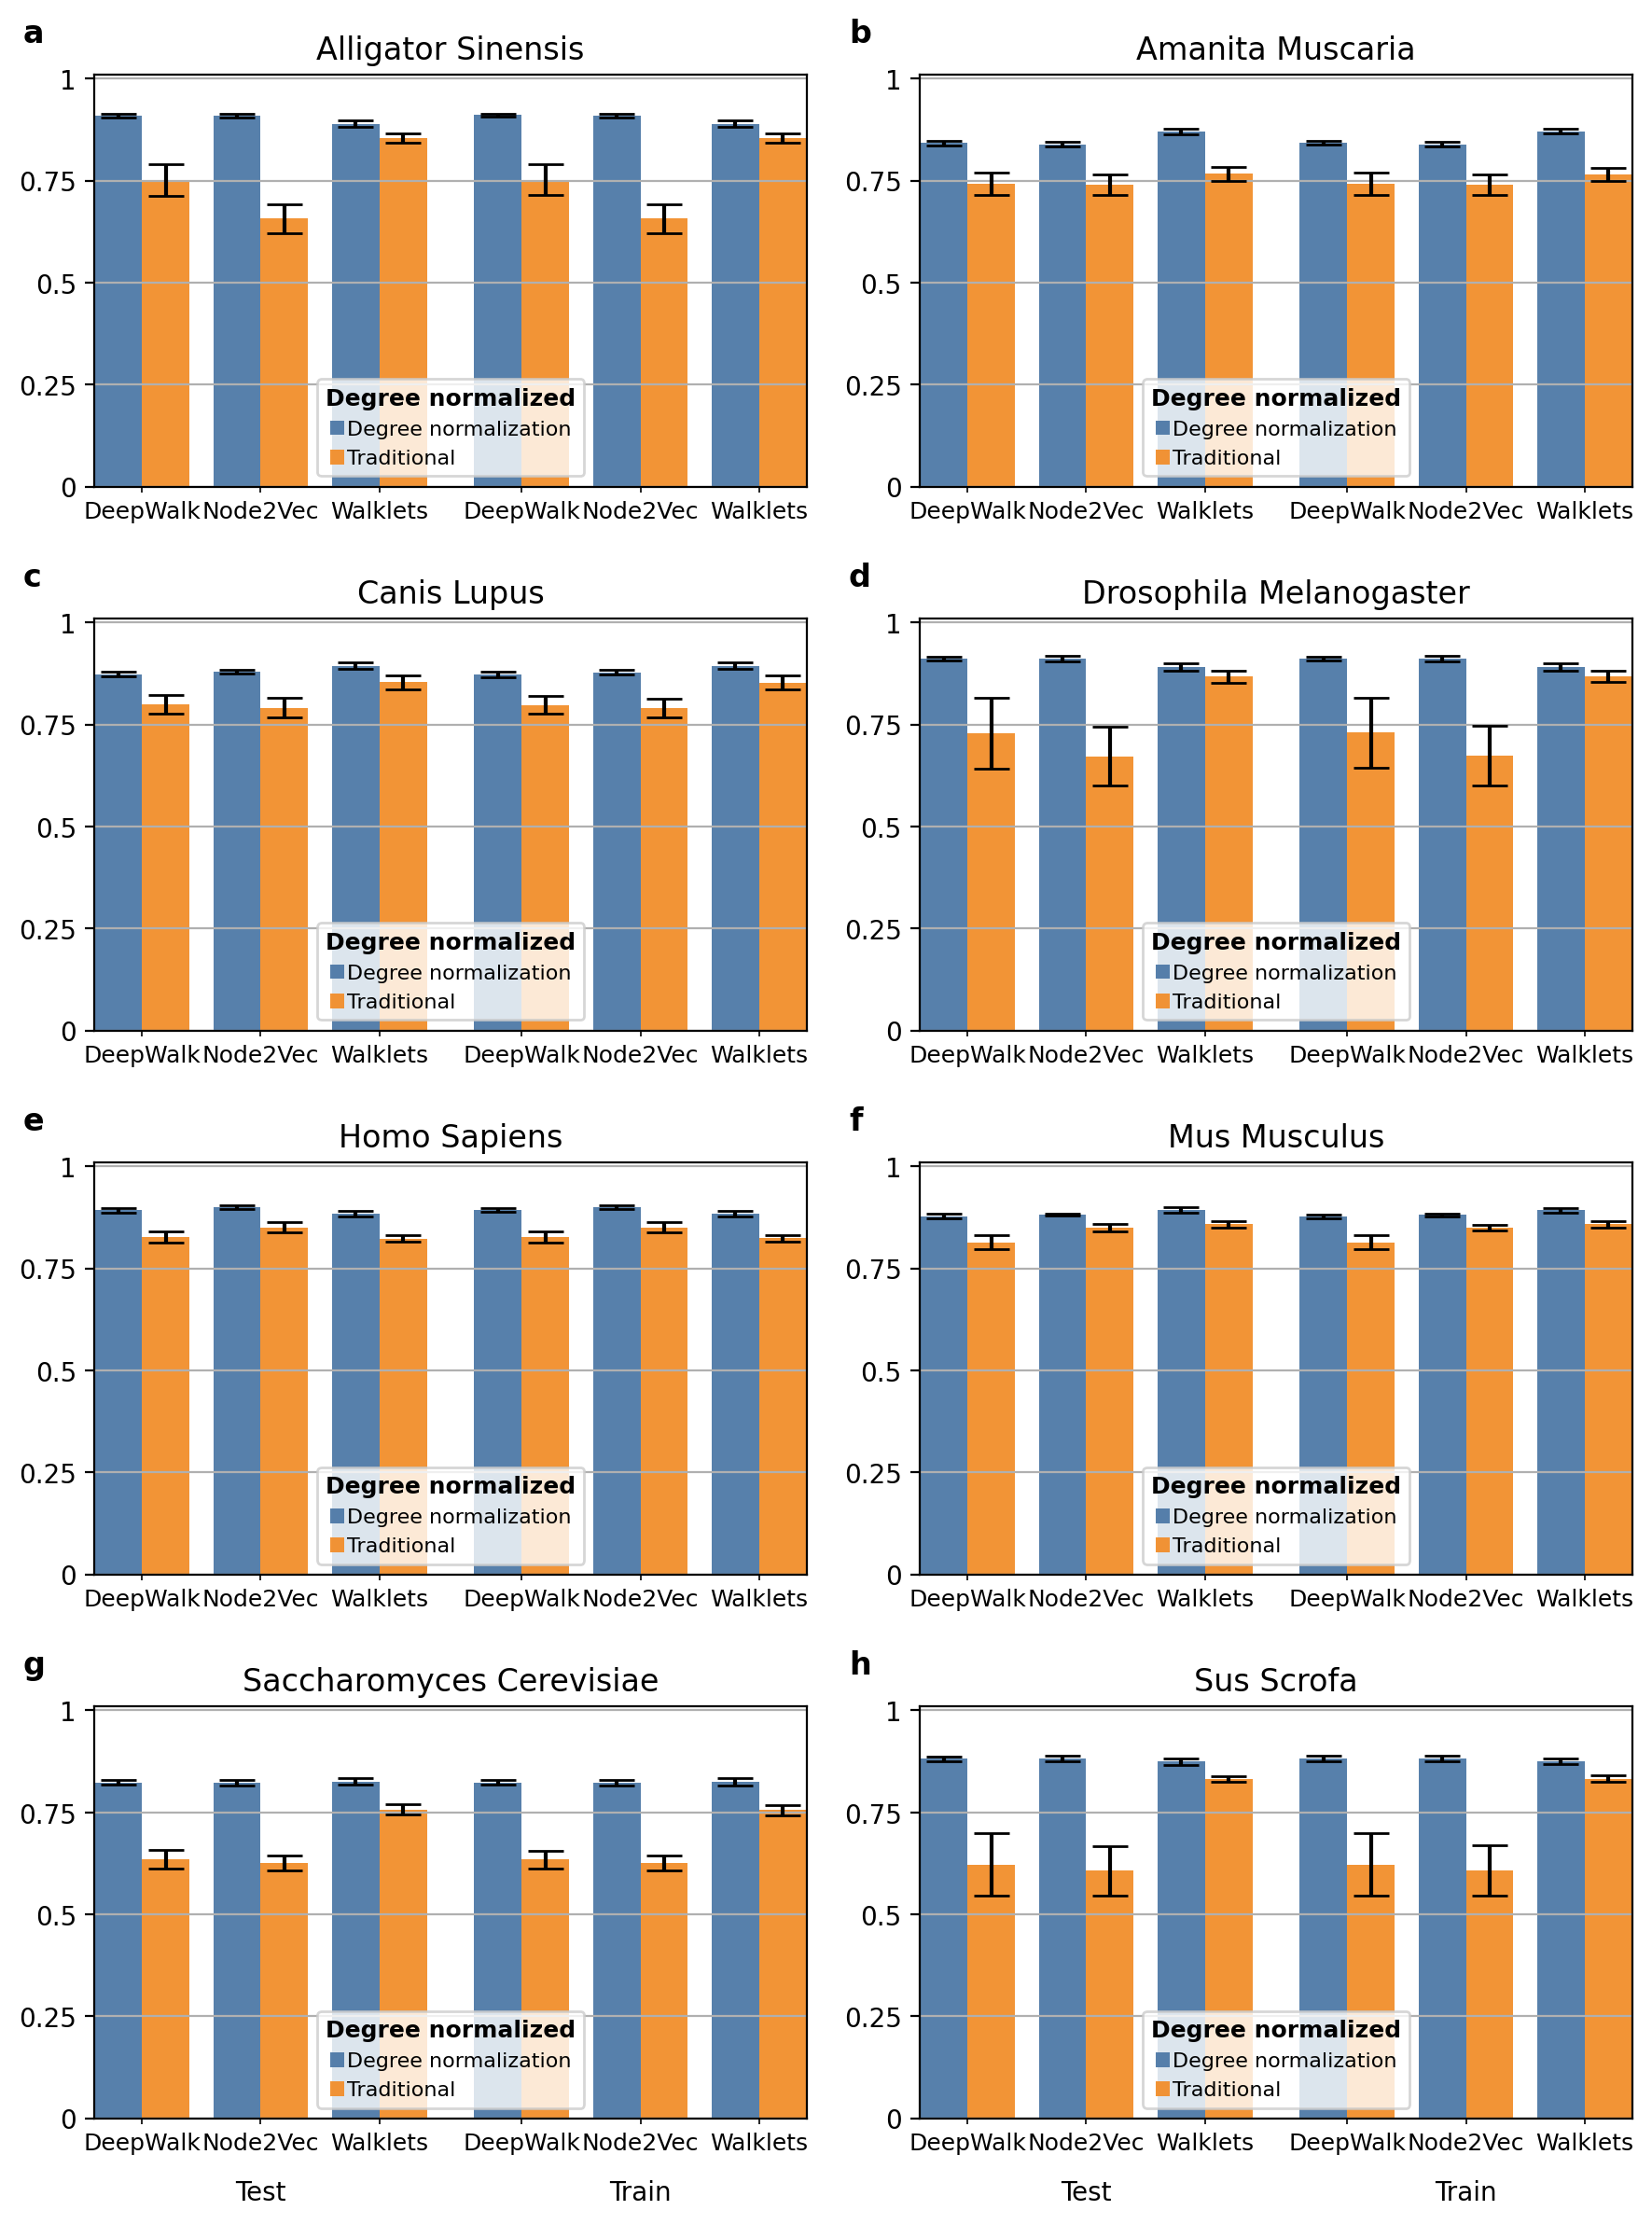

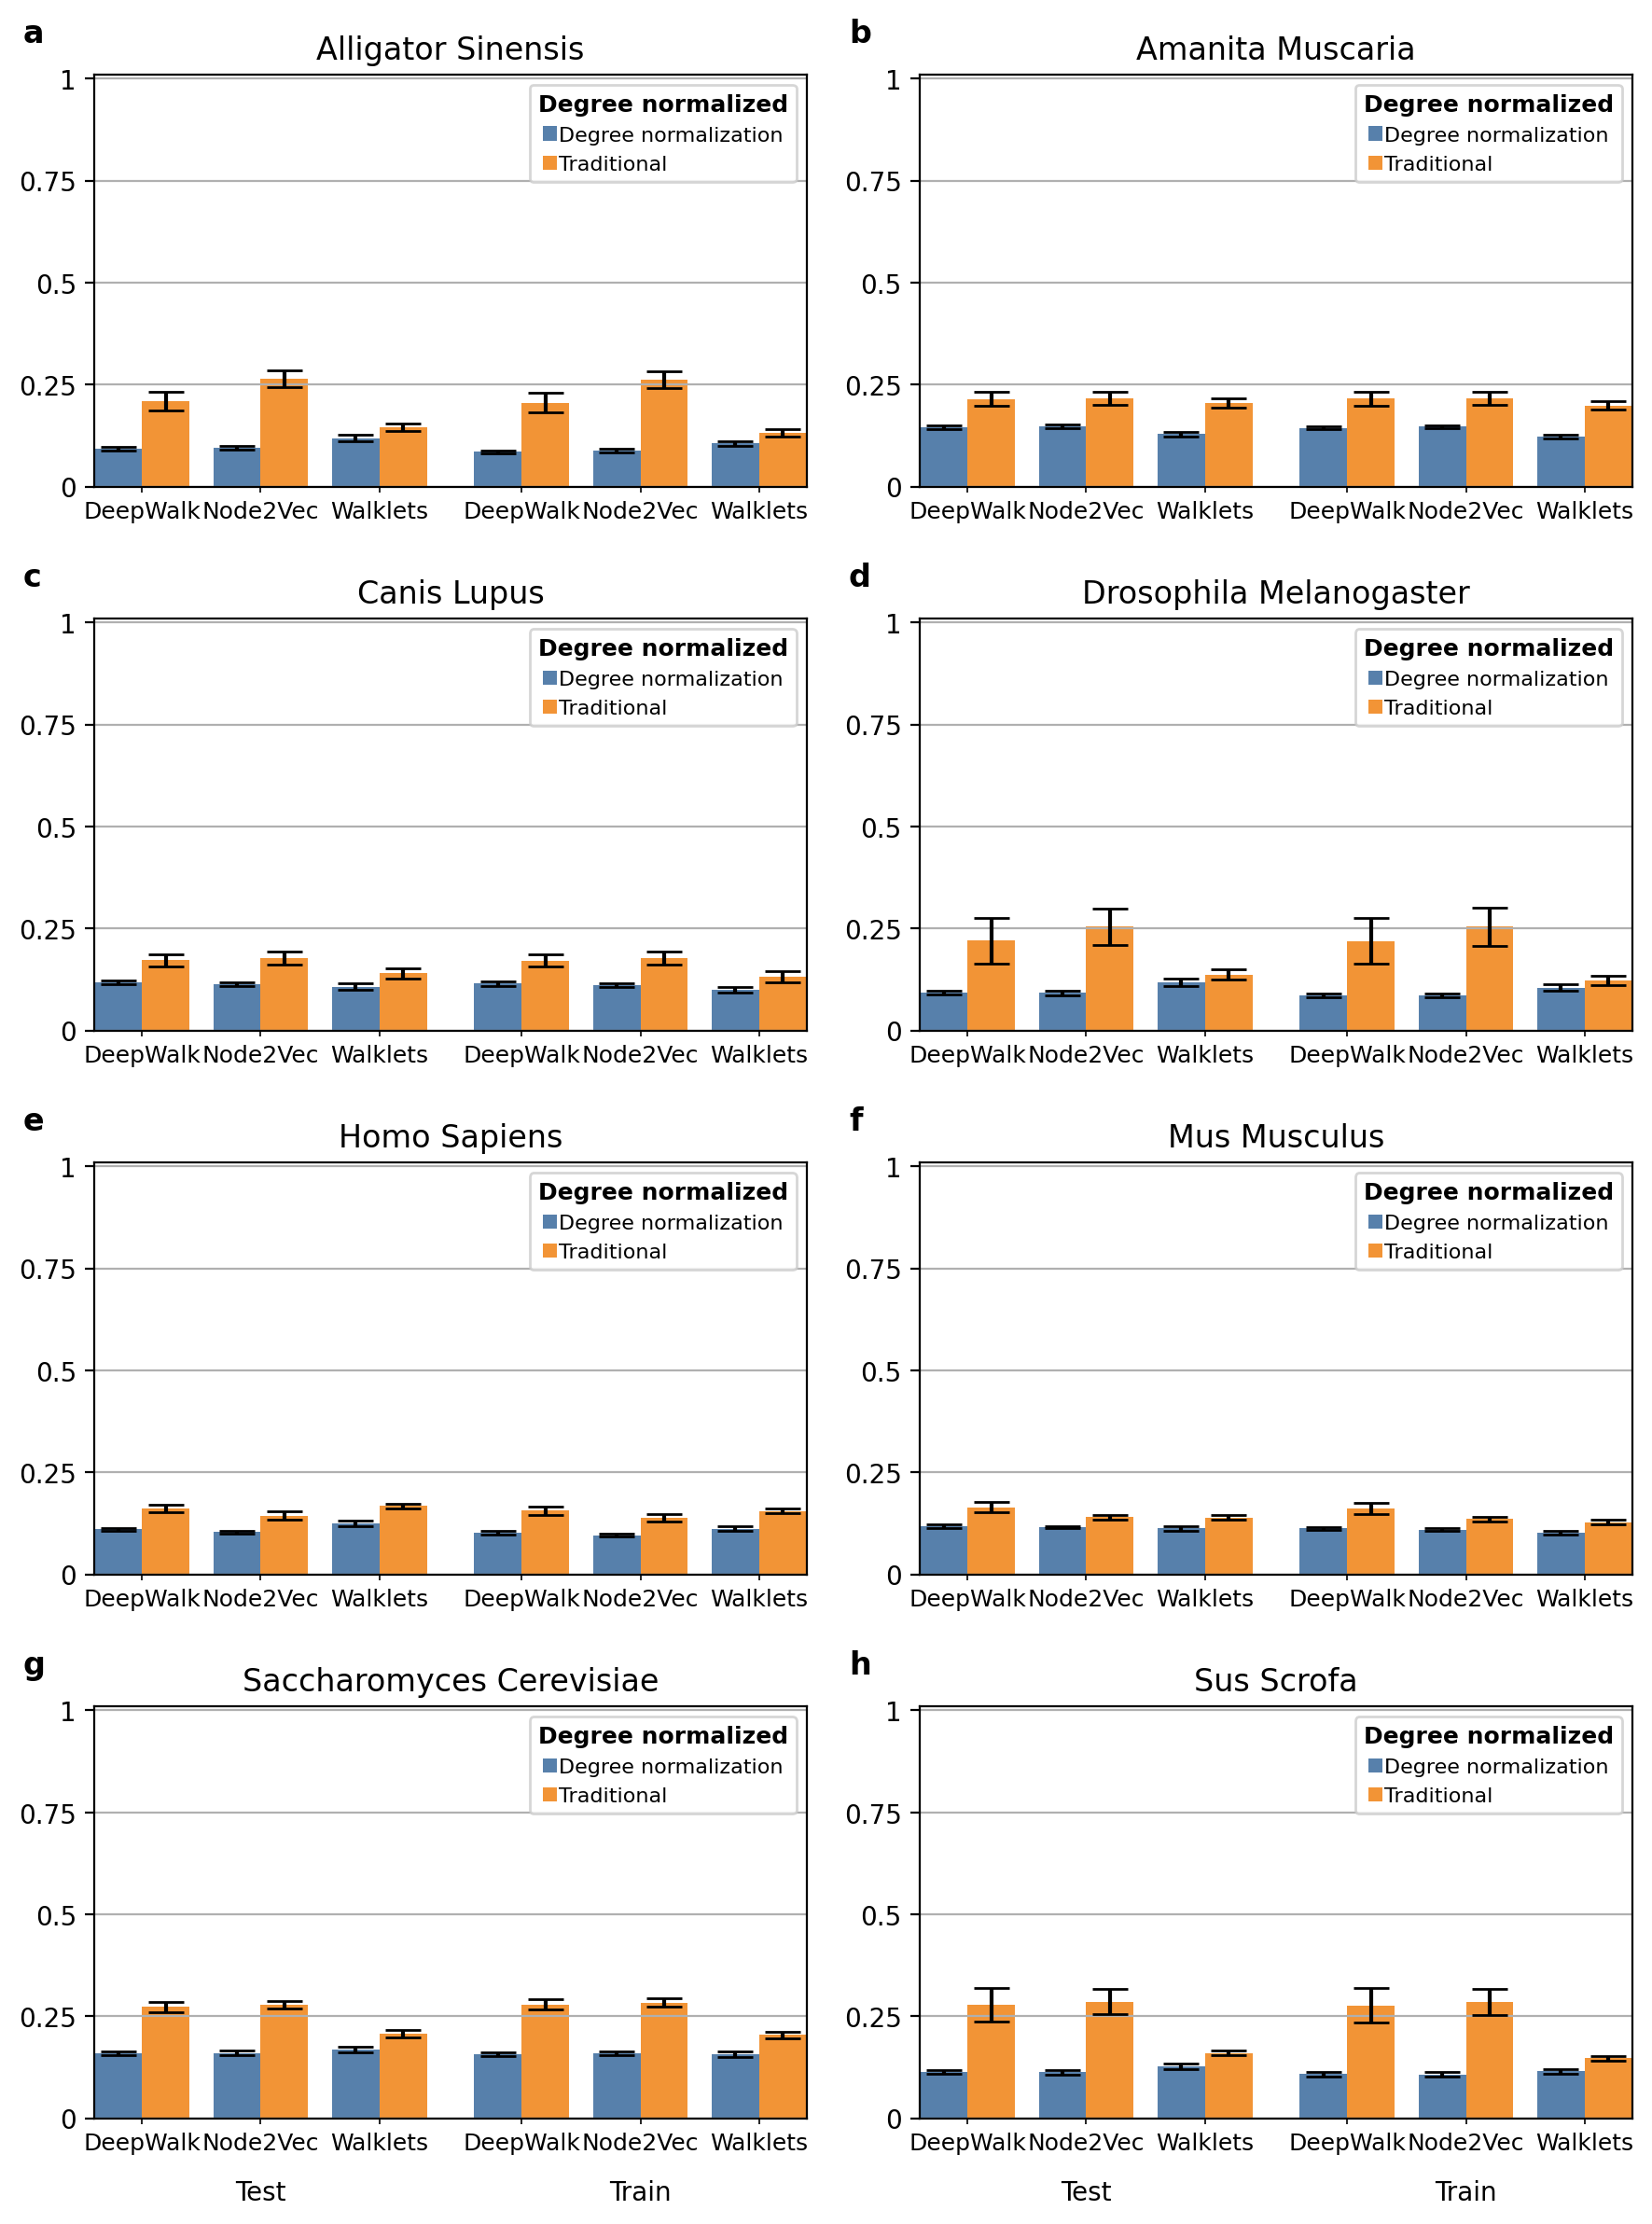

In [74]:
groupby=["graph_name", "evaluation_mode", "features_names", "degree_normalized"]

metrics = [
    column
    for column in df.columns
    if is_normalized_metric(column) or is_absolutely_normalized_metric(column)
]

graph_names = df["graph_name"].unique()

mapping = {
    "Walklets": "Walklets",
    "DeepWalk": "DW",
    "Node2Vec": "N2V"
}

df["FN"] = [
    mapping[feature]
    for feature in df["features_names"]
]

_ = barplots(
    df[[*groupby, *metrics]],
    groupby=groupby,
    height=3,
    #bar_width=0.2,
    space_width=0.15,
    minor_rotation=0,
    major_rotation=0,
    plots_per_row=2,
    letter_per_subplot="abcdefgh",
    show_column_name=False,
    #orientation="horizontal",
    unique_minor_labels=False,
    unique_major_labels=True
)

In [7]:
table = df.groupby(groupby).agg(["mean", "std"])[metrics]

latex_table = table.copy()

for metric in metrics:
    latex_table[f"{metric}.1"] = [
        r"\({:.2f} \pm {:.2f}\)".format(mean, std)
        for mean, std in zip(table[metric]["mean"], table[metric]["std"])
    ]
    

latex_table.drop(columns=metrics, inplace=True)
latex_table.columns = [
    sanitize_ml_labels(column[0].split(".")[0])
    for column in latex_table.columns
]

table

markedness  \
                                                                             mean   
evaluation_mode graph_name         features_names degree_normalized                 
test            Alligator Sinensis DeepWalk       Degree normalization   0.794129   
                                                  Traditional            0.711574   
                                   Node2Vec       Degree normalization   0.788714   
                                                  Traditional            0.670152   
                                   Walklets       Degree normalization   0.718393   
...                                                                           ...   
train           Sus Scrofa         DeepWalk       Traditional            0.683937   
                                   Node2Vec       Degree normalization   0.865519   
                                                  Traditional            0.676804   
                                   Walklets       Degree normalization   0.834863   
                                                  Traditional            0.813892   

                                                                                  \
                                                                             std   
evaluation_mode graph_name         features_names degree_normalized                
test            Alligator Sinensis DeepWalk       Degree normalization  0.002583   
                                                  Traditional           0.018718   
                                   Node2Vec       Degree normalization  0.003775   
                                                  Traditional           0.016650   
                                   Walklets       Degree normalization  0.010030   
...                                                                          ...   
train           Sus Scrofa         DeepWalk       Traditional           0.046857   
                                   Node2Vec       Degree normalization  0.005307   
                                                  Traditional           0.036811   
                                   Walklets       Degree normalization  0.006662   
                                                  Traditional           0.006252   

                                                                       informedness  \
                                                                               mean   
evaluation_mode graph_name         features_names degree_normalized                   
test            Alligator Sinensis DeepWalk       Degree normalization     0.793579   
                                                  Traditional              0.686614   
                                   Node2Vec       Degree normalization     0.787978   
                                                  Traditional              0.610320   
                                   Walklets       Degree normalization     0.715476   
...                                                                             ...   
train           Sus Scrofa         DeepWalk       Traditional              0.597346   
                                   Node2Vec       Degree normalization     0.857962   
                                                  Traditional              0.584363   
                                   Walklets       Degree normalization     0.829710   
                                                  Traditional              0.799355   

                                                                                  \
                                                                             std   
evaluation_mode graph_name         features_names degree_normalized                
test            Alligator Sinensis DeepWalk       Degree normalization  0.002380   
                                                  Traditional           0.030707   
                                   Node2Vec       Degree normali

In [8]:
normalized = latex_table.unstack(1).swaplevel(0,1,axis=1).unstack(-1).unstack(0)#.swaplevel(0,,axis=1).sort_index(axis=1)

In [9]:
graph_names = table.reset_index()["graph_name"].unique()
features_names = table.reset_index()["features_names"].unique()

In [10]:
def create_standardized_caption(
    metric_name: str,
    
):
    if should_be_maximized(metric_name):
        message = f"Higher values of {sanitize_ml_labels(metric_name)} are preferable."
    else:
        message = f"Lower values of {sanitize_ml_labels(metric_name)} are preferable."
    
    return 

In [11]:
table

markedness  \
                                                                             mean   
evaluation_mode graph_name         features_names degree_normalized                 
test            Alligator Sinensis DeepWalk       Degree normalization   0.794129   
                                                  Traditional            0.711574   
                                   Node2Vec       Degree normalization   0.788714   
                                                  Traditional            0.670152   
                                   Walklets       Degree normalization   0.718393   
...                                                                           ...   
train           Sus Scrofa         DeepWalk       Traditional            0.683937   
                                   Node2Vec       Degree normalization   0.865519   
                                                  Traditional            0.676804   
                                   Walklets       Degree normalization   0.834863   
                                                  Traditional            0.813892   

                                                                                  \
                                                                             std   
evaluation_mode graph_name         features_names degree_normalized                
test            Alligator Sinensis DeepWalk       Degree normalization  0.002583   
                                                  Traditional           0.018718   
                                   Node2Vec       Degree normalization  0.003775   
                                                  Traditional           0.016650   
                                   Walklets       Degree normalization  0.010030   
...                                                                          ...   
train           Sus Scrofa         DeepWalk       Traditional           0.046857   
                                   Node2Vec       Degree normalization  0.005307   
                                                  Traditional           0.036811   
                                   Walklets       Degree normalization  0.006662   
                                                  Traditional           0.006252   

                                                                       informedness  \
                                                                               mean   
evaluation_mode graph_name         features_names degree_normalized                   
test            Alligator Sinensis DeepWalk       Degree normalization     0.793579   
                                                  Traditional              0.686614   
                                   Node2Vec       Degree normalization     0.787978   
                                                  Traditional              0.610320   
                                   Walklets       Degree normalization     0.715476   
...                                                                             ...   
train           Sus Scrofa         DeepWalk       Traditional              0.597346   
                                   Node2Vec       Degree normalization     0.857962   
                                                  Traditional              0.584363   
                                   Walklets       Degree normalization     0.829710   
                                                  Traditional              0.799355   

                                                                                  \
                                                                             std   
evaluation_mode graph_name         features_names degree_normalized                
test            Alligator Sinensis DeepWalk       Degree normalization  0.002380   
                                                  Traditional           0.030707   
                                   Node2Vec       Degree normali

In [21]:
first = True
for graph_name in graph_names:
    if not first:
        print(r"\clearpage")
    first = False
    print(fr"\subsection{{Performance on graph {graph_name}}}")
    
    labels = [
        fr"\ref{{tab:app:performance_{metric.replace(' ', '_')}_{graph_name.replace(' ', '_')}}}"
        for metric in metrics
    ]
    
    all_labels_but_last = ", ".join(labels)

    print(
        "In this section, we present the performance results "
        "of our proposed degree normalized embeddings on "
        f"the {graph_name} graph. We compare the performance "
        "of our proposed method with the traditional approach "
        "using three different embedding methods: DeepWalk, Node2Vec and Walklets. "
        "We report the performance results in terms of F1 Score, AUPRC, and many other "
        "evaluation metrics."
        f"The results are presented in tables {all_labels_but_last}, and {labels[-1]}. "
        "The tables provide the mean and standard deviation of the performance metrics "
        "for both the test and train sets, averaged across \(10\) holdouts."
    ) 
    for metric in metrics:
        norm_metric = sanitize_ml_labels(metric)
        print(r"\begin{table}")
        print(r"\centering")
        print(r"\footnotesize")
        print(normalized[graph_name][norm_metric].to_latex(
            float_format="%.2f"
        ).replace("\\textbackslash pm", r"\pm")\
              .replace("\_", " ")\
              .replace(r"\textbackslash )", r"\)")\
              .replace(r"\textbackslash (", r"\(")\
              .replace(r"lllll", "ccccc")\
              .replace(r"{2}{l}", "{2}{c}")\
              .replace(r"degree normalized", "")\
              .replace(r"evaluation mode", "")\
              .replace("0.00", "0"), end="")
        
        if should_be_maximized(metric):
            min_max_message = f"Higher values of {sanitize_ml_labels(metric)} are preferable."
        else:
            min_max_message = f"Lower values of {sanitize_ml_labels(metric)} are preferable."
        
        model_messages = []
        
        for features_name in features_names:
            mean_norm = table[(metric, 'mean')].loc[("test", graph_name, features_name, "Degree normalization")]
            std_norm = table[(metric, 'std')].loc[("test", graph_name, features_name, "Degree normalization")]
        
            mean_trad = table[(metric, 'mean')].loc[("test", graph_name, features_name, "Traditional")]
            std_trad = table[(metric, 'std')].loc[("test", graph_name, features_name, "Traditional")]
            
            improvement = np.abs((mean_norm - mean_trad) * 100)
            
            if should_be_maximized(metric):
                if mean_norm - std_norm > mean_trad + std_trad:
                    model_messages.append(
                        f"The degree normalized version of {features_name} "
                        fr"\textbf{{shows}} a statistically significant improvement in "
                        f"performance in respect to the traditional approach. "
                        fr"Specifically, the absolute improvements of {features_name} performance is of \({improvement:.2f}\%\)."
                    )
                elif mean_norm + std_norm < mean_trad - std_trad:
                    model_messages.append(
                        f"The degree normalized version of {features_name} "
                        fr"\textbf{{shows}} a statistically significant worsening in "
                        f"performance in respect to the traditional approach. "
                        fr"Specifically, the absolute worsening of {features_name} performance is of \({improvement:.2f}\%\)."
                    )
                else:
                    model_messages.append(
                        f"The degree normalized version of {features_name} "
                        fr"\textbf{{does not show}} a statistically significant improvement in "
                        f"performance in respect to the traditional approach."
                    )
            else:
                if mean_norm + std_norm > mean_trad - std_trad:
                    model_messages.append(
                        f"The degree normalized version of {features_name} "
                        fr"\textbf{{does not show}} a statistically significant improvement in "
                        f"performance in respect to the traditional approach."
                    )
                elif mean_norm - std_norm > mean_trad + std_trad:
                    model_messages.append(
                        f"The degree normalized version of {features_name} "
                        fr"\textbf{{shows}} a statistically significant worsening in "
                        f"performance in respect to the traditional approach. "
                        fr"Specifically, the absolute worsening of {features_name} performance is of \({improvement:.2f}\%\)."
                    )
                else:
                    model_messages.append(
                        f"The degree normalized version of {features_name} "
                        fr"\textbf{{shows}} a statistically significant improvement in "
                        f"performance in respect to the traditional approach. "
                        fr"Specifically, the absolute improvements of {features_name} performance is of \({improvement:.2f}\%\)."
                    )
            
        model_messages = " ".join(model_messages)
        
        print(
            fr"\caption{{\textbf{{{norm_metric} performance on graph {graph_name}:}}"
            " the table illustrates the performance of the degree normalized and "
            "traditional embeddings on the test and train sets, for the three "
            "different embedding methods: DeepWalk, Node2Vec and Walklets. "
            f"{model_messages} "
            f"{min_max_message}"
            "}"
        )
        print(fr"\label{{tab:app:performance_{metric.replace(' ', '_')}_{graph_name.replace(' ', '_')}}}")
        print(r"\end{table}")
        print("")

\subsection{Performance on graph Alligator Sinensis}
In this section, we present the performance results of our proposed degree normalized embeddings on the Alligator Sinensis graph. We compare the performance of our proposed method with the traditional approach using three different embedding methods: DeepWalk, Node2Vec and Walklets. We report the performance results in terms of F1 Score, AUPRC, and many other evaluation metrics.The results are presented in tables \ref{tab:app:performance_markedness_Alligator_Sinensis}, \ref{tab:app:performance_informedness_Alligator_Sinensis}, \ref{tab:app:performance_false_discovery_rate_Alligator_Sinensis}, \ref{tab:app:performance_specificity_Alligator_Sinensis}, \ref{tab:app:performance_fowlkes_mallows_index_Alligator_Sinensis}, \ref{tab:app:performance_fall_out_Alligator_Sinensis}, \ref{tab:app:performance_miss_rate_Alligator_Sinensis}, \ref{tab:app:performance_balanced_accuracy_Alligator_Sinensis}, \ref{tab:app:performance_prevalence_threshold_

\caption{\textbf{Precision performance on graph Alligator Sinensis:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(11.63\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(17.02\%\). The degree normalized version of Walklets \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Walklets performance is of \(2.72\%\). Higher values of Precision are pr

\caption{\textbf{Informedness performance on graph Amanita Muscaria:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(8.83\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(9.05\%\). The degree normalized version of Walklets \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Walklets performance is of \(6.78\%\). Higher values of Informedness are 

\begin{tabular}{ccccc}
\toprule
 & \multicolumn{2}{c}{Degree normalization} & \multicolumn{2}{c}{Traditional} \\
 &                 test &              train &               test &              train \\
features names &                      &                    &                    &                    \\
\midrule
DeepWalk       &    \(0.77 \pm 0.01\) &  \(0.79 \pm 0\) &  \(0.70 \pm 0.02\) &  \(0.70 \pm 0.02\) \\
Node2Vec       &    \(0.77 \pm 0.01\) &  \(0.78 \pm 0\) &  \(0.69 \pm 0.02\) &  \(0.70 \pm 0.02\) \\
Walklets       &    \(0.75 \pm 0.01\) &  \(0.81 \pm 0.01\) &  \(0.68 \pm 0.01\) &  \(0.73 \pm 0.01\) \\
\bottomrule
\end{tabular}
\caption{\textbf{Matthews correlation coefficient performance on graph Amanita Muscaria:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistic

\caption{\textbf{False discovery rate performance on graph Canis Lupus:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(5.36\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(6.35\%\). The degree normalized version of Walklets \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Walklets performance is of \(3.22\%\). Lower values of False discovery

\caption{\textbf{Accuracy performance on graph Canis Lupus:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(2.70\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(3.21\%\). The degree normalized version of Walklets \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. Higher values of Accuracy are preferable.}
\label{tab:app:performance_accuracy_Canis_Lupus}
\end{table}

\begin{table

\caption{\textbf{Specificity performance on graph Drosophila Melanogaster:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(18.26\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(23.88\%\). The degree normalized version of Walklets \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. Higher values of Specificity are preferable.}
\label{tab:app:performance_specificity_Drosophila_Mela

\caption{\textbf{Accuracy performance on graph Drosophila Melanogaster:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(5.86\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(8.18\%\). The degree normalized version of Walklets \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. Higher values of Accuracy are preferable.}
\label{tab:app:performance_accuracy_Drosophila_Melanogaster}
\

\caption{\textbf{Fowlkes Mallows index performance on graph Homo Sapiens:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(0.90\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(0.87\%\). The degree normalized version of Walklets \textbf{shows} a statistically significant worsening in performance in respect to the traditional approach. Specifically, the absolute worsening of Walklets performance is of \(1.24\%\). Higher values of Fowlkes Mallows i

\caption{\textbf{F1 Score performance on graph Homo Sapiens:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(0.95\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(0.86\%\). The degree normalized version of Walklets \textbf{shows} a statistically significant worsening in performance in respect to the traditional approach. Specifically, the absolute worsening of Walklets performance is of \(1.28\%\). Higher values of F1 Score are preferable.}
\lab

\begin{table}
\centering
\footnotesize
\begin{tabular}{ccccc}
\toprule
 & \multicolumn{2}{c}{Degree normalization} & \multicolumn{2}{c}{Traditional} \\
 &                 test &              train &               test &              train \\
features names &                      &                    &                    &                    \\
\midrule
DeepWalk       &    \(0.09 \pm 0\) &  \(0.03 \pm 0\) &  \(0.06 \pm 0.01\) &  \(0.04 \pm 0\) \\
Node2Vec       &    \(0.09 \pm 0\) &  \(0.04 \pm 0\) &  \(0.08 \pm 0\) &  \(0.05 \pm 0\) \\
Walklets       &    \(0.16 \pm 0\) &  \(0.06 \pm 0\) &  \(0.12 \pm 0.01\) &  \(0.04 \pm 0\) \\
\bottomrule
\end{tabular}
\caption{\textbf{Miss rate performance on graph Mus Musculus:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{does not show} a statistically

\caption{\textbf{F1 Score performance on graph Mus Musculus:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(1.23\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(0.62\%\). The degree normalized version of Walklets \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. Higher values of F1 Score are preferable.}
\label{tab:app:performance_f1_score_Mus_Musculus}
\end{table}

\begin{tab

\caption{\textbf{Fall out performance on graph Saccharomyces Cerevisiae:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(18.77\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(19.63\%\). The degree normalized version of Walklets \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Walklets performance is of \(6.81\%\). Lower values of Fall out are

\caption{\textbf{False omission rate performance on graph Saccharomyces Cerevisiae:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. The degree normalized version of Node2Vec \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. The degree normalized version of Walklets \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. Lower values of False omission rate are preferable.}
\label{tab:app:performance_false_omission_rate_Saccharomyces_Cerevisiae}
\end{table}

\begin{table}
\centering
\footnotesize
\begin{tabular}{ccccc}
\toprule
 & \multicolumn{2}{c}{Degree no

\caption{\textbf{Fowlkes Mallows index performance on graph Sus Scrofa:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of DeepWalk performance is of \(6.89\%\). The degree normalized version of Node2Vec \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Node2Vec performance is of \(7.35\%\). The degree normalized version of Walklets \textbf{shows} a statistically significant improvement in performance in respect to the traditional approach. Specifically, the absolute improvements of Walklets performance is of \(0.91\%\). Higher values of Fowlkes Mallow

\caption{\textbf{False omission rate performance on graph Sus Scrofa:} the table illustrates the performance of the degree normalized and traditional embeddings on the test and train sets, for the three different embedding methods: DeepWalk, Node2Vec and Walklets. The degree normalized version of DeepWalk \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. The degree normalized version of Node2Vec \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. The degree normalized version of Walklets \textbf{does not show} a statistically significant improvement in performance in respect to the traditional approach. Lower values of False omission rate are preferable.}
\label{tab:app:performance_false_omission_rate_Sus_Scrofa}
\end{table}

\begin{table}
\centering
\footnotesize
\begin{tabular}{ccccc}
\toprule
 & \multicolumn{2}{c}{Degree normalization} & \multicolumn{

In [79]:
for metric in metrics:
    print(
        "\n".join((r"\begin{figure}",
        r"    \centering",
        fr"    \includegraphics[width=0.9\textwidth]{{images/{metric}.png}}",
        fr"     \caption{{\textbf{{{sanitize_ml_labels(metric)} "
        "scores of DeepWalk, Node2Vec and Walklets on STRING graphs:} The bar plot "
        "illustrates the average and standard deviation of the coefficient for "
        "both train and test sets. The performance of the traditional approach "
        "are in orange, while the degree normalized approach performance are in blue. "
        "The test and train sets performance are on the left and right, respectively.}",
        fr"    \label{{fig:app:{metric}}}",
        r"\end{figure}"))
    )

\begin{figure}
    \centering
    \includegraphics[width=0.9\textwidth]{images/markedness.png}
     \caption{\textbf{Markedness scores of DeepWalk, Node2Vec and Walklets on STRING graphs:} The bar plot illustrates the average and standard deviation of the coefficient for both train and test sets. The performance of the traditional approach are in orange, while the degree normalized approach performance are in blue. The test and train sets performance are on the left and right, respectively.}
    \label{fig:app:markedness}
\end{figure}
\begin{figure}
    \centering
    \includegraphics[width=0.9\textwidth]{images/informedness.png}
     \caption{\textbf{Informedness scores of DeepWalk, Node2Vec and Walklets on STRING graphs:} The bar plot illustrates the average and standard deviation of the coefficient for both train and test sets. The performance of the traditional approach are in orange, while the degree normalized approach performance are in blue. The test and train sets performance 

In [37]:
df[(df.evaluation_mode == "test")]\
    .groupby(["features_names", "degree_normalized"])\
    .agg(["mean", "std"])["matthews_correlation_coefficient"]

mean       std
features_names degree_normalized                       
DeepWalk       Degree normalization  0.786080  0.021152
               Traditional           0.702973  0.056207
Node2Vec       Degree normalization  0.785770  0.022416
               Traditional           0.690205  0.063744
Walklets       Degree normalization  0.725342  0.027346
               Traditional           0.711233  0.024159

In [35]:
df.columns

Index(['evaluation_mode', 'train_size', 'validation_unbalance_rate',
       'use_scale_free_distribution',
       'validation_sample_only_edges_with_heterogeneous_node_types',
       'markedness', 'diagnostic_odds_ratio', 'informedness',
       'false_discovery_rate', 'specificity', 'positive_likelyhood_ratio',
       'fowlkes_mallows_index', 'fall_out', 'miss_rate', 'balanced_accuracy',
       'prevalence_threshold', 'precision', 'negative_predictive_value',
       'negative_likelyhood_ratio', 'threat_score',
       'matthews_correlation_coefficient', 'accuracy', 'prevalence',
       'false_omission_rate', 'f1_score', 'recall', 'auroc', 'auprc',
       'time_required_for_training', 'time_required_for_evaluation',
       'task_name', 'model_name', 'library_name', 'graph_name', 'nodes_number',
       'edges_number', 'evaluation_schema', 'holdout_number',
       'holdouts_kwargs', 'use_subgraph_as_support', 'number_of_threads',
       'python_version', 'platform', 'number_of_holdouts',
 